In [178]:
import requests
import json
import pandas as pd
import numpy as np
import time
import os
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from utils.bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_multiple_boxplots, plot_grouped_boxplots, plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_histo_dens


# Paso 1: Extracción de datos

La extracción se realizó el 22/07/2024 resultando en una "foto" de todos los vehículos publicado sen la categoría "Autos y Camionetas" de la plataforma MercadoLibre - Uruguay

https://autos.mercadolibre.com.uy

In [179]:
#El código para obtener el token, importante generar un nuevo código
url = "https://api.mercadolibre.com/oauth/token"

payload = 'grant_type=authorization_code&client_id=8274447178586580&client_secret=alvTo3JdX2DmkWyS7fKpHyir1HLrB6By&code=TG-669d1c63383caf0001fbe3ba-43290176&redirect_uri=https%3A%2F%2Fec31-81-39-40-7.ngrok-free.app%2Fcallback'
headers = {
  'accept': 'application/json',
  'content-type': 'application/x-www-form-urlencoded'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

{"message":"Error validating grant. Your authorization code or refresh token may be expired or it was already used","error":"invalid_grant","status":400,"cause":[]}


In [180]:
#También se puede actualizar el token con refresh token
url = "https://api.mercadolibre.com/oauth/token"

payload = 'grant_type=refresh_token&client_id=8274447178586580&client_secret=alvTo3JdX2DmkWyS7fKpHyir1HLrB6By&refresh_token=TG-669d1ebfd277f40001a56762-43290176'
headers = {
  'accept': 'application/json',
  'content-type': 'application/x-www-form-urlencoded'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

{"access_token":"APP_USR-8274447178586580-073012-92473132f65be43ce90952b3af91ca05-43290176","token_type":"Bearer","expires_in":21600,"scope":"offline_access read","user_id":43290176,"refresh_token":"TG-66a912982af0ef000198d989-43290176"}


In [181]:
#Mi token
access_token = 'APP_USR-8274447178586580-073008-1d46fcf2ed723f22aabb31489630f200-43290176'

In [182]:
#Verificar el código de cada país (ver documentación en devolpers ML)
url = "https://api.mercadolibre.com/sites"

payload = {}
headers = {
  'Authorization': 'Bearer $ACCESS_TOKEN'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

[{"default_currency_id":"PEN","id":"MPE","name":"Perú"},{"default_currency_id":"BOB","id":"MBO","name":"Bolivia"},{"default_currency_id":"VES","id":"MLV","name":"Venezuela"},{"default_currency_id":"BRL","id":"MLB","name":"Brasil"},{"default_currency_id":"PAB","id":"MPA","name":"Panamá"},{"default_currency_id":"USD","id":"MSV","name":"El Salvador"},{"default_currency_id":"ARS","id":"MLA","name":"Argentina"},{"default_currency_id":"COP","id":"MCO","name":"Colombia"},{"default_currency_id":"NIO","id":"MNI","name":"Nicaragua"},{"default_currency_id":"HNL","id":"MHN","name":"Honduras"},{"default_currency_id":"CLP","id":"MLC","name":"Chile"},{"default_currency_id":"PYG","id":"MPY","name":"Paraguay"},{"default_currency_id":"MXN","id":"MLM","name":"Mexico"},{"default_currency_id":"CRC","id":"MCR","name":"Costa Rica"},{"default_currency_id":"USD","id":"MEC","name":"Ecuador"},{"default_currency_id":"DOP","id":"MRD","name":"Dominicana"},{"default_currency_id":"CUP","id":"MCU","name":"Cuba"},{"def

In [183]:
#Verificar las categorías de un país

url = "https://api.mercadolibre.com/sites/MLU/categories"

payload = {}
headers = {
  'Authorization': 'Bearer $ACCESS_TOKEN'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

[{"id":"MLU5725","name":"Accesorios para Vehículos"},{"id":"MLU1512","name":"Agro"},{"id":"MLU1403","name":"Alimentos y Bebidas"},{"id":"MLU1071","name":"Animales y Mascotas"},{"id":"MLU1367","name":"Antigüedades y Colecciones"},{"id":"MLU442392","name":"Arte, Librería y Mercería"},{"id":"MLU1743","name":"Autos, Motos y Otros"},{"id":"MLU1384","name":"Bebés"},{"id":"MLU1246","name":"Belleza y Cuidado Personal"},{"id":"MLU1039","name":"Cámaras y Accesorios"},{"id":"MLU1051","name":"Celulares y Telefonía"},{"id":"MLU1648","name":"Computación"},{"id":"MLU1144","name":"Consolas y Videojuegos"},{"id":"MLU1500","name":"Construcción"},{"id":"MLU1276","name":"Deportes y Fitness"},{"id":"MLU5726","name":"Electrodomésticos y Aires Ac."},{"id":"MLU1000","name":"Electrónica, Audio y Video"},{"id":"MLU208736","name":"Herramientas"},{"id":"MLU1574","name":"Hogar, Muebles y Jardín"},{"id":"MLU1499","name":"Industrias y Oficinas"},{"id":"MLU1459","name":"Inmuebles"},{"id":"MLU1182","name":"Instrumento

In [184]:
#Con una función busco las sub-categorías (children_categories)
category_id = 'MLU1743'

url = f"https://api.mercadolibre.com/categories/{category_id}"

headers = {
    'Authorization': f'Bearer {access_token}'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    category_data = response.json()
    print(f"Category: {category_data['name']}")
    print("Subcategories:")
    for subcategory in category_data.get('children_categories', []):
        print(f"- {subcategory['name']} (ID: {subcategory['id']})")
else:
    print(f"Error: {response.status_code}")

Category: Autos, Motos y Otros
Subcategories:
- Autos de Colección (ID: MLU1746)
- Autos y Camionetas (ID: MLU1744)
- Camiones (ID: MLU41696)
- Maquinaria Agrícola (ID: MLU81250)
- Maquinaria de Construcción (ID: MLU208752)
- Motos (ID: MLU1763)
- Náutica (ID: MLU1785)
- Otros Vehículos (ID: MLU1907)


In [185]:
#Puedo ver los atributos de la categoría Autos y Camionetas

url = "https://api.mercadolibre.com/categories/MLU1744/attributes"

payload = {}
headers = {
  'Authorization': 'Bearer $ACCESS_TOKEN'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

[{"id":"BRAND","name":"Marca","tags":{"catalog_required":true,"required":true,"catalog_listing_required":true},"hierarchy":"PARENT_PK","relevance":1,"value_type":"string","value_max_length":255,"values":[{"id":"2253232","name":"AMC"},{"id":"2220868","name":"ARO"},{"id":"60244","name":"Acura"},{"id":"380854","name":"Agrale"},{"id":"2817419","name":"Aleko"},{"id":"67695","name":"Alfa Romeo"},{"id":"2130482","name":"Am Gen"},{"id":"2103722","name":"Anchi"},{"id":"3184339","name":"Asaki"},{"id":"378440","name":"Asia"},{"id":"69160","name":"Aston Martin"},{"id":"40661","name":"Audi"},{"id":"2088960","name":"BAIC"},{"id":"411107","name":"BAW"},{"id":"3184340","name":"BJC"},{"id":"3184341","name":"BLAC"},{"id":"66352","name":"BMW"},{"id":"1119486","name":"BRM"},{"id":"2103733","name":"BYD"},{"id":"3184338","name":"Beiney"},{"id":"68451","name":"Bentley"},{"id":"11058681","name":"Bestune"},{"id":"3184343","name":"Bognor"},{"id":"2103723","name":"Brilliance"},{"id":"1119487","name":"Buggy"},{"i

In [186]:
#Cuáles son los atributos obligatorios
url = "https://api.mercadolibre.com/categories/MLU1744/technical_specs/input"

payload = {}
headers = {
  'Authorization': 'Bearer $ACCESS_TOKEN'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{"groups":[{"id":"FIND","label":"Ficha técnica","relevance":1,"ui_config":{},"components":[{"component":"COMBO","label":"Marca","ui_config":{"allow_custom_value":true,"allow_filtering":true,"hint":"Escribe la marca real del producto o 'Genérica' si no tiene marca."},"attributes":[{"id":"BRAND","name":"Marca","value_type":"string","value_max_length":255,"tags":["catalog_listing_required","catalog_required","required"],"values":[{"id":"2253232","name":"AMC"},{"id":"2220868","name":"ARO"},{"id":"60244","name":"Acura"},{"id":"380854","name":"Agrale"},{"id":"2817419","name":"Aleko"},{"id":"67695","name":"Alfa Romeo"},{"id":"2130482","name":"Am Gen"},{"id":"2103722","name":"Anchi"},{"id":"3184339","name":"Asaki"},{"id":"378440","name":"Asia"},{"id":"69160","name":"Aston Martin"},{"id":"40661","name":"Audi"},{"id":"2088960","name":"BAIC"},{"id":"411107","name":"BAW"},{"id":"3184340","name":"BJC"},{"id":"3184341","name":"BLAC"},{"id":"66352","name":"BMW"},{"id":"1119486","name":"BRM"},{"id":"2

In [187]:
# Voy a parsear los atributos obligatorios comprobar si ciertos atributos de interés son o no requeridos (esto me servirá luego para la limpieza de datos)

def verificar_atributos_obligatorios(response_text):
    data = json.loads(response_text)
    
    # Lista de atributos a verificar
    atributos_a_verificar = {
        'potencia': False,
        'transmision': False,
        'control_traccion': False,
        'aire_acondicionado': False,
        'color': False
    }
    
    # Procesar los atributos en los datos
    for group in data.get('groups', []):
        for component in group.get('components', []):
            label = component.get('label', '').lower()
            required = component.get('ui_config', {}).get('required', False)
            
            # Actualizar si el atributo es obligatorio
            if 'potencia' in label:
                atributos_a_verificar['potencia'] = required
            elif 'transmision' in label:
                atributos_a_verificar['transmision'] = required
            elif 'control traccion' in label:
                atributos_a_verificar['control_traccion'] = required
            elif 'aire acondicionado' in label:
                atributos_a_verificar['aire_acondicionado'] = required
            elif 'color' in label:
                atributos_a_verificar['color'] = required

    return atributos_a_verificar

atributos_obligatorios = verificar_atributos_obligatorios(response.text)
print(atributos_obligatorios)

{'potencia': False, 'transmision': False, 'control_traccion': False, 'aire_acondicionado': False, 'color': False}


In [188]:
# Este código es similar al anterior, pero vemos los atributos tal como se publican

url = "https://api.mercadolibre.com/categories/MLU1744/technical_specs/output"

payload = {}
headers = {
  'Authorization': 'Bearer $ACCESS_TOKEN'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{"main_title":"Características Principales","groups":[{"id":"main_features","label":"","relevance":1,"ui_config":{},"components":[{"component":"TEXT_OUTPUT","label":"Marca","ui_config":{"hint":"Escribe la marca real del producto o 'Genérica' si no tiene marca."},"attributes":[{"id":"BRAND","name":"Marca","value_type":"string","tags":[],"hierarchy":"PARENT_PK","relevance":1}]},{"component":"TEXT_OUTPUT","label":"Modelo","ui_config":{},"attributes":[{"id":"MODEL","name":"Modelo","value_type":"string","tags":[],"hierarchy":"PARENT_PK","relevance":1}]},{"component":"NUMBER_OUTPUT","label":"Año","ui_config":{},"attributes":[{"id":"VEHICLE_YEAR","name":"Año","value_type":"number","tags":[],"hierarchy":"PARENT_PK","relevance":1}]},{"component":"TEXT_OUTPUT","label":"Versión","ui_config":{},"attributes":[{"id":"TRIM","name":"Versión","value_type":"string","tags":[],"hierarchy":"PARENT_PK","relevance":1}]},{"component":"COLOR_OUTPUT","label":"Color","ui_config":{},"attributes":[{"id":"COLOR","n

In [189]:
#Código para búsqueda por categoría 

url = "https://api.mercadolibre.com/sites/MLU/search?category=MLU1744"

payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{"site_id":"MLU","country_default_time_zone":"GMT-03:00","paging":{"total":19557,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLU643032477","title":"Peugeot 308 1.2 Turbo Mt Facelift Frances Extrafull 2019.","condition":"used","thumbnail_id":"894175-MLU77819081652_072024","catalog_product_id":null,"listing_type_id":"gold_premium","sanitized_title":"peugeot-308-12-turbo-mt-facelift-frances-extrafull-2019","permalink":"https://auto.mercadolibre.com.uy/MLU-643032477-peugeot-308-12-turbo-mt-facelift-frances-extrafull-2019-_JM","buying_mode":"classified","site_id":"MLU","category_id":"MLU1744","domain_id":"MLU-CARS_AND_VANS","thumbnail":"http://http2.mlstatic.com/D_894175-MLU77819081652_072024-I.jpg","currency_id":"USD","order_backend":1,"price":20990,"original_price":null,"sale_price":null,"available_quantity":1,"official_store_id":null,"use_thumbnail_id":true,"accepts_mercadopago":false,"shipping":{"store_pick_up":false,"free_shipping":false,"logistic_type":null,"mode":

In [190]:
# Código para obtener el total de resultados con paginación

url = "https://api.mercadolibre.com/sites/MLU/search?category=MLU1744"

payload = {}
headers = {}

limit = 50  # Número de resultados por página
offset = 0  # Comienza desde el primer resultado
total = None  # Inicialmente, no sabemos el total de resultados

vehicles = []

# Función para obtener todos los resultados con paginación
def get_all_vehicles():
    global offset, total
    while True:
        # Realiza la solicitud con paginación
        params = {
            'offset': offset,
            'limit': limit
        }
        response = requests.get(url, headers=headers, params=params)
        
        if response.status_code == 200:
            data = response.json()
            results = data['results']
            if total is None:
                total = data['paging']['total']  # Total de resultados solo la primera vez
            
            print(f"Processing offset: {offset}, items in this batch: {len(results)}")
            vehicles.extend(results)
            
            # Incrementa el offset
            offset += limit
            
            # Si hemos procesado todos los resultados, salimos del bucle
            if offset >= total:
                break
        else:
            print(f"Error: {response.status_code}")
            break

# Llamada a la función para obtener todos los vehículos
get_all_vehicles()

# Convertir la lista de vehículos a un DataFrame de Pandas
df = pd.DataFrame(vehicles)
print(df.head())

# Guardar el DataFrame en un archivo CSV
#
# df.to_csv('vehicles.csv', index=False) # -> para no modificar lo ya hecho 

Processing offset: 0, items in this batch: 50
Processing offset: 50, items in this batch: 50
Processing offset: 100, items in this batch: 50
Processing offset: 150, items in this batch: 50
Processing offset: 200, items in this batch: 50
Processing offset: 250, items in this batch: 50
Processing offset: 300, items in this batch: 50
Processing offset: 350, items in this batch: 49
Processing offset: 400, items in this batch: 50
Processing offset: 450, items in this batch: 50
Processing offset: 500, items in this batch: 50
Processing offset: 550, items in this batch: 50
Processing offset: 600, items in this batch: 50
Processing offset: 650, items in this batch: 50
Processing offset: 700, items in this batch: 49
Processing offset: 750, items in this batch: 50
Processing offset: 800, items in this batch: 50
Processing offset: 850, items in this batch: 49
Processing offset: 900, items in this batch: 50
Processing offset: 950, items in this batch: 49
Error: 403
             id                 

Observo que por una restricción de la API de Mercadolibre solamente puedo extraer las primeras 950 consultas. Además las páginas no pueden ser mayores a 50 publicaciones / resultados

También intenté generar resultados usando time, pero la restricción seguía sin permitirme extraer más allá de los primeros 1000 resultados, y luego se genera el error 403

La soluciónq que encontré fue hacer filtros por marca y modelo (en caso de que sea necesario, es decir que la marca tenga más de 1000 resultados)

In [191]:
# Extraigo las marcas y modelos

#Listado de Marcas y Modelos

# Parámetros iniciales
url = "https://api.mercadolibre.com/categories/MLU1744/attributes"
headers = {
    'Authorization': 'Bearer YOUR_ACCESS_TOKEN'
}

# Realiza la solicitud para obtener los atributos de la categoría
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    
    # Filtrar para obtener los atributos de marca y modelo
    brand_attribute = next((attr for attr in data if attr['id'] == 'BRAND'), None)
    model_attribute = next((attr for attr in data if attr['id'] == 'MODEL'), None)
    
    if brand_attribute and model_attribute:
        brands = brand_attribute['values']
        models = model_attribute['values']
        
        # Crear un DataFrame para almacenar marcas y modelos
        brands_models = []
        
        for brand in brands:
            brand_id = brand['id']
            brand_name = brand['name']
            brand_models = []
            
            # Filtrar los modelos que pertenecen a la marca actual
            for model in models:
                model_id = model['id']
                model_name = model['name']
                brand_models.append({'model_id': model_id, 'model_name': model_name})
            
            brands_models.append({
                'brand_id': brand_id,
                'brand_name': brand_name,
                'models': brand_models
            })
        
        # Convertir la lista de marcas y modelos a un DataFrame
        expanded_rows = []
        for brand in brands_models:
            for model in brand['models']:
                expanded_rows.append({
                    'brand_id': brand['brand_id'],
                    'brand_name': brand['brand_name'],
                    'model_id': model['model_id'],
                    'model_name': model['model_name']
                })
        
        df = pd.DataFrame(expanded_rows)
        
        # Guardar el DataFrame en un archivo CSV
        #df.to_csv('brands_models_list.csv', index=False). # -> para no modificar lo ya hecho 
        
        # Imprimir las primeras filas del DataFrame
        print("Listado de Marcas y Modelos:")
        print(df.head())
    else:
        print("No se encontraron los atributos de marca y modelo en la respuesta.")
else:
    print(f"Error al obtener atributos: {response.status_code}")

Listado de Marcas y Modelos:
  brand_id brand_name model_id model_name
0  2253232        AMC    34546          1
1  2253232        AMC     9267         10
2  2253232        AMC     8943        100
3  2253232        AMC     8272       1000
4  2253232        AMC   922967       1007


In [192]:
# Listado de Marcas

# Parámetros iniciales
url = "https://api.mercadolibre.com/categories/MLU1744/attributes"
headers = {
    'Authorization': 'Bearer YOUR_ACCESS_TOKEN'
}

# Realiza la solicitud para obtener los atributos de la categoría
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    
    # Filtrar para obtener los atributos de marca
    brand_attribute = next((attr for attr in data if attr['id'] == 'BRAND'), None)
    
    if brand_attribute:
        brands = brand_attribute['values']
        
        # Crear DataFrame de marcas
        brands_df = pd.DataFrame(brands)
        
        # Guardar el DataFrame en un archivo CSV
        #brands_df.to_csv('brands_list.csv', index=False) # -> para no modificar lo ya hecho 
        
        # Imprimir las primeras filas del DataFrame
        print("Listado de Marcas:")
        print(brands_df.head())
    else:
        print("No se encontraron los atributos de marca en la respuesta.")
else:
       print(f"Error al obtener atributos: {response.status_code}")

Listado de Marcas:
        id    name
0  2253232     AMC
1  2220868     ARO
2    60244   Acura
3   380854  Agrale
4  2817419   Aleko


In [193]:
# Voy haciendo una búsqueda por cada Marca con menos de 1000 resultados 

# Parámetros iniciales
url = "https://api.mercadolibre.com/sites/MLU/search"
headers = {}
limit = 50  # Número de resultados por página

# Lista para almacenar los resultados
vehicles = []

# Función para obtener los resultados con paginación
def get_vehicles_by_brand(brand_name, offset=0):
    while True:
        params = {
            'category': 'MLU1744',
            'q': brand_name,
            'offset': offset,
            'limit': limit
        }
        response = requests.get(url, headers=headers, params=params)
        
        if response.status_code == 200:
            data = response.json()
            results = data['results']
            
            if len(results) == 0:
                # Si no hay más resultados, terminamos
                break
            
            print(f"Procesando offset: {offset}, elementos en este lote: {len(results)}")
            
            vehicles.extend(results)
            
            # Incrementa el offset
            offset += limit
        else:
            print(f"Error: {response.status_code}")
            break

    return offset, len(vehicles)

# Buscar resultados para la siguiente Marca:
brand_name = 'Ferrari'
final_offset, results_count = get_vehicles_by_brand(brand_name)

# Convertir la lista de vehículos a un DataFrame de Pandas
df = pd.DataFrame(vehicles)
print(df.head())

# Guardar el DataFrame en un archivo CSV
#df.to_csv(f'vehicles_{brand_name}_offset_0_to_{final_offset}.csv', index=False) # -> para no modificar lo ya hecho 

# Imprimir el número de resultados y el offset final
print(f"Total de resultados obtenidos para la marca {brand_name}: {results_count}")
print(f"Siguiente offset para comenzar: {final_offset + 1}")



Procesando offset: 0, elementos en este lote: 2
             id                                              title condition  \
0  MLU687571204                   Ferrari 458 Italia 4.5 V8 570 Cv      used   
1  MLU682126344  Ferrari F 360 Año 2005 Con 50000 Km Impecable ...      used   

                   thumbnail_id catalog_product_id listing_type_id  \
0  635453-MLU76580476743_052024               None    gold_premium   
1  944482-MLU72527493782_102023         MLU8845832            gold   

                   sanitized_title  \
0  ferrari-458-italia-45-v8-570-cv   
1                                    

                                           permalink buying_mode site_id  ...  \
0  https://auto.mercadolibre.com.uy/MLU-687571204...  classified     MLU  ...   
1  https://auto.mercadolibre.com.uy/MLU-682126344...  classified     MLU  ...   

                                             seller  \
0          {'id': 92960020, 'nickname': 'PABLUM31'}   
1  {'id': 1258600348, 'nickname

In [194]:
# Búsqueda por marca y modelo, para las marcas que tengan más de 1000 resultados

url = "https://api.mercadolibre.com/sites/MLU/search"
headers = {}
limit = 50  # Número de resultados por página

# Lista para almacenar los resultados
vehicles = []

# Función para obtener los resultados con paginación
def get_vehicles_by_brand_and_models(brand_name, models, offset=0):
    for model in models:
        while True:
            params = {
                'category': 'MLU1744',
                'q': f"{brand_name} {model}",
                'offset': offset,
                'limit': limit
            }
            response = requests.get(url, headers=headers, params=params)

            if response.status_code == 200:
                data = response.json()
                results = data['results']

                if len(results) == 0:
                    # Si no hay más resultados, terminamos
                    break

                print(f"Procesando offset: {offset}, elementos en este lote: {len(results)} para el modelo: {model}")

                vehicles.extend(results)

                # Incrementa el offset
                offset += limit
            else:
                print(f"Error: {response.status_code}")
                break

    return offset, len(vehicles)

# Buscar resultados para la marca y lista de modelos
brand_name = 'Chevrolet'
models = ['Corsa']  # Lista de modelos para la marca

final_offset, results_count = get_vehicles_by_brand_and_models(brand_name, models)

# Convertir la lista de vehículos a un DataFrame de Pandas
df = pd.DataFrame(vehicles)
print(df.head())

# Guardar el DataFrame en un archivo CSV
#df.to_csv(f'vehicles_{brand_name}_{models}_models_offset_0_to_{final_offset}.csv', index=False) -> #para no modificar lo ya hecho 

# Imprimir el número de resultados y el offset final
print(f"Total de resultados obtenidos para la marca {brand_name} y los modelos {models}: {results_count}")


Procesando offset: 0, elementos en este lote: 50 para el modelo: Corsa
Procesando offset: 50, elementos en este lote: 50 para el modelo: Corsa
Procesando offset: 100, elementos en este lote: 49 para el modelo: Corsa
Procesando offset: 150, elementos en este lote: 50 para el modelo: Corsa
Procesando offset: 200, elementos en este lote: 6 para el modelo: Corsa
             id                                              title condition  \
0  MLU642324149  Chevrolet Corsa Ii Cd Sedan Retira Con U$d 4.9...      used   
1  MLU680722152                               Chevrolet Corsa  1.6      used   
2  MLU685701204  Chevrolet Corsa Wagon (gl Motors) Financiamos ...      used   
3  MLU685805934  Chevrolet Corsa 2 Full 2008 Permuto Financio 100%      used   
4  MLU641523345                 Chevrolet Corsa Ii (( Gl Motors ))      used   

                   thumbnail_id catalog_product_id listing_type_id  \
0  606542-MLU77330565964_072024               None    gold_premium   
1  744638-MLU76651

In [195]:
# Para no buscar uno por uno en las marcas que tienen más de 1000 resultado, realizo la búsqueda de toda la marca,
# excepto los modelos que se indican (que serán buscados uno a uno, y que son los modelos con más resultados)
#Ahora busca que el modelo a excluir no está en cualquier parte del titulo


# Parámetros iniciales
url = "https://api.mercadolibre.com/sites/MLU/search"
headers = {}
limit = 50  # Número de resultados por página

# Lista para almacenar los resultados
vehicles = []

# Función para obtener los resultados con paginación excluyendo una lista de modelos
def get_vehicles_by_brand_excluding_models(brand_name, exclude_models, offset=0):
    params = {
        'category': 'MLU1744',
        'q': brand_name,
        'offset': offset,
        'limit': limit
    }
    while True:
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            results = data['results']
            if len(results) == 0:
                # Si no hay más resultados, terminamos
                break

            # Filtrar los resultados excluyendo los modelos especificados
            filtered_results = [
                result for result in results 
                if not any(exclude_model.lower() in result['title'].lower() for exclude_model in exclude_models)
            ]
            
            print(f"Procesando offset: {offset}, elementos en este lote: {len(filtered_results)}")

            vehicles.extend(filtered_results)

            # Incrementa el offset
            offset += limit
            params['offset'] = offset
        else:
            print(f"Error: {response.status_code}")
            break

    return offset, len(vehicles)

# Lista de modelos a excluir
exclude_models = [
    'Agile',
    'Astra',
    'Aveo',
    'Camaro',
    'Captiva',
    'Celta',
    'Corsa',
    'Cruze',
    'Joy',
    'Meriva',
    'Montana',
    'Onix',
    'Prisma',
    'S10',
    'Spark',
    'Tracker',
    'Vectra',
    'Wind',
    'Zafira'  
]

# Buscar resultados para la marca excluyendo una lista de modelos
brand_name = 'Chevrolet'
final_offset, results_count = get_vehicles_by_brand_excluding_models(brand_name, exclude_models)

# Convertir la lista de vehículos a un DataFrame de Pandas
df = pd.DataFrame(vehicles)
print(df.head())

# Guardar el DataFrame en un archivo CSV
#df.to_csv(f'vehicles_{brand_name}_excluding_models_{exclude_models}_offset_0_to_{final_offset}.csv', index=False) -> #para no modificar lo ya hecho 

# Imprimir el número de resultados y el offset final
print(f"Total de resultados obtenidos para la marca {brand_name} excluyendo los modelos {exclude_models}: {results_count}")

Procesando offset: 0, elementos en este lote: 6
Procesando offset: 50, elementos en este lote: 7
Procesando offset: 100, elementos en este lote: 13
Procesando offset: 150, elementos en este lote: 11
Procesando offset: 200, elementos en este lote: 7
Procesando offset: 250, elementos en este lote: 9
Procesando offset: 300, elementos en este lote: 6
Procesando offset: 350, elementos en este lote: 11
Procesando offset: 400, elementos en este lote: 6
Procesando offset: 450, elementos en este lote: 4
Procesando offset: 500, elementos en este lote: 2
Procesando offset: 550, elementos en este lote: 5
Procesando offset: 600, elementos en este lote: 8
Procesando offset: 650, elementos en este lote: 7
Procesando offset: 700, elementos en este lote: 12
Procesando offset: 750, elementos en este lote: 7
Procesando offset: 800, elementos en este lote: 6
Procesando offset: 850, elementos en este lote: 7
Procesando offset: 900, elementos en este lote: 8
Procesando offset: 950, elementos en este lote: 1

In [196]:
# Utilizo este método ahora para unir todos los csv creados en uno solo

# Ruta de la carpeta donde se encuentran los archivos CSV
folder_path = './data/listados_vehículos_modelo_meli'


dataframes = []

# Iterar sobre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        # Leer cada archivo CSV y añadirlo a la lista de DataFrames
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
#combined_df.to_csv('vehiculos_meli.csv', index=False) -> #para no modificar lo ya hecho 

print(f"Total de registros combinados: {len(combined_df)}")

Total de registros combinados: 21370


# Paso 2: Limpieza de datos

In [197]:
df = pd.read_csv('./data/vehiculos_meli.csv')

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21370 non-null  object 
 1   title                21370 non-null  object 
 2   condition            21370 non-null  object 
 3   thumbnail_id         21356 non-null  object 
 4   catalog_product_id   14259 non-null  object 
 5   listing_type_id      21370 non-null  object 
 6   sanitized_title      5836 non-null   object 
 7   permalink            21370 non-null  object 
 8   buying_mode          21370 non-null  object 
 9   site_id              21370 non-null  object 
 10  category_id          21370 non-null  object 
 11  domain_id            21370 non-null  object 
 12  thumbnail            21356 non-null  object 
 13  currency_id          21370 non-null  object 
 14  order_backend        21370 non-null  int64  
 15  price                21370 non-null 

In [199]:
df.head(5)

id                                 title condition  \
0  MLU641972861                          Effa Dd1020b      used   
1  MLU642462133              Effa Aojun 2007 2.2 Full      used   
2  MLU680049266               Effa Cargo 2011 1.0 4 P      used   
3  MLU681670000    Effa Plutus Doble Cabina Full 2.4       used   
4  MLU680125002  Effa Cargo Doble Cabina 2011 1.0 4 P      used   

                   thumbnail_id catalog_product_id listing_type_id  \
0  826105-MLU77412344563_072024        MLU10293159    gold_premium   
1  986780-MLU76711269054_062024        MLU10293692    gold_premium   
2  687195-MLU76321584034_052024         MLU9563985          silver   
3  854279-MLU76659478714_062024                NaN          silver   
4  866220-MLU76540493501_052024         MLU9563985          silver   

                       sanitized_title  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4  effa-cargo-doble-cabina-2011-10-4-p   

                                           permalink buying_mode site_id  ...  \
0  https://auto.mercadolibre.com.uy/MLU-641972861...  classified     MLU  ...   
1  https://auto.mercadolibre.com.uy/MLU-642462133...  classified     MLU  ...   
2  https://auto.mercadolibre.com.uy/MLU-680049266...  classified     MLU  ...   
3  https://auto.mercadolibre.com.uy/MLU-681670000...  classified     MLU  ...   
4  https://auto.mercadolibre.com.uy/MLU-680125002...  classified     MLU  ...   

                                          attributes  \
0  [{'id': 'ITEM_CONDITION', 'name': 'Condición d...   
1  [{'id': 'ITEM_CONDITION', 'name': 'Condición d...   
2  [{'id': 'ITEM_CONDITION', 'name': 'Condición d...   
3  [{'id': 'ITEM_CONDITION', 'name': 'Condición d...   
4  [{'id': 'ITEM_CONDITION', 'name': 'Condición d...   

                                            location  \
0  {'address_line': '', 'zip_code': '', 'subneigh...   
1  {'address_line': '', 'zip_code': '', 'subneigh...   
2  {'address_line': '', 'zip_code': '', 'subneigh...   
3  {'address_line': '', 'zip_code': '', 'subneigh...   
4  {'address_line': '', 'zip_code': '', 'subneigh...   

                                      seller_contact installments  \
0  {'contact': '', 'other_info': '', 'webpage': '...          NaN   
1  {'contact': '', 'other_info': '', 'webpage': '...          NaN   
2  {'contact': '', 'other_info': '', 'webpage': '...          NaN   
3  {'contact': 'Galbo Motors', 'other_info': 'Lun...          NaN   
4  {'contact': '', 'other_info': '', 'webpage': '...          NaN   

   winner_item_id  catalog_listing  discounts  promotions  inventory_id  \
0             NaN            False        NaN          []           NaN   
1             NaN            False        NaN          []           NaN   
2             NaN            False        NaN          []           NaN   
3             NaN            False        NaN          []           NaN   
4             NaN            False        NaN          []           NaN   

   official_store_name  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 35 columns]

In [200]:
# Verificar duplicados 
duplicados = df.duplicated(subset=['permalink'], keep=False)

# Contar el número de duplicados
num_duplicados = df[duplicados].shape[0]
num_duplicados

5563

In [201]:
df_respaldo = df.copy()

In [202]:
df.drop_duplicates(subset=['permalink'], keep='first', inplace=True)

In [203]:
df.drop(columns=['original_price', 'sale_price', 'installments', 'winner_item_id', 'discounts', 'inventory_id'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18501 entries, 0 to 21369
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   18501 non-null  object 
 1   title                18501 non-null  object 
 2   condition            18501 non-null  object 
 3   thumbnail_id         18487 non-null  object 
 4   catalog_product_id   12349 non-null  object 
 5   listing_type_id      18501 non-null  object 
 6   sanitized_title      5035 non-null   object 
 7   permalink            18501 non-null  object 
 8   buying_mode          18501 non-null  object 
 9   site_id              18501 non-null  object 
 10  category_id          18501 non-null  object 
 11  domain_id            18501 non-null  object 
 12  thumbnail            18487 non-null  object 
 13  currency_id          18501 non-null  object 
 14  order_backend        18501 non-null  int64  
 15  price                18501 non-null  int6

In [204]:
# Función para verificar y corregir cadenas JSON
def corregir_json(cadena):
    try:
        # Intenta convertir la cadena a una lista de diccionarios
        return ast.literal_eval(cadena)
    except (ValueError, SyntaxError):
        # Si hay un error, intenta otra forma de corregir la cadena
        try:
            # Reemplazar comillas simples con comillas dobles y remover caracteres no válidos
            cadena = cadena.replace("'", '"').replace("None", "null")
            return json.loads(cadena)
        except json.JSONDecodeError:
            return None
        
# Aplicar la función a la columna 'attributes' y 'seller'
df['attributes'] = df['attributes'].apply(corregir_json)
df['seller'] = df['seller'].apply(corregir_json)

# Filtrar filas con valores None en 'attributes' y 'seller'
df = df[df['attributes'].notna() & df['seller'].notna()]


# Definir los atributos específicos que deseas extraer
atributos_deseados = [
    'ITEM_CONDITION', 'BRAND', 'MODEL', 'VEHICLE_YEAR', 'KILOMETERS', 
    'COLOR', 'FUEL_TYPE', 'TRANSMISSION', 'TRACTION_CONTROL', 
    'HAS_AIR_CONDITIONING', 'POWER', 'DOORS', 'TRIM',
    'BODY_TYPE', 'STEERING', 'ONBOARD_COMPUTER', 'ABS_BRAKES', 
    'DRIVER_AIRBAG', 'FRONT_AIRBAGS', 'CENTRAL_LOCKING', 'ISOFIX_SYSTEM',
    'SINGLE_OWNER'
]


# Función para extraer los atributos deseados en forma de diccionario
def extraer_atributos(atributos, atributos_deseados):
    resultado = {}
    for atributo in atributos:
        if atributo['id'] in atributos_deseados:
            resultado[atributo['id']] = atributo['value_name']
    return resultado

def extraer_atributos_seller(atributos_seller):
    if isinstance(atributos_seller, dict):
        # Renombrar 'id' a 'id_seller' y mantener el resto
        atributos_seller_renombrados = {'id_seller': atributos_seller['id']}
        atributos_seller_renombrados.update({k: v for k, v in atributos_seller.items() if k != 'id'})
        return atributos_seller_renombrados
    return {}

# Aplicar la función a la columna 'attributes' y expandir en columnas
df['atributos_filtrados'] = df['attributes'].apply(lambda x: extraer_atributos(x, atributos_deseados))

df['atributos_seller_filtrados'] = df['seller'].apply(extraer_atributos_seller)

# Convertir el diccionario de atributos filtrados en columnas
atributos_expandidos = pd.json_normalize(df['atributos_filtrados'])
atributos_expandidos_seller = pd.json_normalize(df['atributos_seller_filtrados'])

# Combinar el DataFrame original con los atributos expandidos
df_final = df.drop(columns=['attributes', 'atributos_filtrados', 'seller', 'atributos_seller_filtrados']).reset_index(drop=True)
df_final = pd.concat([df_final, atributos_expandidos, atributos_expandidos_seller], axis=1)



# Mostrar el DataFrame final
print(df_final.head())

             id                                 title condition  \
0  MLU641972861                          Effa Dd1020b      used   
1  MLU642462133              Effa Aojun 2007 2.2 Full      used   
2  MLU680049266               Effa Cargo 2011 1.0 4 P      used   
3  MLU681670000    Effa Plutus Doble Cabina Full 2.4       used   
4  MLU680125002  Effa Cargo Doble Cabina 2011 1.0 4 P      used   

                   thumbnail_id catalog_product_id listing_type_id  \
0  826105-MLU77412344563_072024        MLU10293159    gold_premium   
1  986780-MLU76711269054_062024        MLU10293692    gold_premium   
2  687195-MLU76321584034_052024         MLU9563985          silver   
3  854279-MLU76659478714_062024                NaN          silver   
4  866220-MLU76540493501_052024         MLU9563985          silver   

                       sanitized_title  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3       

In [205]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18501 entries, 0 to 18500
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18501 non-null  object 
 1   title                 18501 non-null  object 
 2   condition             18501 non-null  object 
 3   thumbnail_id          18487 non-null  object 
 4   catalog_product_id    12349 non-null  object 
 5   listing_type_id       18501 non-null  object 
 6   sanitized_title       5035 non-null   object 
 7   permalink             18501 non-null  object 
 8   buying_mode           18501 non-null  object 
 9   site_id               18501 non-null  object 
 10  category_id           18501 non-null  object 
 11  domain_id             18501 non-null  object 
 12  thumbnail             18487 non-null  object 
 13  currency_id           18501 non-null  object 
 14  order_backend         18501 non-null  int64  
 15  price              

In [206]:
df_final.value_counts()

id            title                                                         condition  thumbnail_id                  catalog_product_id  listing_type_id  sanitized_title                                          permalink                                                                                                   buying_mode  site_id  category_id  domain_id          thumbnail                                                       currency_id  order_backend  price  available_quantity  official_store_id  use_thumbnail_id  accepts_mercadopago  shipping                                                                                                                                                               stop_time                 location                                                                                                                                                                                                                                                         

In [207]:
# Selección de columnas y orden específico
selected_columns = [
    'id', 'title', 'currency_id', 'price', 'BRAND', 'MODEL', 'TRIM',
    'ITEM_CONDITION', 'VEHICLE_YEAR', 'KILOMETERS', 'POWER', 'TRANSMISSION',
    'TRACTION_CONTROL', 'FUEL_TYPE', 'DOORS', 'HAS_AIR_CONDITIONING', 'COLOR',
    'official_store_name', 'id_seller', 'nickname', 'stop_time', 'listing_type_id', 'permalink'
]

# Renombramiento de columnas a español
column_rename = {
    'id': 'id',  # Manteniendo el nombre original para usarlo como índice
    'title': 'titulo',
    'currency_id': 'moneda',
    'price': 'precio',
    'BRAND': 'marca',
    'MODEL': 'modelo',
    'TRIM': 'version',
    'ITEM_CONDITION': 'condicion',
    'VEHICLE_YEAR': 'anio_vehiculo',
    'KILOMETERS': 'kilometraje',
    'POWER': 'potencia',
    'TRANSMISSION': 'transmision',
    'TRACTION_CONTROL': 'control_traccion',
    'FUEL_TYPE': 'tipo_combustible',
    'DOORS': 'puertas',
    'HAS_AIR_CONDITIONING': 'aire_acondicionado',
    'COLOR': 'color',
    'official_store_name': 'tienda_oficial',
    'seller': 'vendedor',
    'stop_time': 'fecha_baja_publicacion',
    'listing_type_id': 'tipo_anuncio',
    'permalink': 'enlace_publicacion'
}

# Creación del nuevo DataFrame con las columnas seleccionadas
df_vehiculos = df_final[selected_columns].rename(columns=column_rename)

# Establecer 'id' como índice
df_vehiculos.set_index('id', inplace=True)

In [208]:
df_vehiculos.head(5)

titulo moneda  precio marca  \
id                                                                        
MLU641972861                          Effa Dd1020b    USD    7890  Effa   
MLU642462133              Effa Aojun 2007 2.2 Full    USD    6500  Effa   
MLU680049266               Effa Cargo 2011 1.0 4 P    USD    6990  Effa   
MLU681670000    Effa Plutus Doble Cabina Full 2.4     USD    8900  Effa   
MLU680125002  Effa Cargo Doble Cabina 2011 1.0 4 P    USD    6990  Effa   

              modelo   version condicion anio_vehiculo kilometraje potencia  \
id                                                                            
MLU641972861   Aojun  2.2 Full     Usado          2008   128966 km   104 hp   
MLU642462133   Aojun  2.2 Full     Usado          2007   150000 km   104 hp   
MLU680049266   Cargo   1.0 4 p     Usado          2011   106000 km    49 hp   
MLU681670000  Plutus      Full     Usado          2008   149230 km     None   
MLU680125002   Cargo   1.0 4 p     Usado          2011   106000 km    49 hp   

              ... tipo_combustible puertas aire_acondicionado  color  \
id            ...                                                      
MLU641972861  ...            Nafta       4                 Sí  Negro   
MLU642462133  ...            Nafta       4                 Sí    NaN   
MLU680049266  ...            Nafta       4                 Sí    NaN   
MLU681670000  ...            Nafta       5                 Sí  Beige   
MLU680125002  ...            Nafta       4                 Sí   Gris   

             tienda_oficial   id_seller                        nickname  \
id                                                                        
MLU641972861            NaN  1191163726  AUTOMOVILESAUTOPARQUE202209021   
MLU642462133            NaN    87166142                        DALEBUMA   
MLU680049266            NaN    75820615                       FEDE-2009   
MLU681670000            NaN   149216512                    GALBO MOTORS   
MLU680125002            NaN   143416016                AZUL AUTOMOVILES   

                fecha_baja_publicacion  tipo_anuncio  \
id                                                     
MLU641972861  2024-10-30T04:00:00.000Z  gold_premium   
MLU642462133  2024-08-08T04:00:00.000Z  gold_premium   
MLU680049266  2024-09-18T04:00:00.000Z        silver   
MLU681670000  2024-10-04T04:00:00.000Z        silver   
MLU680125002  2024-09-19T04:00:00.000Z        silver   

                                             enlace_publicacion  
id                                                               
MLU641972861  https://auto.mercadolibre.com.uy/MLU-641972861...  
MLU642462133  https://auto.mercadolibre.com.uy/MLU-642462133...  
MLU680049266  https://auto.mercadolibre.com.uy/MLU-680049266...  
MLU681670000  https://auto.mercadolibre.com.uy/MLU-681670000...  
MLU680125002  https://auto.mercadolibre.com.uy/MLU-680125002...  

[5 rows x 22 columns]

In [209]:
df_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18501 entries, MLU641972861 to MLU684441434
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   titulo                  18501 non-null  object
 1   moneda                  18501 non-null  object
 2   precio                  18501 non-null  int64 
 3   marca                   18501 non-null  object
 4   modelo                  18501 non-null  object
 5   version                 18501 non-null  object
 6   condicion               18501 non-null  object
 7   anio_vehiculo           18501 non-null  object
 8   kilometraje             18501 non-null  object
 9   potencia                11617 non-null  object
 10  transmision             16721 non-null  object
 11  control_traccion        12673 non-null  object
 12  tipo_combustible        18501 non-null  object
 13  puertas                 18501 non-null  object
 14  aire_acondicionado      12806 non-null  o

In [210]:
print(df_vehiculos.id_seller.value_counts())
print('\n')
print(df_vehiculos.nickname.value_counts())
print('\n')
print(df_vehiculos.tienda_oficial.value_counts())

id_seller
78291696      99
177874740     95
256519456     93
588872499     93
143556709     93
              ..
121173887      1
1223694027     1
445268002      1
1051997824     1
486946946      1
Name: count, Length: 6525, dtype: int64


nickname
ARBELECHE AUTOMOVILES          99
CLAUDIOS-MOTORS                95
VIPERCAR AUTOMOVILES_3         93
AMAYAPUENTE VENTASJOSE         93
AEROCAR2013                    93
                               ..
MERYBYEOL                       1
ASISMARCOS20221023185941        1
PELU681431                      1
SILVANESTOR20220106034638       1
RODRIGUEZNUMA20211204120450     1
Name: count, Length: 6525, dtype: int64


tienda_oficial
Vipercar automoviles    291
Grupo Fiancar           212
CARPER USADOS           188
Shopping de Autos       171
GL Motors               146
Barriola                104
Moreira Automoviles      86
Werner Bernheim          70
Chevrolet Montevideo     60
Toyota                   59
MOTORLIDER               56
Usados Fidoca

In [211]:
#Vemos que los resultados que tienen valor en tienda oficial corresponden a determinadas automotoras que tienen este reconomiento por parte de Mercado Libre (ML), pero no son las únicas automotoras
# Para eliminar los nulos asigno un valor "Tienda no oficial"
# Además, anteriormente verificamos que los atributos potencia, transmision, control_traccion, aire_acondicionado y color no son obligatorios
# Asignamos un valor "No especificado" a los nulos de estas columnas

df_vehiculos['tienda_oficial'] = df_vehiculos['tienda_oficial'].fillna('Tienda no oficial')
df_vehiculos['potencia'] = df_vehiculos['potencia'].fillna('potencia_no_especificado')
df_vehiculos['transmision'] = df_vehiculos['transmision'].fillna('transmision_no_especificado')
df_vehiculos['control_traccion'] = df_vehiculos['control_traccion'].fillna('control_traccion_no_especificado')
df_vehiculos['aire_acondicionado'] = df_vehiculos['aire_acondicionado'].fillna('aire_acondicionado_no_especificado')
df_vehiculos['color'] = df_vehiculos['color'].fillna('color_no_especificado')

#Corroboro si quedó ok
df_vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18501 entries, MLU641972861 to MLU684441434
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   titulo                  18501 non-null  object
 1   moneda                  18501 non-null  object
 2   precio                  18501 non-null  int64 
 3   marca                   18501 non-null  object
 4   modelo                  18501 non-null  object
 5   version                 18501 non-null  object
 6   condicion               18501 non-null  object
 7   anio_vehiculo           18501 non-null  object
 8   kilometraje             18501 non-null  object
 9   potencia                18501 non-null  object
 10  transmision             18501 non-null  object
 11  control_traccion        18501 non-null  object
 12  tipo_combustible        18501 non-null  object
 13  puertas                 18501 non-null  object
 14  aire_acondicionado      18501 non-null  o

### Se detecta errores en las publicaciones, los que sean claramente errores se corrigen

In [212]:
#Detecto además que hay vehículos que se indican como usados que en realidad son nuevos

df_vehiculos['kilometraje'] = df_vehiculos['kilometraje'].str.replace(' km', '')
df_vehiculos['kilometraje'] = pd.to_numeric(df_vehiculos['kilometraje'])



In [213]:
df_vehiculos.loc[(df_vehiculos['kilometraje'] <= 1) & (df_vehiculos['condicion'] == 'Usado') & (df_vehiculos['anio_vehiculo'] > '2022') & (df_vehiculos['precio'] > 10000)]

titulo moneda  \
id                                                                       
MLU686089576                             Byd Seagull 0.0 Ev 400    USD   
MLU681359410                                    Byd Ev D1  Gs      USD   
MLU687285588                        Byd Seagull 2024 0.0 Ev 400    USD   
MLU642292797  Gran Vitara Hibrido Gl Y Glx Entrega Inmediata...    USD   
MLU684935740  Swift Gls Hibrido 0 K.m. ¡entrego Hoy! Permuto...    USD   
MLU642527643  Celerio Gl Automatico 2024 Permuto Y Financio ...    USD   
MLU686150394  Dzire Gl Y Glx Automatico 0 Km Entrega Hoy Fin...    USD   
MLU642627907  Gr. Vitara Smart Hybrid 0 Km Entrega Inmediata...    USD   
MLU686227636  Nueva Fronx Glx Suv Hibrida Permuto Y Financio...    USD   
MLU642737951                            Suzuki Alto 800 Ga 2024    USD   
MLU686078300                                Suzuki Alto Std 0km    USD   
MLU686236204  Celerio Gl Entrega Inmediata Permuto Financio ...    USD   
MLU680542600   Rampage Rebel 2.0t 272hp  Mopacar Punta Del Este    USD   
MLU677680800     Jac E-s1 Eléctrico 0 Km 2024 Entrega Inmediata    USD   
MLU687379554                                  Jac Es1 Electrico    USD   
MLU686434894  Jeep Wrangler Unlimited Rubicon 2.0 Turbo.aut....    USD   
MLU684946706  Renault Oroch Outsider Automática 0 Km Retira ...    USD   
MLU640286991   Renault Oroch Cargo 1.6 Full 1.6 2024 Impecable!    USD   
MLU642654855  Corolla Cross Xei !entrega Inmediata! Permuto ...    USD   
MLU686236174        Corolla Cross Seg Hybrid 2025 Financio 100%    USD   
MLU678031114                                  Fiat Strada Ultra    USD   
MLU687224228                                     Fiat Mobi Like    USD   
MLU684810590                      Ford Ranger V6 3.0 4wd 250 Cv    USD   
MLU642481143  Yaris Xls Pack Cvt 2024 Entrega Inmediata Fina...    USD   
MLU641688299                     Victory Auto Cabina Simple 1.2    USD   
MLU684789444                 Victory Auto Doble Cabina Full 1.2    USD   
MLU682931668     Chery Tiggo 4 Comfort - Permuta - Financiación    USD   
MLU679906896                                  Hyundai Hb20 2023    USD   
MLU681878892  Hyundai Creta Safe At 2024 1.0t 0km - Prata Sa...    USD   
MLU687126006               Hyundai Creta 2024 1.0 T-gdi Safe At    USD   
MLU686571198                               Volvo Ex30 Core E60     USD   
MLU687437062                Isuzu Eléctrica Quingling Taga 2023    USD   
MLU686025338         Peugeot Landtrek 2023 2.4 Turbo Active 4x2    USD   
MLU681346288                           Fiat Fastback Impetus At    USD   
MLU684947934                       Jetour X70 2023 1.5t 240t Mt    USD   
MLU685887274               Maxus T60 2024 2.8 Tdi Elite 4x4 6mt    USD   
MLU687366488                              Geely Gx3 2023 1.5 Gf    USD   
MLU687405390                              Geely Gx3 2023 1.5 Gf    USD   
MLU686440694                   Citroën C-elysée 1.6 Feel Hdi 92    USD   
MLU642177079             Peugeot 208 2024 1.6 Active Automático    USD   
MLU642477031                                Chevrolet Onix 1.2     USD   
MLU641432163  Renault Kwid 2024 1.0 Sce 66cv Intense 1.0 Año...    USD   
MLU684987156   Renault Duster Oroch 1.6 Outsider 4x2 Automática    USD   

              precio         marca                  modelo  \
id                                                           
MLU686089576   23990           BYD                 Seagull   
MLU681359410   34147           BYD                      D1   
MLU687285588   23890           BYD                 Seagull   
MLU642292797   29990        Suzuki     Grand Vitara Hybrid   
MLU684935740   22990        Suzuki                   Swift   
MLU642527643   17790        Suzuki                 Celerio   
MLU686150394   19990        Suzuki                   Dzire   
MLU642627907   36990        Suzuki     Grand Vitara Hybrid   
MLU686227636   29990        Suzuki                   FRONX   
MLU642737951   12490        Suzuki          

In [214]:
df_vehiculos.loc[(df_vehiculos['kilometraje'] <= 1) & (df_vehiculos['condicion'] == 'Usado') & (df_vehiculos['anio_vehiculo'] > '2020') & (df_vehiculos['precio'] > 10000), "condicion"] = 'Nuevo'


In [215]:
df_vehiculos.loc[(df_vehiculos['kilometraje'] <= 1) & (df_vehiculos['condicion'] == 'Usado') & (df_vehiculos['anio_vehiculo'] > '2020')]

titulo moneda  precio marca   modelo  \
id                                                                     
MLU686160492  Ford F-100 F 100 De 1956    USD    8000  Ford    F-100   
MLU685234044                  Bmw 520!    USD    6000   BMW  520 E12   

                    version condicion anio_vehiculo  kilometraje  \
id                                                                 
MLU686160492  F 100 de 1956     Usado          2024            1   
MLU685234044        SERIE 5     Usado          2025            1   

                              potencia  ... tipo_combustible puertas  \
id                                      ...                            
MLU686160492  potencia_no_especificado  ...           Diésel       2   
MLU685234044  potencia_no_especificado  ...            Nafta       4   

                              aire_acondicionado                  color  \
id                                                                        
MLU686160492  aire_acondicionado_no_especificado  color_no_especificado   
MLU685234044                                  Sí                   Gris   

                 tienda_oficial  id_seller     nickname  \
id                                                        
MLU686160492  Tienda no oficial  101249742  GERARDO 124   
MLU685234044  Tienda no oficial  260283002  BEJU4171961   

                fecha_baja_publicacion tipo_anuncio  \
id                                                    
MLU686160492  2024-08-06T04:00:00.000Z         free   
MLU685234044  2024-07-31T04:00:00.000Z         free   

                                             enlace_publicacion  
id                                                               
MLU686160492  https://auto.mercadolibre.com.uy/MLU-686160492...  
MLU685234044  https://auto.mercadolibre.com.uy/MLU-685234044...  

[2 rows x 22 columns]

In [216]:
#df_vehiculos.to_csv('data/vehículos_uy.csv', index=True) -> #para no modificar lo ya hecho 

In [217]:
print(len(df_vehiculos))
print(len(df_vehiculos)/19295)

18501
0.9588494428608447


Se logró extraer aproximadamente el 95% de las publicaciones

# Primeros análisis y características del mercado automotriz en Uruguay

In [218]:
df_vehiculos = pd.read_csv('./data/vehículos_uy.csv', index_col= 0)
df_vehiculos.head()

titulo moneda  precio marca  \
id                                                                        
MLU641972861                          Effa Dd1020b    USD    7890  Effa   
MLU642462133              Effa Aojun 2007 2.2 Full    USD    6500  Effa   
MLU680049266               Effa Cargo 2011 1.0 4 P    USD    6990  Effa   
MLU681670000    Effa Plutus Doble Cabina Full 2.4     USD    8900  Effa   
MLU680125002  Effa Cargo Doble Cabina 2011 1.0 4 P    USD    6990  Effa   

              modelo   version condicion  anio_vehiculo  kilometraje  \
id                                                                     
MLU641972861   Aojun  2.2 Full     Usado           2008       128966   
MLU642462133   Aojun  2.2 Full     Usado           2007       150000   
MLU680049266   Cargo   1.0 4 p     Usado           2011       106000   
MLU681670000  Plutus      Full     Usado           2008       149230   
MLU680125002   Cargo   1.0 4 p     Usado           2011       106000   

                              potencia  ... tipo_combustible puertas  \
id                                      ...                            
MLU641972861                    104 hp  ...            Nafta       4   
MLU642462133                    104 hp  ...            Nafta       4   
MLU680049266                     49 hp  ...            Nafta       4   
MLU681670000  potencia_no_especificado  ...            Nafta       5   
MLU680125002                     49 hp  ...            Nafta       4   

             aire_acondicionado                  color     tienda_oficial  \
id                                                                          
MLU641972861                 Sí                  Negro  Tienda no oficial   
MLU642462133                 Sí  color_no_especificado  Tienda no oficial   
MLU680049266                 Sí  color_no_especificado  Tienda no oficial   
MLU681670000                 Sí                  Beige  Tienda no oficial   
MLU680125002                 Sí                   Gris  Tienda no oficial   

               id_seller                        nickname  \
id                                                         
MLU641972861  1191163726  AUTOMOVILESAUTOPARQUE202209021   
MLU642462133    87166142                        DALEBUMA   
MLU680049266    75820615                       FEDE-2009   
MLU681670000   149216512                    GALBO MOTORS   
MLU680125002   143416016                AZUL AUTOMOVILES   

                fecha_baja_publicacion  tipo_anuncio  \
id                                                     
MLU641972861  2024-10-30T04:00:00.000Z  gold_premium   
MLU642462133  2024-08-08T04:00:00.000Z  gold_premium   
MLU680049266  2024-09-18T04:00:00.000Z        silver   
MLU681670000  2024-10-04T04:00:00.000Z        silver   
MLU680125002  2024-09-19T04:00:00.000Z        silver   

                                             enlace_publicacion  
id                                                               
MLU641972861  https://auto.mercadolibre.com.uy/MLU-641972861...  
MLU642462133  https://auto.mercadolibre.com.uy/MLU-642462133...  
MLU680049266  https://auto.mercadolibre.com.uy/MLU-680049266...  
MLU681670000  https://auto.mercadolibre.com.uy/MLU-681670000...  
MLU680125002  https://auto.mercadolibre.com.uy/MLU-680125002...  

[5 rows x 22 columns]

Para poder analizar correctamente el mercado de vehículos se debe trabajar con la misma moneda dólares (USD), convertiremos la moneda Pesos Uruguayos (UYU) utilizando  el tipo de cambio (tc) interbancario del Banco República del Uruguay del día. Vale aclarar además que el tc se ha mantenido estable en los últimos años.

La cotización interbancaria al día 26/07/2024: $40,28.

Pero nos encontramos además con el siguiente problema, hay valores ingresados como monoeda UYU que en realidad son en USD. Como primer análisis voy a observar si los vehículos nuevos con moneda pesos, son en realidad usd. Es decir, por conocimiento del mercado ningún vehículo nuevo tiene un valor por debajo de 10.000 usd. 

In [219]:
df_vehiculos.loc[(df_vehiculos['moneda'] == 'UYU') & (df_vehiculos['condicion'] == "Nuevo")]

titulo moneda  \
id                                                                       
MLU640524989                             Suzuki  Vitara Hybrida    UYU   
MLU679670362      Ram Rampage R/t 272 Hp Mopacar Punta Del Este    UYU   
MLU679836158                           Ram Rampage Laramie 0km     UYU   
MLU679848928                   Jeep Renegade Longitude Full 0km    UYU   
MLU683802764                           Toyoto Carolla Cross Xeg    UYU   
MLU680228892           Fiat Toro Freedom 1.3turbo Automatica 6v    UYU   
MLU681065472                                           Ioniq 5     UYU   
MLU640541677                                     Hyundai Creta     UYU   
MLU674527814                      Suzuki Swift Hibrido 1.2 2024    UYU   
MLU667642786                        Kia Niro Hybrid Ex Año 2024    UYU   
MLU682668974           Nissan New Frontier 4x2 Dc Diesel Xe 6mt    UYU   
MLU640867973                     Nissan New Kicks Exclusive Cvt    UYU   
MLU682669128  Nissan New Versa Sense M/t -bono Descuento U$s...    UYU   
MLU682630280            Nissan New Frontier 4x2 Dc Diesel S 6mt    UYU   
MLU685010502            Nissan New Np 300 Frontier Se 4x2 Nafta    UYU   
MLU682553600  Nissan New Np 300 Frontier 4x4 Dc Nafta Pro4x 7at    UYU   
MLU682799572       Nissan New Kicks - Sense, Advance, Exclusive    UYU   
MLU682748042                            Nissan New Kicks Sense     UYU   
MLU682655538  Nissan New Versa Exlcusive-bono U$s500 Por Mes...    UYU   
MLU682526020                Nissan Np300 Frontier 2.5 S Dc 4x2     UYU   
MLU682460358                     Nissan X-trail E-power Advance    UYU   
MLU687094388  Nissan New Qashqai 1.3 T Exclusive - Bono U$s ...    UYU   
MLU682539136  Nissan New Versa Ph2 Advance M/t - Bono U$s500...    UYU   
MLU682447374                Nissan Sentra New B18 Exclusive Cvt    UYU   

              precio    marca              modelo  \
id                                                  
MLU640524989   36990   Suzuki              Vitara   
MLU679670362   65490      RAM             Rampage   
MLU679836158   63490      RAM             Rampage   
MLU679848928   41490     Jeep            Renegade   
MLU683802764   44990   Toyota       Corolla Cross   
MLU680228892   29990     Fiat                Toro   
MLU681065472   58990  Hyundai               Ioniq   
MLU640541677   32990  Hyundai               Creta   
MLU674527814   22990   Suzuki               Swift   
MLU667642786   46990      Kia  kia Niro Hybrid EX   
MLU682668974   48490   Nissan      NP300 Frontier   
MLU640867973   38490   Nissan               Kicks   
MLU682669128   25990   Nissan               Versa   
MLU682630280   42990   Nissan      NP300 Frontier   
MLU685010502   32990   Nissan      NP300 Frontier   
MLU682553600   46990   Nissan      NP300 Frontier   
MLU682799572   28990   Nissan               Kicks   
MLU682748042   28990   Nissan               Kicks   
MLU682655538   30990   Nissan               Versa   
MLU682526020   42990   Nissan      NP300 Frontier   
MLU682460358   59990   Nissan             X-Trail   
MLU687094388   55990   Nissan             Qashqai   
MLU682539136   27990   Nissan               Versa   
MLU682447374   38490   Nissan              Sentra   

                                     version condicion  anio_vehiculo  \
id                                                                      
MLU640524989                  1.6 Glx 5p Aut     Nuevo           2024   
MLU679670362  Rampage Hurricane4 R/T AT9 4x4     Nuevo           2024   
MLU679836158    2.0 Multijet Laramie At9 4X4     Nuevo           2024   
MLU679848928       1.3 Longitude Full At6 5p     Nuevo           2024   
MLU683802764            1.8 Xei Hybrid E-cvt     Nuevo           2024   
MLU680228892             1.3 Freedom At6 Fwd     Nuevo           2024   
MLU681065472           1.6 Gdi Hibrido At 5p     Nuevo           2023   
MLU640541677               1.0 T-Gdi Safe At     Nuevo           2023   
MLU674527814  1.2 Hybri

In [220]:
df_vehiculos.loc[(df_vehiculos['moneda'] == "UYU") & (df_vehiculos['condicion'] == "Nuevo") & (df_vehiculos['precio'] < (10000 * 40.28)), 'moneda'] = 'USD'

In [221]:
df_vehiculos.loc[(df_vehiculos['moneda'] == 'UYU') & (df_vehiculos['condicion'] == "Nuevo")]

Empty DataFrame
Columns: [titulo, moneda, precio, marca, modelo, version, condicion, anio_vehiculo, kilometraje, potencia, transmision, control_traccion, tipo_combustible, puertas, aire_acondicionado, color, tienda_oficial, id_seller, nickname, fecha_baja_publicacion, tipo_anuncio, enlace_publicacion]
Index: []

[0 rows x 22 columns]

In [222]:
#Aplico un filtro, para detectar los vehículos usados que claramente tienen mal la moneda. 
# Es decir vehículos que tienen un valor en dólares por debajo de 860 usd, lo cual es ilógico (además lo corroboré observando el resultado del filtro)
df_vehiculos.loc[(df_vehiculos['moneda'] == "UYU") & (df_vehiculos['anio_vehiculo'] > 2010) & (df_vehiculos['precio'] < (860 * 40.28)), 'moneda'] = 'USD'

In [223]:
df_vehiculos.loc[(df_vehiculos['moneda'] == "UYU") & (df_vehiculos['anio_vehiculo'] > 2010) & (df_vehiculos['precio'] < (860 * 40.28))]

Empty DataFrame
Columns: [titulo, moneda, precio, marca, modelo, version, condicion, anio_vehiculo, kilometraje, potencia, transmision, control_traccion, tipo_combustible, puertas, aire_acondicionado, color, tienda_oficial, id_seller, nickname, fecha_baja_publicacion, tipo_anuncio, enlace_publicacion]
Index: []

[0 rows x 22 columns]

In [224]:
#Aplico otro filtro, para detectar los vehículos usados que claramente tienen mal la moneda. 
# en este cado vehículos que tienen un valor en dólares por encima de 30000 usd, y el año superior a 2012
#  (además lo corroboré observando el resultado del filtro)
df_vehiculos.loc[(df_vehiculos['moneda'] == 'UYU') & (df_vehiculos['precio'] > (30000 * 40.28)) & (df_vehiculos['anio_vehiculo'] > 2012), 'moneda'] = 'USD'

In [225]:
# Por último, una vez corregido los que tenían bien el precio y mal la moneda, voy a hacer la converison de los restantes
# Cotización interbancaria al día 26/07/2024: $40,28
df_vehiculos.loc[df_vehiculos['moneda'] == "UYU", 'precio'] = np.round(df_vehiculos.loc[df_vehiculos['moneda'] == 'UYU', 'precio'] / 40.28, 0)
df_vehiculos.loc[df_vehiculos['moneda'] == "UYU", 'moneda'] = 'USD'

In [226]:
df_vehiculos.aire_acondicionado.value_counts()

aire_acondicionado
Sí                                    12595
aire_acondicionado_no_especificado     5695
No                                      211
Name: count, dtype: int64

### Creación de una nueva columna que indique el estado del vehículo

Se crearán los siguientes estados:
- Nuevo
- Como nuevo
- En buenas condiciones
- Con desgaste moderado
- Con alto desgaste
- Para Desguace

In [227]:
#Compruebo visulmente que si aplico el filtro en el título clasifico de buena manera los "Para desguace"
filtro_desguace = df_vehiculos['titulo'].str.contains('chocado|partes|resto|respuestos|chocada', case=False)
df_vehiculos_desguace = df_vehiculos[filtro_desguace]
df_vehiculos_desguace

titulo moneda  \
id                                                                       
MLU639107825   Oportunidad Haima 3 Chocado Entero O Por Partes     USD   
MLU639650279  Oportunidad Haima 2 Chocado Entero O  Por Part...    USD   
MLU639133767    Audi A3  A4 Y A6 Chocados Enteros O Por Partes     USD   
MLU641544761  Suzuki Celerio 2013 Chocado Oportunidad Mucho ...    USD   
MLU681874370  Suzuki Vitara Chocada  Motor 2.4 Solo Por Part...    USD   
MLU639120743  Entero O Por Partes Suzuki Celerio  Chocado Pa...    USD   
MLU639572897  Oportunidad Suzuki Alto Chocado Volcado En Mar...    USD   
MLU681385402  Suzuki Celerio  No Chocado En Marcha Entero  O...    USD   
MLU639585905  Peugeot Partner B9 Diesel Por Partes Solo Para...    USD   
MLU639612151  Jac J2 Chocado Entero O Por Partes En Marcha A...    USD   
MLU639081825  Varios Peugeot 206-207  Y 3008 Chocados Entero...    USD   
MLU639585969  Oportunidad Chevrolet Agile Chocado Entero O P...    USD   
MLU639094919   Volkswagen Vento  Chocados Solamente Por Partes     USD   
MLU639068869  Mitsubishi Mirage Chocado Entero O Por Partes ...    USD   
MLU641975419  Mitsubishi  Lancer 2012 Chocado Entero O Por P...    USD   
MLU642292931             Chery E5 Chocado  Entero O Pór Partes     USD   
MLU681333542  Chery Fullwin Para Repuestos No Chocado Solo P...    USD   
MLU639637679  Oportunidad  Mitsubishi Mirage Sedan Chocado E...    USD   
MLU638391379  Mitsubishi Mirage Chocado En Marcha Con Chapas...    USD   
MLU681092450  Oportunidad Peugeot 2008 1.6 Turbo Chocada En ...    USD   
MLU639637639  Peugeot 2008 Automatica Chocada Entera O Por P...    USD   
MLU639133709  Por Partes O Enteros Varios Faw  Oley N5  N7 Y...    USD   
MLU639598677  Oportunidad Faw V2 Chocado En Marcha Muy Facil...    USD   
MLU685704764        Fiat Siena 2015 Por Partes Repuestos Piezas    USD   
MLU680894860           Chery Fulwin Por Partes Consulte Precios    USD   
MLU639637707  Oportunidad Chery Qq 1000 Chocado Leve En Marcha     USD   
MLU639120741  Oportunidad Chery Cowin Chocado En Marcha (rec...    USD   
MLU639094855            Chery Arrizo 5 Chocado  Solo Por Partes    USD   
MLU639159547  Oportunidad Chery Beat Chocada Y Sana Entera O...    USD   
MLU642505055  Vendo Entero O Por Partes Hyundai Hb20 Chocado...    USD   
MLU639612125  Oportunidad Hiunday Hb20 2022 Chocado Entero O...    USD   
MLU687202454                         Fiat Uno Vendo Por Partes     USD   
MLU640406871  Oportunidad Entero O Por Partes Volkwagen Bora...    USD   
MLU642576127    Toyota Etios Sedan Año 2018 Chocado Por Partes     USD   
MLU639676305  Peugeot 308 1.4 Entero O Por Partes Solamente ...    USD   
MLU639133761  Oport.geely Lc 1.0 Chocado En Marcha Entero O ...    USD   
MLU682228564  Oportunidad Subaru Forester 2.5 Turbo 4x4inund...    USD   
MLU681398198        Subaru Tribeca Chocado Entera O Por Partes     USD   
MLU642280053  Subaru Forester 4x4  2011 Chocada Solamente Po...    USD   
MLU639081923                Oportunidad Peugeot 307 1.6 Chocado    USD   
MLU639663511                 Citroen C4 Sedan Chocado En Marcha    USD   
MLU639068891   Oportunidad Citroen C4 Picasso Chocada En Marcha    USD   
MLU642466363   Citroen C3 Año 2020 Chocado Entero O Por Partes     USD   
MLU639637629  Citroen C-elisse 1.6 Turbo Diesel Chocado Ente...    USD   
MLU684749472                        Citroën Zx 16v 2.0i, Partes    USD   
MLU641975409  Nissan Note Automatico Chocado Entero O Por Pa...    USD   
MLU685419330  Nissan Sentra B18 Año 2022 Chocado  Entero O P...    USD   
MLU686232038  Oportunidad Nissan Altima Siniestrado No Choca...    USD   
MLU639133813    Oportunidad Nissan Sentra B17 Chocados Hay Dos     USD   
MLU639107885  Mercedes Benz  Clase E Chocado Solo X  Por Par...    USD   
MLU681320600  Chevrolet Corsa Wagon Y Sedan Enteros O X Part...    USD   
MLU687013626                     Tata Indigo Liquido No Chocado    USD   
MLU684597732                    Honda Accord Chocado Con Deud

In [228]:
df_vehiculos.kilometraje.info()

<class 'pandas.core.series.Series'>
Index: 18501 entries, MLU641972861 to MLU684441434
Series name: kilometraje
Non-Null Count  Dtype
--------------  -----
18501 non-null  int64
dtypes: int64(1)
memory usage: 805.1+ KB


In [229]:
# Una vez comprobado que el filtro funciona creo una función para la creación de la columna
def categorica_estados (row):
    if 'chocado' in row['titulo'].lower() or 'partes' in row['titulo'].lower() or 'resto' in row['titulo'].lower() or 'respuestos' in row['titulo'].lower():
        return 'Para desguace'
    elif row['condicion'] == 'Nuevo':
        return 'Nuevo'
    elif row['kilometraje'] < 15000 and row['anio_vehiculo'] >= 2022:
        return 'Como nuevo'
    elif row['kilometraje'] < 50000:
        return 'Pocos kilometraje'
    elif row['kilometraje'] < 100000:
        return 'Moderado kilometraje'
    elif row['kilometraje'] < 180000:
        return 'Bastante kilometraje'
    elif row ['kilometraje'] < 250000:
        return 'Mucho kilometraje'
    else:
        return 'Excesivo kilometraje'

df_vehiculos['cat_kilometros'] = df_vehiculos.apply(categorica_estados, axis=1)



In [230]:
#Existen algunas publicaciones que no corresponden a venta de vehículos o que corresponden a ventas de 
#Vehículos con deuda, lo cual puede generar outlider innecesarios
#Utilizando un filtro en el título los identifico y eliminaré estas filas

filtro_deuda = df_vehiculos['titulo'].str.contains('compro | deuda', case=False)
df_vehiculos_deuda = df_vehiculos[filtro_deuda]
df_vehiculos_deuda

titulo moneda  \
id                                                                       
MLU686028738                      Compro Autos Aun Con Embargo     USD   
MLU686481898  Compro Vehiculos Con O Sin Deuda,aun Con Embar...    USD   
MLU642465033                                       Compro Autos    USD   
MLU687472670   Compro Vehiculos Con O Sin Deuda Aun Con Embargo    USD   
MLU684597732                    Honda Accord Chocado Con Deuda     USD   

                precio      marca                 modelo  \
id                                                         
MLU686028738      9550     Compro  AUTOS AUN CON EMBARGO   
MLU686481898      8700    Hyundai                    i10   
MLU642465033      9000  Chevrolet                  Corsa   
MLU687472670  99498013  Chevrolet                  Spark   
MLU684597732      6666      Honda                 Accord   

                              version condicion  anio_vehiculo  kilometraje  \
id                                                                            
MLU686028738  CONTADO VOY AL INTERIOR     Usado           2013        98700   
MLU686481898              GL FULL 1.1     Usado           2013        74300   
MLU642465033             1.8 Gl Aa+da     Usado           2009       130000   
MLU687472670                 1.0 Full     Usado           2008       127800   
MLU684597732        Chocado con deuda     Usado           1988         1111   

                              potencia  ... puertas  \
id                                      ...           
MLU686028738  potencia_no_especificado  ...       5   
MLU686481898  potencia_no_especificado  ...       5   
MLU642465033                    102 hp  ...       4   
MLU687472670                     65 hp  ...       5   
MLU684597732  potencia_no_especificado  ...       4   

                              aire_acondicionado                  color  \
id                                                                        
MLU686028738                                  Sí                  Negro   
MLU686481898                                  Sí                 Dorado   
MLU642465033                                  Sí                   Gris   
MLU687472670                                  Sí                   Gris   
MLU684597732  aire_acondicionado_no_especificado  color_no_especificado   

                 tienda_oficial   id_seller                        nickname  \
id                                                                            
MLU686028738  Tienda no oficial   550381819                  BRISAVENTILATT   
MLU686481898  Tienda no oficial   251440103                        VENTA 33   
MLU642465033  Tienda no oficial  1076718604  BUGLIARIPATRICIA20220218183838   
MLU687472670  Tienda no oficial   550381819                  BRISAVENTILATT   
MLU684597732  Tienda no oficial    52500959                VENDOCELULARES..   

                fecha_baja_publicacion  tipo_anuncio  \
id                                                     
MLU686028738  2024-08-04T04:00:00.000Z          free   
MLU686481898  2024-08-09T04:00:00.000Z  gold_premium   
MLU642465033  2024-08-08T04:00:00.000Z          free   
MLU687472670  2024-08-19T04:00:00.000Z  gold_premium   
MLU684597732  2024-07-26T04:00:00.000Z          free   

                                             enlace_publicacion  \
id                                                                
MLU686028738  https://auto.mercadolibre.com.uy/MLU-686028738...   
MLU686481898  https://auto.mercadolibre.com.uy/MLU-686481898...   
MLU642465033  https://auto.mercadolibre.com.uy/MLU-642465033...   
MLU687472670  https://auto.mercadolibre.com.uy/MLU-687472670...   
MLU684597732  https://auto.mercadolibre.com.uy/MLU-684597732...   

                    cat_kilometros  
id                                  
MLU686028738  Moderado kilometraje  
MLU686481898  Moderado kilometraje  
MLU642465033  Bastante kilometraje  
MLU687472670  Bastante kilometraje  
MLU684597732

In [231]:
df_vehiculos = df_vehiculos[~filtro_deuda]
df_vehiculos_deuda = df_vehiculos[filtro_deuda]
df_vehiculos_deuda

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/2026937264.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_vehiculos_deuda = df_vehiculos[filtro_deuda]


Empty DataFrame
Columns: [titulo, moneda, precio, marca, modelo, version, condicion, anio_vehiculo, kilometraje, potencia, transmision, control_traccion, tipo_combustible, puertas, aire_acondicionado, color, tienda_oficial, id_seller, nickname, fecha_baja_publicacion, tipo_anuncio, enlace_publicacion, cat_kilometros]
Index: []

[0 rows x 23 columns]

In [232]:
# Se detectan publicaciones cuyos precios están evidentemente mal indicados, y no parece ni siquiera un error en 
#El tipo de moneda, por lo que se decide eliminar los mismos de la muestra
filtro_atipicos = df_vehiculos['precio']>451000
filtro_atipicos

id
MLU641972861    False
MLU642462133    False
MLU680049266    False
MLU681670000    False
MLU680125002    False
                ...  
MLU642589241    False
MLU687370084    False
MLU687416434    False
MLU686687706    False
MLU684441434    False
Name: precio, Length: 18496, dtype: bool

In [233]:
#Elimino las filas que cumplen con el filtro
df_vehiculos = df_vehiculos[~filtro_atipicos]

In [234]:
# Se detectan ciertos vehículos que evidentemente fueron ingresados con moneda usd cuando correspondía UYU
# Se corrigen aplicando el tc 

filtro_error_moneda = (df_vehiculos['precio']>30000) & (df_vehiculos['modelo'].str.contains ('kombi|corsa|celerio', case=False))
df_vehiculos_filtrado = df_vehiculos[filtro_error_moneda]
print(df_vehiculos_filtrado)

                                   titulo moneda  precio       marca modelo  \
id                                                                            
MLU685551774   Volkswagen Kombi  Kombi 68    USD  248262  Volkswagen  Kombi   
MLU685636286  Chevrolet Corsa 1996 1.4 Gl    USD  160000   Chevrolet  Corsa   

               version condicion  anio_vehiculo  kilometraje  \
id                                                             
MLU685551774  Kombi 68     Usado           1999            1   
MLU685636286    1.4 Gl     Usado           1996       111111   

                              potencia  ... puertas  \
id                                      ...           
MLU685551774  potencia_no_especificado  ...       4   
MLU685636286                     60 hp  ...       3   

                              aire_acondicionado                  color  \
id                                                                        
MLU685551774  aire_acondicionado_no_especificado  color

In [235]:
df_vehiculos.loc[filtro_error_moneda, 'precio'] /= 40.28

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/2086256729.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6163.4061569  3972.19463754]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_vehiculos.loc[filtro_error_moneda, 'precio'] /= 40.28


In [236]:
# Se detecta una publicación con un precio incorrecto que no es posible determinar si es un error de moneda

filtro_error_precio = (df_vehiculos['precio']>30000) & (df_vehiculos['modelo'].str.contains ('kombi|corsa|alto|celerio', case=False))
df_vehiculos_filtro_precio = df_vehiculos[filtro_error_precio]
print(df_vehiculos_filtro_precio)

                                                         titulo moneda  \
id                                                                       
MLU684556356  Suzuki Alto 2018 Extrafull Nuevo U$s 4950 Y Ce...    USD   

               precio   marca modelo                     version condicion  \
id                                                                           
MLU684556356  95000.0  Suzuki   Alto  EXTRAFULL FLAMANTE DE TODO     Usado   

              anio_vehiculo  kilometraje                  potencia  ...  \
id                                                                  ...   
MLU684556356           2018        58000  potencia_no_especificado  ...   

             puertas                  aire_acondicionado color  \
id                                                               
MLU684556356       5  aire_acondicionado_no_especificado  Azul   

                 tienda_oficial  id_seller         nickname  \
id                                                    

In [237]:
df_vehiculos = df_vehiculos[~filtro_error_precio]

In [238]:
def clasificar_segmento(row):
    if row['precio'] > 100000:
        return 'Vehículos de lujo'
    elif row['precio'] > 60000:
        return 'Gama alta'
    elif row['precio'] > 30000:
        return 'Gama media alta'
    elif row['precio'] > 15000:
        return 'Gama media'
    else:
        return 'Gama baja'

# Aplicar la función a cada fila para crear la nueva columna
df_vehiculos['segmento_economico'] = df_vehiculos.apply(clasificar_segmento, axis=1)


In [239]:
# Voy a reemplazar una publicación que se encuentra con el tipo de combustible Hibrido/Nafta a Hibrido
df_vehiculos['tipo_combustible'] = df_vehiculos['tipo_combustible'].replace('Híbrido/Nafta', 'Híbrido')

In [240]:
# Se encontró además que una de las publicaciones tiene un anio_vehiculo erroneo que puede distorcionar el análisis:
df_vehiculos.loc[df_vehiculos['anio_vehiculo'] > 2025]

titulo moneda   precio       marca  \
id                                                                         
MLU641738239  Volkswagen Gol 1.6 Serie 101cv    USD  10000.0  Volkswagen   

             modelo          version condicion  anio_vehiculo  kilometraje  \
id                                                                           
MLU641738239    Gol  1.6 Serie 101cv     Usado         436662       144000   

             potencia  ... aire_acondicionado color     tienda_oficial  \
id                     ...                                               
MLU641738239   101 hp  ...                 Sí  Gris  Tienda no oficial   

              id_seller     nickname    fecha_baja_publicacion tipo_anuncio  \
id                                                                            
MLU641738239  199390758  MIMA9405977  2024-07-27T04:00:00.000Z         free   

                                             enlace_publicacion  \
id                                                                
MLU641738239  https://auto.mercadolibre.com.uy/MLU-641738239...   

                    cat_kilometros segmento_economico  
id                                                     
MLU641738239  Bastante kilometraje          Gama baja  

[1 rows x 24 columns]

In [241]:
df_vehiculos.loc[df_vehiculos['kilometraje'] > 1000000]

titulo moneda  \
id                                                                       
MLU639650279  Oportunidad Haima 2 Chocado Entero O  Por Part...    USD   
MLU642387115                 Auto Eléctrico  - Excelente Estado    USD   
MLU641955533                      Fiat Fiorino 1300 Cc Año 1998    USD   
MLU642589975                                       Fiat Fiorino    USD   
MLU686583656                                               Fiat    USD   
MLU639612151  Jac J2 Chocado Entero O Por Partes En Marcha A...    USD   
MLU683264508            Jeep Renegade Sport 1.8 2016 Impecable!    USD   
MLU685414452                                          Jeep Cj2a    USD   
MLU685785014                                     Jeep Willy Cj5    USD   
MLU639585969  Oportunidad Chevrolet Agile Chocado Entero O P...    USD   
MLU642728669                                         Mitsubishi    USD   
MLU641751223                        Mitsubishi Space Wagon 1992    USD   
MLU641903819                                    Lada Samara 1.5    USD   
MLU639637639  Peugeot 2008 Automatica Chocada Entera O Por P...    USD   
MLU639598677  Oportunidad Faw V2 Chocado En Marcha Muy Facil...    USD   
MLU687460036                                   Asia Towner 1999    USD   
MLU642577055   Ka 1.0 Permuta Y Financiacion- Hay Otras Unid...    USD   
MLU639159547  Oportunidad Chery Beat Chocada Y Sana Entera O...    USD   
MLU642294581                   Taxi Parte Cooperativa  Saneada     USD   
MLU686117402                                      Hyundai Excel    USD   
MLU684742116                                      Dacia Fe 1307    USD   
MLU684013738                                    Fiat Uno 1.3 Cs    USD   
MLU642466009              Chevrolet C10 Doble Cabina  2.8 Isuzu    USD   
MLU684545696                                 Peugeot 306 1.4 Xn    USD   
MLU642594735             Volkswagen Amarok 4x4 Diésel Impecable    USD   
MLU687248756                               Toyota Hilux Dx 4x2     USD   
MLU685552618                                    Geely Ck 1.3 Gs    USD   
MLU642280053  Subaru Forester 4x4  2011 Chocada Solamente Po...    USD   
MLU681606566                                                Kia    USD   
MLU639081923                Oportunidad Peugeot 307 1.6 Chocado    USD   
MLU685714258    Citroën Xsara 1998 Excelente Estado! - Barriola    USD   
MLU687385576                               Citroen Ax  Fullcars    USD   
MLU687065632  Impecable Citroen Berlingo B9 Diesel. 2018 Rur...    USD   
MLU687235724                        Citroen Berlingo Pasajeros     USD   
MLU684556742    Citroen C4 Sedan Año 2009 Funcionando Perfecto     USD   
MLU687227956                          Citroen Xsara Diesel 1999    USD   
MLU686163320                                        Citroen 3cv    USD   
MLU687425640               Volkswagen Polo Classic 1.6 Fullcars    USD   
MLU682241644                                             Nissan    USD   
MLU639133813    Oportunidad Nissan Sentra B17 Chocados Hay Dos     USD   
MLU641542619                                Nissan Sentra Le At    USD   
MLU681554664                                        Volkswagen     USD   
MLU641888437                                         Gol  Nafta    USD   
MLU685784816                          Volkswagen Gol 1.6 Plus D    USD   
MLU642323241                                  Mg 3 1.5l Comfort    USD   
MLU681930692      Mercedes Benz 190e - Divino! Permuto Financio    USD   
MLU685987660                                Mercedes Benz E 280    USD   
MLU642305943  Mercedes-benz Sprinter 2.1 313 Combi 3550 15+1...    USD   
MLU641870309                          Volkswagen Fusca 1.6 1980    USD   
MLU681320600  Chevrolet Corsa Wagon Y Sedan Enteros O X Part...    USD   
MLU686219266  Renault Clio Del 95 Al Día Pronto Para Transferir    USD   
MLU681927022            Renault Sandero 2018 Chocada En Marcha     USD   
MLU681874088  Renault Sandero Resto De Banco Por Partes  Cho.

In [242]:
filtro_anio_mal = df_vehiculos['anio_vehiculo'] > 2025
df_vehiculos = df_vehiculos[~filtro_anio_mal]

### A continuación se presenta el cuadro que tipifica las distintas variantes


In [243]:
df_tipificacion = pd.DataFrame([df_vehiculos.nunique(), df_vehiculos.nunique()/len(df_vehiculos) * 100, 
                                df_vehiculos.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

Card     %_Card     Tipo   Clasificada_como
titulo                  15333  82.957312   object  Numerica Continua
moneda                      1    0.00541   object         Categorica
precio                   1258   6.806254  float64  Numerica Discreta
marca                     179   0.968458   object  Numerica Discreta
modelo                   1672   9.046151   object  Numerica Discreta
version                  7713  41.730239   object  Numerica Continua
condicion                   2   0.010821   object            Binaria
anio_vehiculo              56   0.302981    int64  Numerica Discreta
kilometraje              3075   16.63691    int64  Numerica Discreta
potencia                  291    1.57442   object  Numerica Discreta
transmision                 5   0.027052   object         Categorica
control_traccion            9   0.048693   object         Categorica
tipo_combustible            5   0.027052   object         Categorica
puertas                    10   0.054104    int64         Categorica
aire_acondicionado          3   0.016231   object         Categorica
color                      40   0.216415   object  Numerica Discreta
tienda_oficial             26    0.14067   object  Numerica Discreta
id_seller                6512  35.232376    int64  Numerica Continua
nickname                 6512  35.232376   object  Numerica Continua
fecha_baja_publicacion   4497  24.330466   object  Numerica Discreta
tipo_anuncio                4   0.021642   object         Categorica
enlace_publicacion      18483      100.0   object  Numerica Continua
cat_kilometros              8   0.043283   object         Categorica
segmento_economico          5   0.027052   object         Categorica

| Nombre del campo| Descripción              | Tipo de variable  | Importancia Inicial | Notas                 |
|-----------------|--------------------------|-------------------|---------------------|-----------------------|
| id              | ID de la publicación     | Índice Único        | -                   | Identificador único de la publicación    |
| moneda          | Moneda en USD             | Valor único        | -                   | Indica la moneda del precio - Dólares (USD) |
| precio          | Indica el precio del vehículo| Numerica Contínua | 0               | Indicador precio del vehículo  |
| marca           | Indica la marca del vehículo | Categórica  | 1              | Es un valor muy importante para el análisis |
| modelo          | Subcategoría dentro de la marca | Categórica| 2         | También es un factor muy relevante para el análisis |
| version         | Subcategoría dentro del modelo | Categórica | 3              | Determina la variante dentro del modelo, en general refiere a los distintos atributos, por ejemplo extras de confort, seguridad, etc.  |
| condicion       | Indica si es nuevo o usado  | Binaria         | 1                 | Es un factor fundamental para filtrar los vehículos usados o nuevos |
| anio_vehiculo   | Indica el año del vehículo | Numerica Discreta | 2                | Esto indica el año de fabricación del vehículo aunque no queda claro si en algunos casos se le asigna según el primer año de uso|
| kilometraje     | Indica el kilometraje del vehículo     | Numerica Contínua     | 2               | Es importante para determinar el desgaste del vehículo  |
| potencia        | Indica la potencia medida en caballos de fuerza (hp) | Numerica Discreta | 3   | Está relaiconado con la versión|
| transmision    | Indica el tipo de transmisión   | Categórica            | 3      | Podría tener relevancia si supiéramos como incide en el comprador |
| control_traccion | Indica la tracción del vehículo | Categórica          | 3      | Podría tener relevancia si supiéramos como incide en el comprador             |
| tipo_combustible | Indica el tipo de combusitble que utiliza el vehículo | Categórica   | 3   | Es importante sobre todo para filtrar a los eléctricos, mercado en crecimiento |
| aire_acondicionado | Indica si el vehículo cuenta con A/C | Binaria     | 3            | Al no ser un atirbuto obligatorio, faltan datos sobre muchos vehículos|
| color     | Indica el color del vehículo | Categórica      | 3            | A priori no tendría influencia en el precio, preferencias subjetivas  |
| tienda_oficial | Indica si se trata de una tienda oficial reconocida por ML | Categórica  | 3   | Se observan automotoras importantes que no tienen este reconocimiento, valor difícil de ponderar  |
| id_seller | El id que tiene el usuario que publica el vehículo   | Índice único para cada usuario   | 3    | Importante para medir publicaciones por usuario, ponderaría más si mi enfoque fuera sobre usuarios. También puede servir para trabajar con otras base de datos. |
| nickname  | Indica el nombre que tiene el usuario en ML | Valor único para cada usuario          |3 | ídem id_seller|
| fecha_baja_publicacion  | Indica la fecha a la cual bajaría la publicación  | Fecha           | -    | https://www.mercadolibre.com.uy/ayuda/costos-de-vehiculo_868  Las publicaicones Oro, Plata y Gratis tienen 30 días de duración, las Oro Preminun pueden ser republicadas por un año sin costo. También pueden ser republicadas las otras con costo |
| tipo_anuncio  | Indica el tipo de anuncio  | Categórica            | -            | Según el tipo de anuncio (Gratis, Plata, Oro y Oro Premiun) tienen distinta visibilidad y otros beneficios |
| enlace_publicacion    | Contiene el link de la publicación   | -            | -                  | CSirve para verificar información o simplemente a modo informativo   |
| cat_kilometraje    | Columna creada, asigna una categoría según cantidad de kilómetros  | Categórica |   1  | Es un gran indicador para categorizar el estado del vehículo   |
| cat_segmento_ec    | Columna creada, asigna una categoría según el segmento económico  | Categórica |   1  | Es una categoría importante para analizar los segmentos por separado |

Voy a crear un nuevo df que no tenga en cuenta a los vehículos chocados, ya que los precios asignados no son comparables con las condiciones de los otros vehículos y podrán distorcionar el análisis

In [244]:
filtro_no_chocados = df_vehiculos['cat_kilometros'] != 'Para desguace'
df_vehiculos_final = df_vehiculos[filtro_no_chocados]
df_vehiculos_final

titulo moneda   precio  \
id                                                                      
MLU641972861                             Effa Dd1020b    USD   7890.0   
MLU642462133                 Effa Aojun 2007 2.2 Full    USD   6500.0   
MLU680049266                  Effa Cargo 2011 1.0 4 P    USD   6990.0   
MLU681670000       Effa Plutus Doble Cabina Full 2.4     USD   8900.0   
MLU680125002     Effa Cargo Doble Cabina 2011 1.0 4 P    USD   6990.0   
...                                               ...    ...      ...   
MLU642589241                 Renault Logan Expression    USD  10800.0   
MLU687370084               Renault Logan 2020 1.0 Zen    USD   9500.0   
MLU687416434  Renault Logan 2018 1.6 Authentique 85cv    USD  10880.0   
MLU686687706  Renault Logan 2014 1.6 Authentique 85cv    USD   8499.0   
MLU684441434              Renault Logan 2020 1.0 Life    USD  11000.0   

                marca  modelo               version condicion  anio_vehiculo  \
id                                                                             
MLU641972861     Effa   Aojun              2.2 Full     Usado           2008   
MLU642462133     Effa   Aojun              2.2 Full     Usado           2007   
MLU680049266     Effa   Cargo               1.0 4 p     Usado           2011   
MLU681670000     Effa  Plutus                  Full     Usado           2008   
MLU680125002     Effa   Cargo               1.0 4 p     Usado           2011   
...               ...     ...                   ...       ...            ...   
MLU642589241  Renault   Logan   1.6 Expression 85cv     Usado           2015   
MLU687370084  Renault   Logan               1.0 Zen     Usado           2020   
MLU687416434  Renault   Logan  1.6 Authentique 85cv     Usado           2018   
MLU686687706  Renault   Logan  1.6 Authentique 85cv     Usado           2014   
MLU684441434  Renault   Logan              1.0 Life     Usado           2020   

              kilometraje                  potencia  ...  \
id                                                   ...   
MLU641972861       128966                    104 hp  ...   
MLU642462133       150000                    104 hp  ...   
MLU680049266       106000                     49 hp  ...   
MLU681670000       149230  potencia_no_especificado  ...   
MLU680125002       106000                     49 hp  ...   
...                   ...                       ...  ...   
MLU642589241        65500                     85 hp  ...   
MLU687370084       235000                     66 hp  ...   
MLU687416434       105000                     85 hp  ...   
MLU686687706       136000                     85 hp  ...   
MLU684441434       150000                     66 hp  ...   

                              aire_acondicionado                  color  \
id                                                                        
MLU641972861                                  Sí                  Negro   
MLU642462133                                  Sí  color_no_especificado   
MLU680049266                                  Sí  color_no_especificado   
MLU681670000                                  Sí                  Beige   
MLU680125002                                  Sí                   Gris   
...                                          ...                    ...   
MLU642589241  aire_acondicionado_no_especificado                   Gris   
MLU687370084  aire_acondicionado_no_especificado  color_no_especificado   
MLU687416434  aire_acondicionado_no_especificado  color_no_especificado   
MLU686687706  aire_acondicionado_no_especificado  color_no_especificado   
MLU684441434  aire_acondicionado_no_especificado  color_no_especificado   

                 tienda_oficial   id_seller                        nickname  \
id                                                                            
MLU641972861  Tienda no oficial  1191163726  AUTOMOVILESAUTOPARQUE202209021   
MLU642462133  Tienda no oficial    87166142                   

## Análisis 

In [245]:
# Primer análisis descriptivo
df_vehiculos_final.describe()

precio  anio_vehiculo   kilometraje       puertas     id_seller
count   18431.000000   18431.000000  1.843100e+04  18431.000000  1.843100e+04
mean    22394.474993    2016.426347  9.910266e+04      4.413597  3.562133e+08
std     19603.674182       7.710461  1.740747e+05     10.983291  4.111318e+08
min       497.000000    1959.000000  0.000000e+00     -5.000000  9.887700e+04
25%     11300.000000    2013.000000  0.000000e+00      4.000000  1.056511e+08
50%     16900.000000    2018.000000  8.500000e+04      5.000000  1.830067e+08
75%     27000.000000    2023.000000  1.420000e+05      5.000000  4.506015e+08
max    450000.000000    2025.000000  9.999999e+06   1400.000000  1.911492e+09

In [246]:
def variabilidad(df):
    df_var = df.describe().loc[['std','mean']].T
    df_var['CV'] = df_var['std']/df_var['mean']
    return df_var

In [247]:
variabilidad(df_vehiculos_final)

std          mean        CV
precio         1.960367e+04  2.239447e+04  0.875380
anio_vehiculo  7.710461e+00  2.016426e+03  0.003824
kilometraje    1.740747e+05  9.910266e+04  1.756509
puertas        1.098329e+01  4.413597e+00  2.488513
id_seller      4.111318e+08  3.562133e+08  1.154173

## Frecuencias

In [248]:
# Análizando la moda en las categóricas
categoricas_vehiculos = [
    'marca',
    'modelo',
    'version',
    'condicion',
    'transmision',
    'control_traccion',
    'tipo_combustible',
    'aire_acondicionado',
    'color',
    'tienda_oficial',
    'tipo_anuncio',
    'cat_kilometros',
    'segmento_economico',
]


In [249]:
df_vehiculos_final[categoricas_vehiculos].mode().T

0
marca                           Chevrolet
modelo                              Hilux
version                                 -
condicion                           Usado
transmision                        Manual
control_traccion                Delantera
tipo_combustible                    Nafta
aire_acondicionado                     Sí
color               color_no_especificado
tienda_oficial          Tienda no oficial
tipo_anuncio                 gold_premium
cat_kilometros       Bastante kilometraje
segmento_economico              Gama baja

In [250]:
for catego in categoricas_vehiculos: 
    print(f'Para {catego}')
    print(df_vehiculos_final[catego].value_counts())
    print('\n'*2)

Para marca
marca
Chevrolet               2097
Volkswagen              1783
Fiat                    1277
Peugeot                 1206
Renault                 1184
                        ... 
LMI                        1
Wuxi                       1
UMEV                       1
Zna                        1
Ford escort gt ingle       1
Name: count, Length: 179, dtype: int64



Para modelo
modelo
Hilux                    439
Onix                     438
Saveiro                  377
Gol                      358
Strada                   317
                        ... 
306 xn break               1
458 Italia                 1
360                        1
JAC REFINE CARGO VAN       1
Box Refrigerado -18°c      1
Name: count, Length: 1651, dtype: int64



Para version
version
-                            282
Full                         113
1.0 Joy 78cv                  91
1.6                           87
1.6 Exclusive At              86
                            ... 
7Pro 1.5 Turbo CVT    

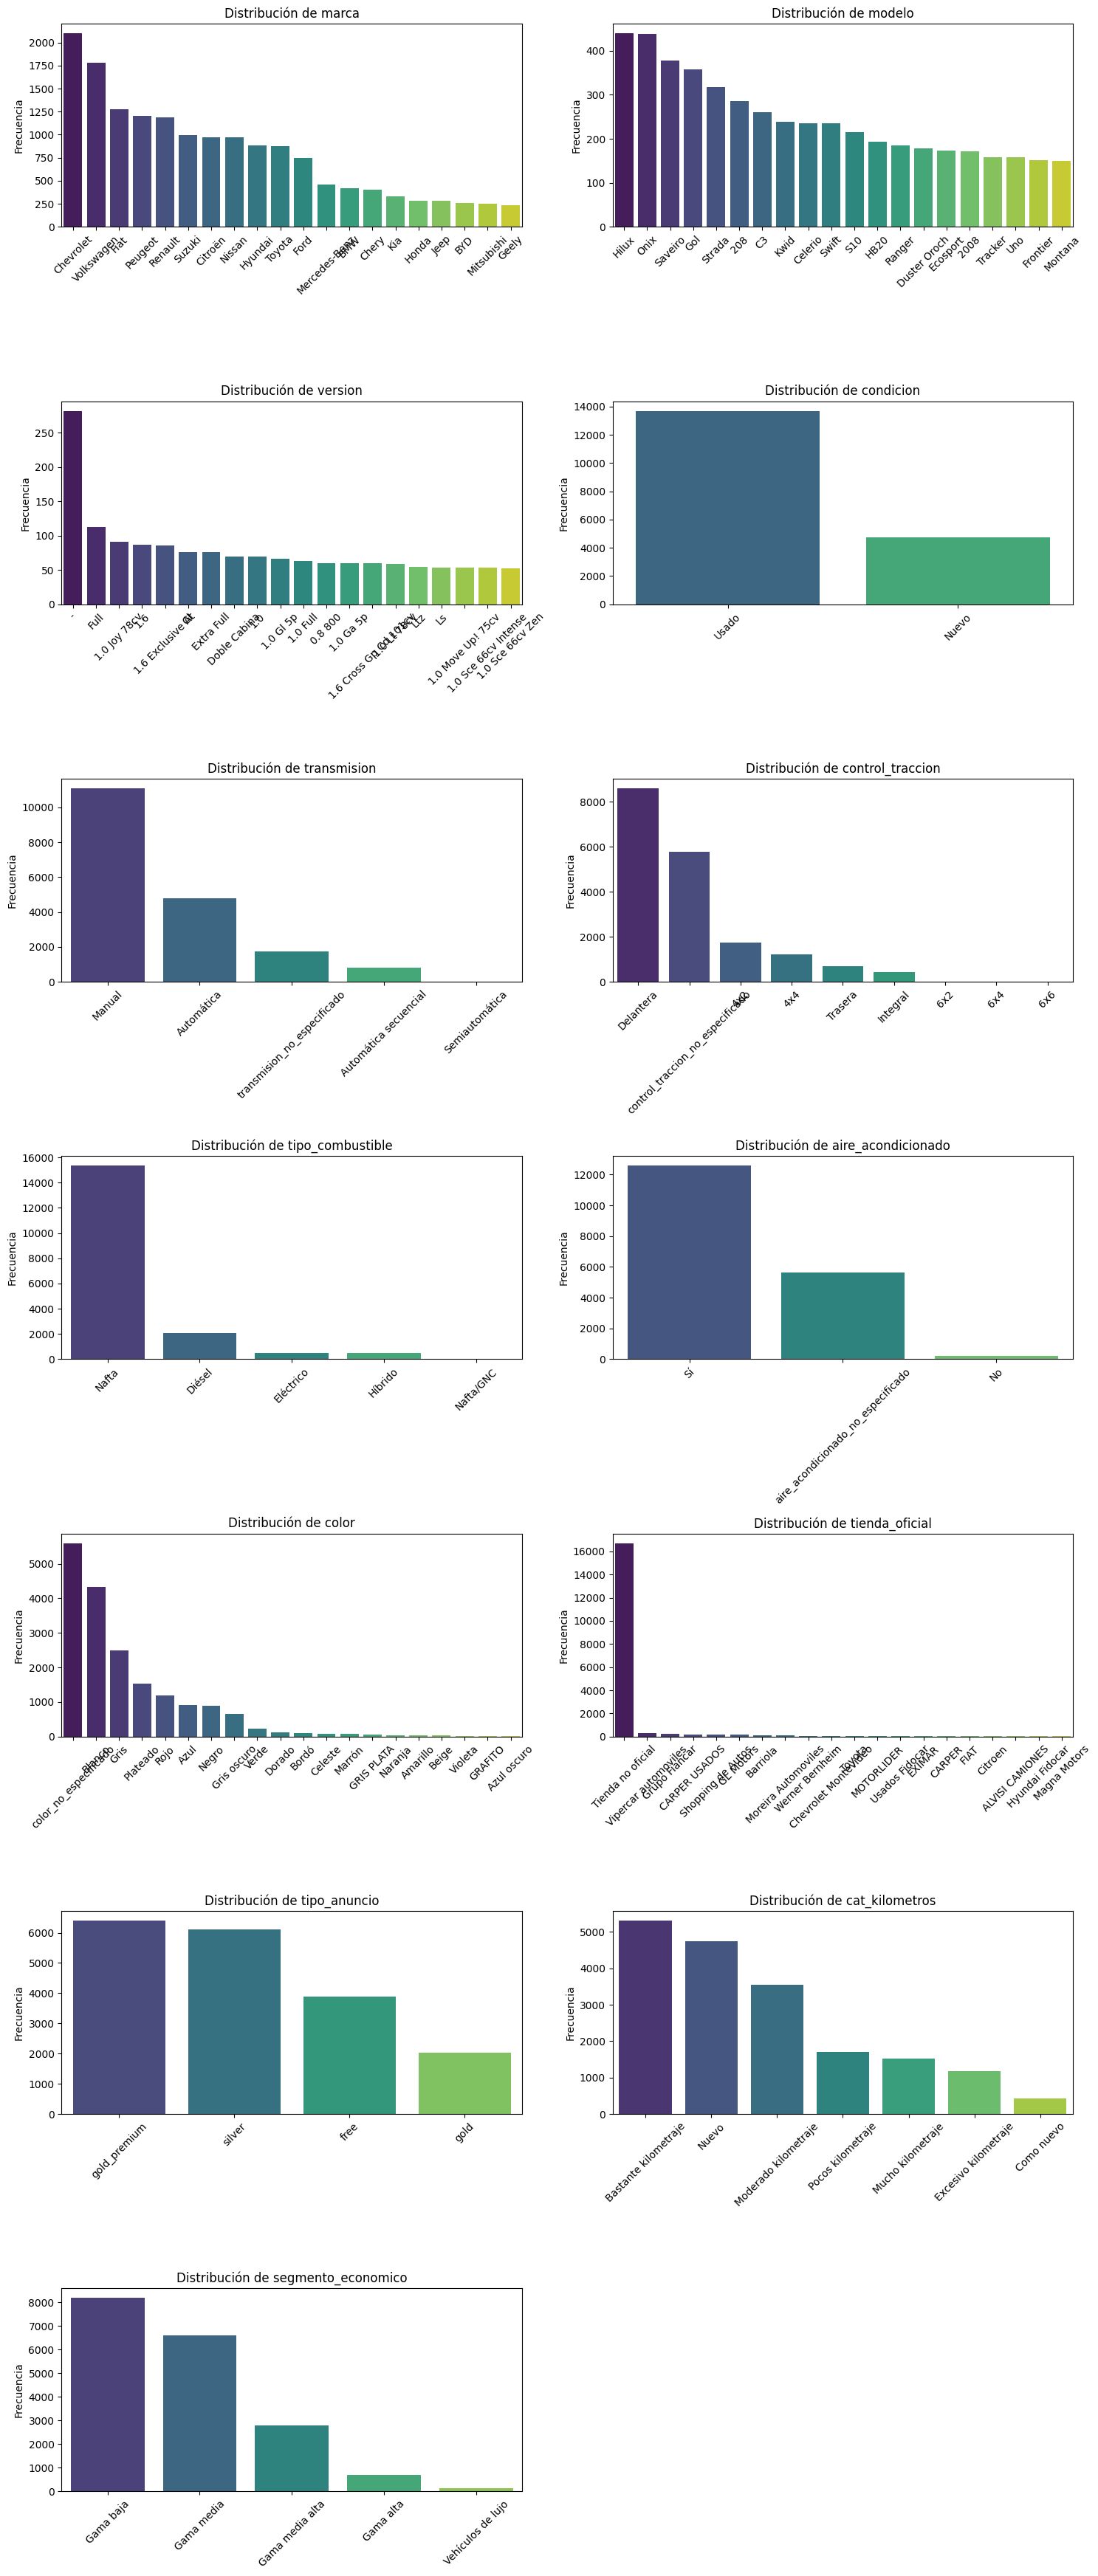

In [251]:
pinta_distribucion_categoricas(df_vehiculos_final, categoricas_vehiculos)

In [252]:
for catego in categoricas_vehiculos: 
    print(f'Para {catego}')
    print(df_vehiculos_final[catego].value_counts()/len(df_vehiculos_final)*100)
    print('\n'*2)

Para marca
marca
Chevrolet               11.377570
Volkswagen               9.673919
Fiat                     6.928544
Peugeot                  6.543324
Renault                  6.423960
                          ...    
LMI                      0.005426
Wuxi                     0.005426
UMEV                     0.005426
Zna                      0.005426
Ford escort gt ingle     0.005426
Name: count, Length: 179, dtype: float64



Para modelo
modelo
Hilux                    2.381857
Onix                     2.376431
Saveiro                  2.045467
Gol                      1.942380
Strada                   1.719928
                           ...   
306 xn break             0.005426
458 Italia               0.005426
360                      0.005426
JAC REFINE CARGO VAN     0.005426
Box Refrigerado -18°c    0.005426
Name: count, Length: 1651, dtype: float64



Para version
version
-                            1.530031
Full                         0.613097
1.0 Joy 78cv                 0

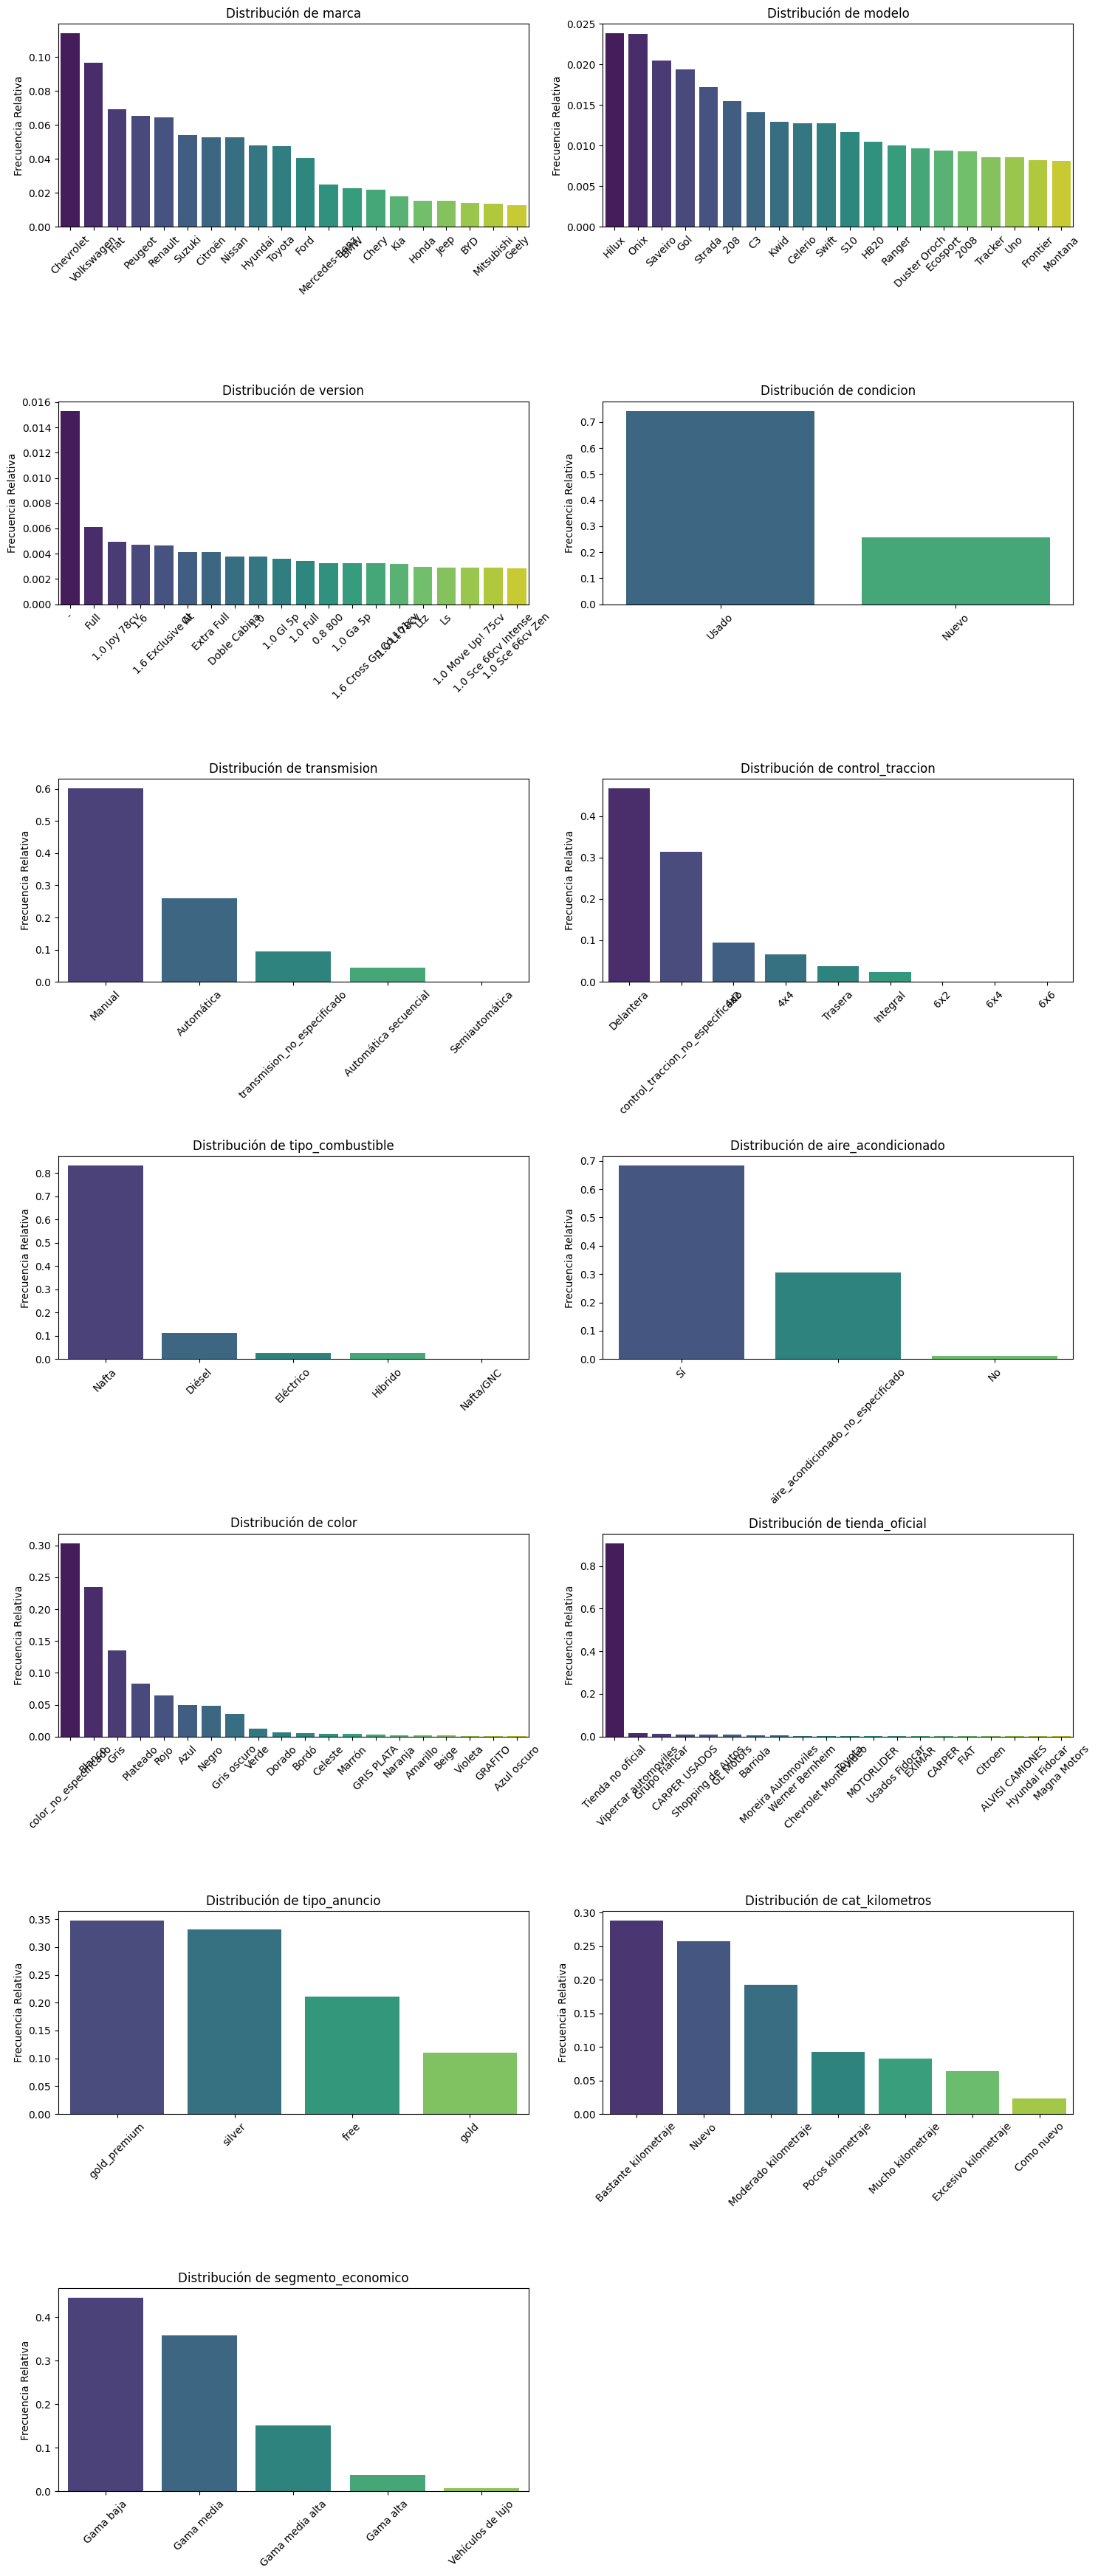

In [253]:
pinta_distribucion_categoricas(df_vehiculos_final, categoricas_vehiculos, relativa = True)

In [254]:
# columnas numéricas:
columnas_numericas_vehiculos = [
    "precio",
    "anio_vehiculo",
    "kilometraje",
]

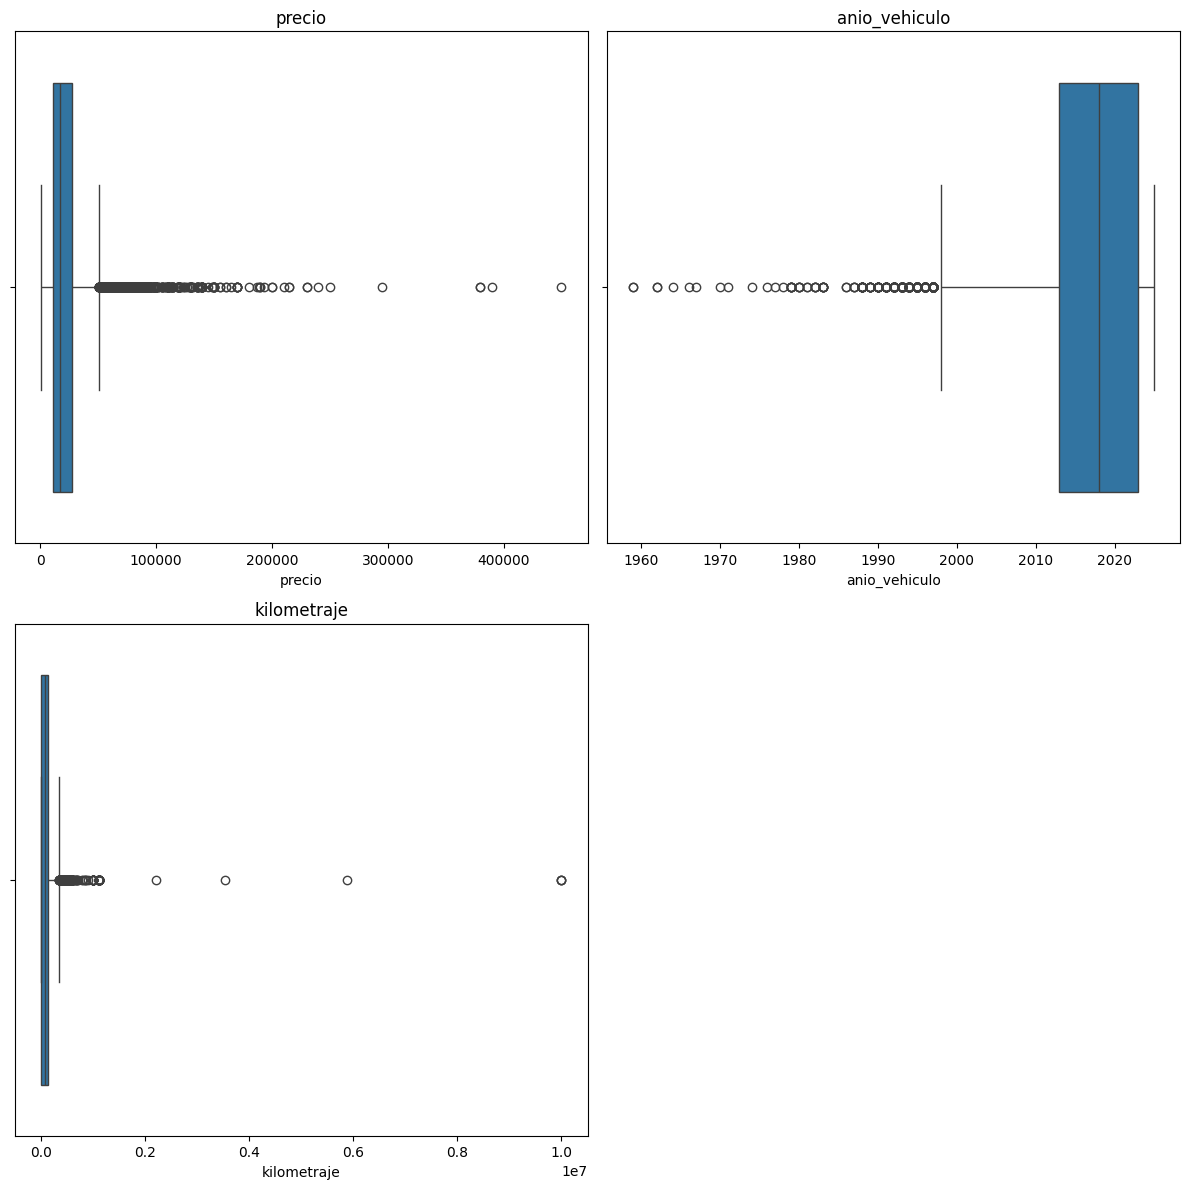

In [255]:
plot_multiple_boxplots(df_vehiculos_final, columnas_numericas_vehiculos)

In [256]:
# Rango
df_vehiculos_final.describe().loc["max"] - df_vehiculos_final.describe().loc["min"]

precio           4.495030e+05
anio_vehiculo    6.600000e+01
kilometraje      9.999999e+06
puertas          1.405000e+03
id_seller        1.911393e+09
dtype: float64

## Histogramas

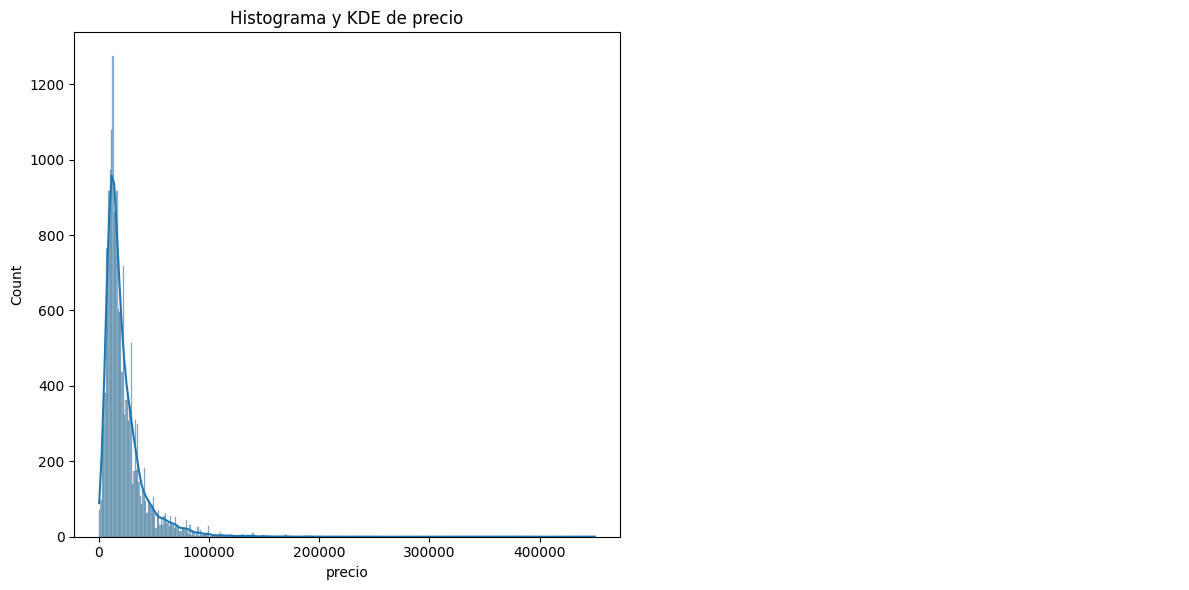

In [257]:
plot_histo_dens(df_vehiculos_final,["precio"])
#Se parece a una distribución log Normal

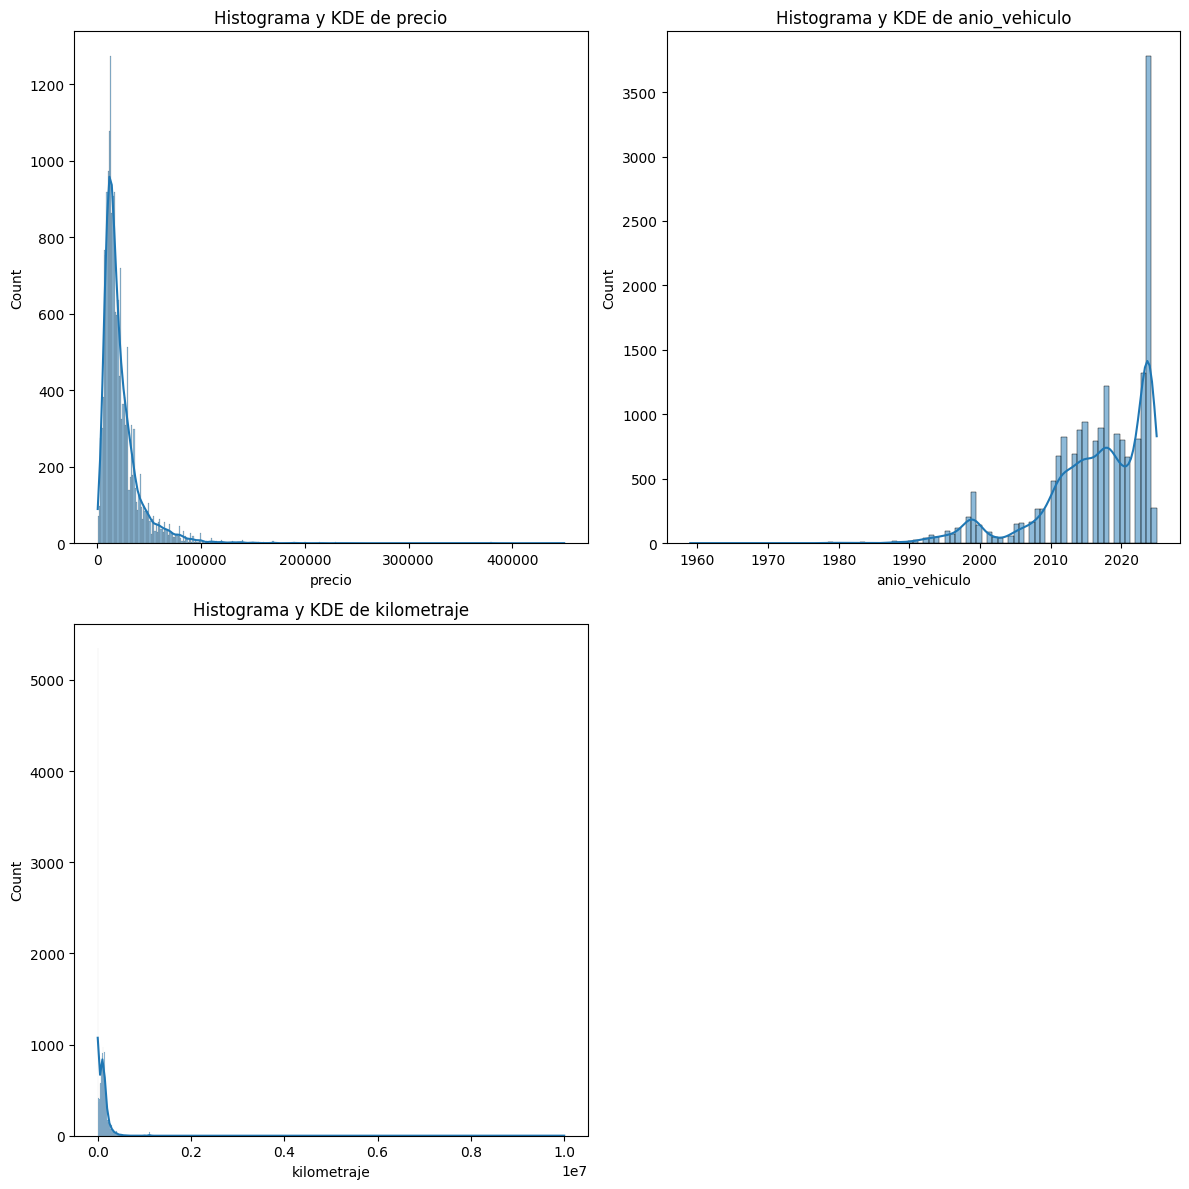

In [258]:
plot_histo_dens(df_vehiculos_final,columnas_numericas_vehiculos)

In [259]:
#df_vehiculos_final.to_csv('data/vehiculos_uy_final', index=True) # -> para que no modifique lo hecho

## Visualizaciones con matplotlib

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/363179974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marcas.index, y=top_marcas.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/363179974.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_marcas_relativa.index, y=top_marcas_relativa.values, ax=axes[1], palette='viridis')


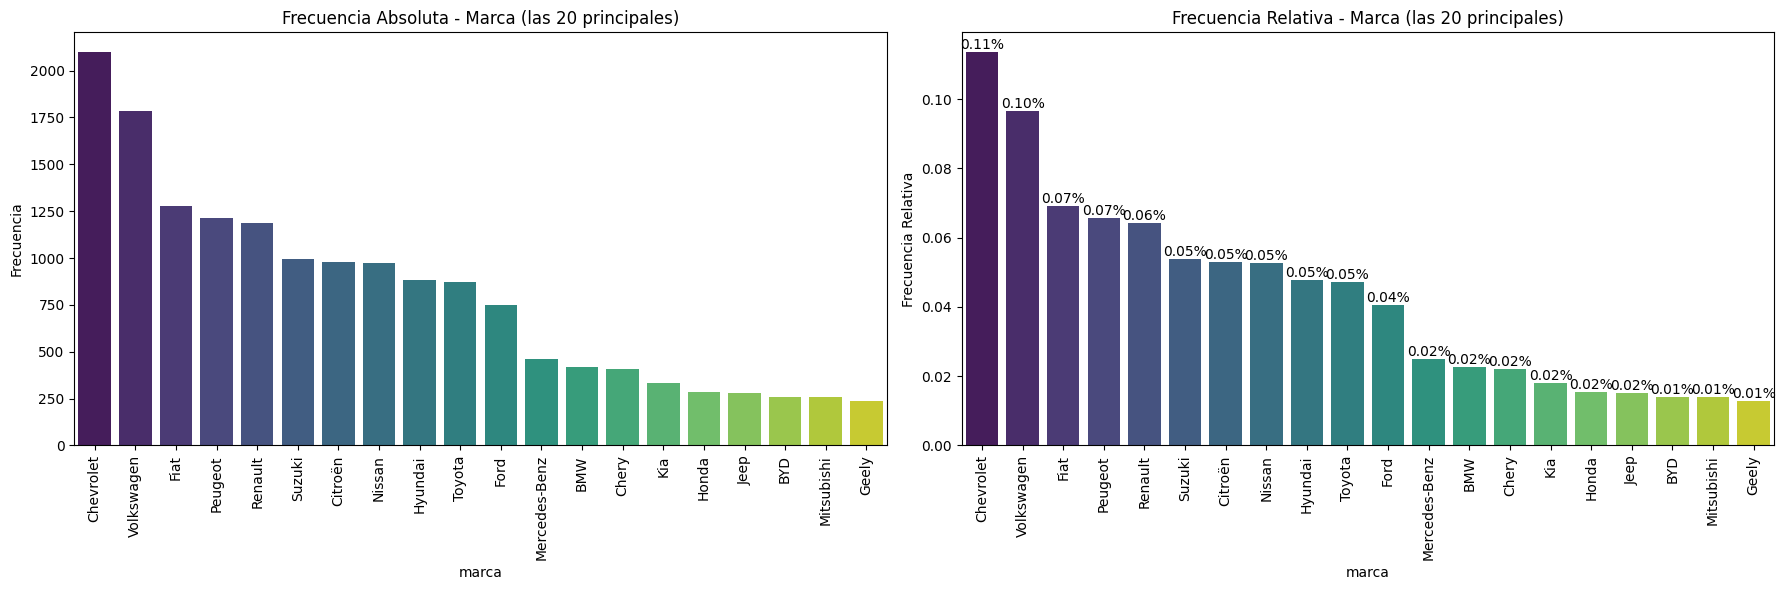

In [260]:
# Selección de las top 10 marcas
top_marcas = df_vehiculos['marca'].value_counts().nlargest(20)
top_marcas_relativa = df_vehiculos['marca'].value_counts(normalize=True).nlargest(20)

# Configuración de la figura
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Frecuencia absoluta
sns.barplot(x=top_marcas.index, y=top_marcas.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Marca (las 20 principales)')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Frecuencia relativa
barplot_relativo = sns.barplot(x=top_marcas_relativa.index, y=top_marcas_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Marca (las 20 principales)')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')


plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/3378941102.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_condicion.index, y=top_condicion.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/3378941102.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_condicion_relativa.index, y=top_condicion_relativa.values, ax=axes[1], palette='viridis')


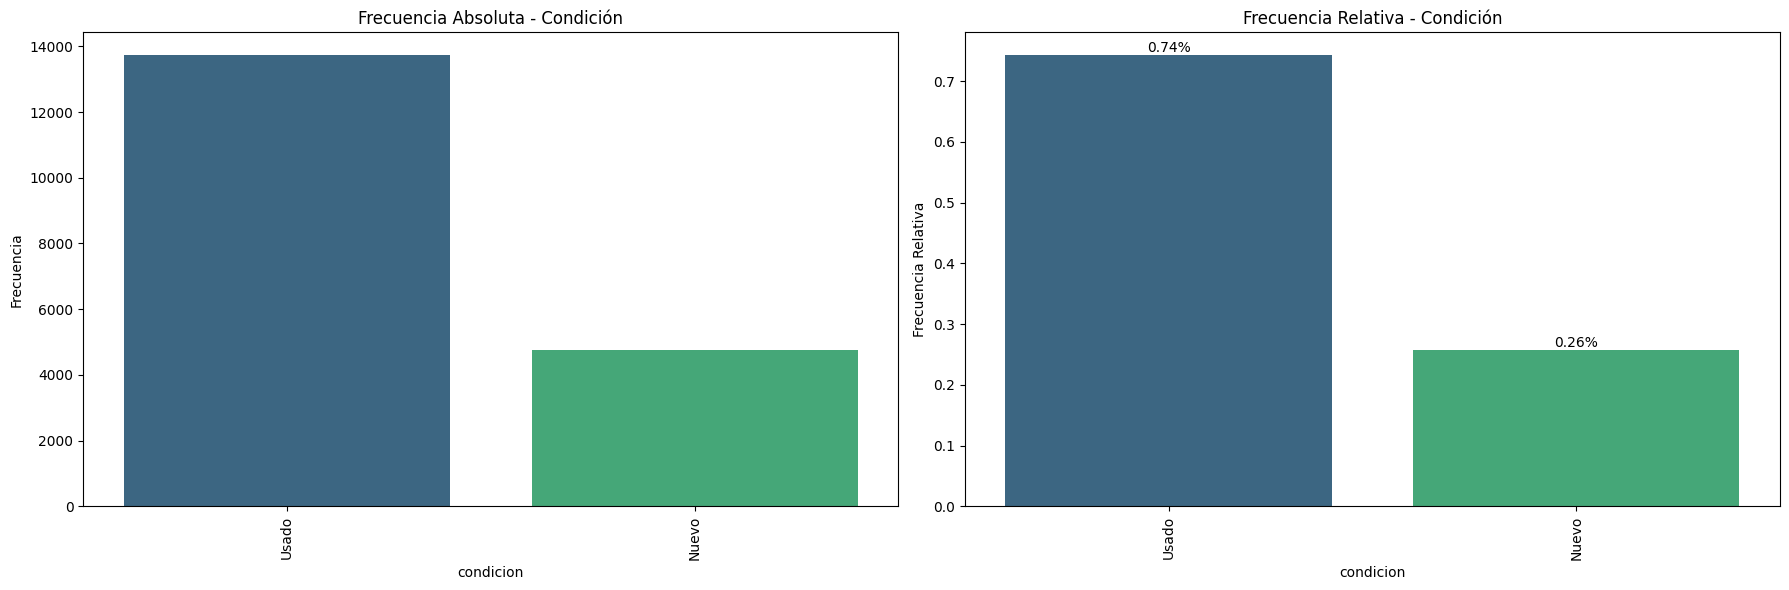

In [261]:
# 'condicion'
top_condicion = df_vehiculos['condicion'].value_counts()
top_condicion_relativa = df_vehiculos['condicion'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_condicion.index, y=top_condicion.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Condición')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

barplot_relativo = sns.barplot(x=top_condicion_relativa.index, y=top_condicion_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Condición')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')


plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/1680758027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kilometros.index, y=top_kilometros.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/1680758027.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_kilometros_relativa.index, y=top_kilometros_relativa.values, ax=axes[1], palette='viridis')


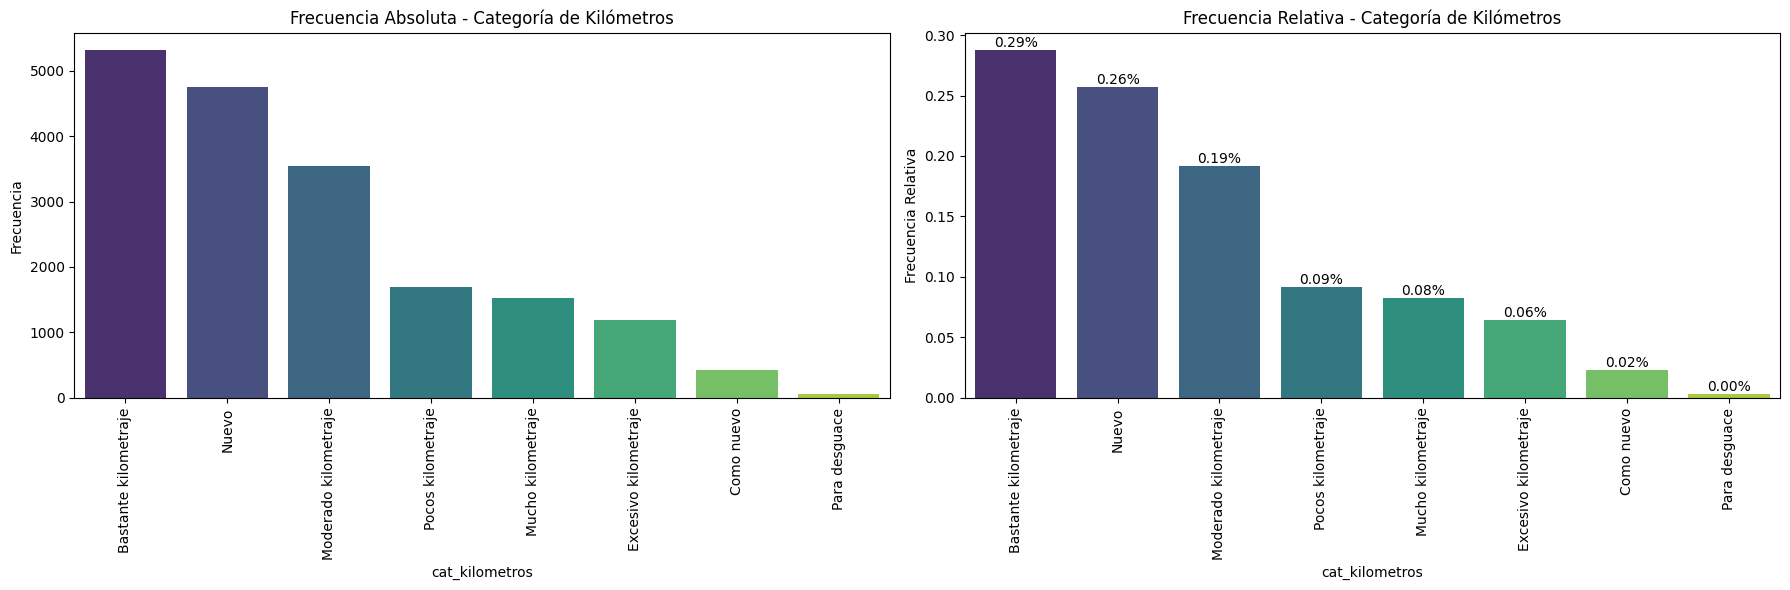

In [262]:
# Frecuencia absoluta y relativa de la categoría de kilómetros
top_kilometros = df_vehiculos['cat_kilometros'].value_counts()
top_kilometros_relativa = df_vehiculos['cat_kilometros'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_kilometros.index, y=top_kilometros.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Categoría de Kilómetros')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

barplot_relativo = sns.barplot(x=top_kilometros_relativa.index, y=top_kilometros_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Categoría de Kilómetros')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')
    
plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/1956120008.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_modelos.index, y=top_modelos.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/1956120008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_modelos_relativa.index, y=top_modelos_relativa.values, ax=axes[1], palette='viridis')


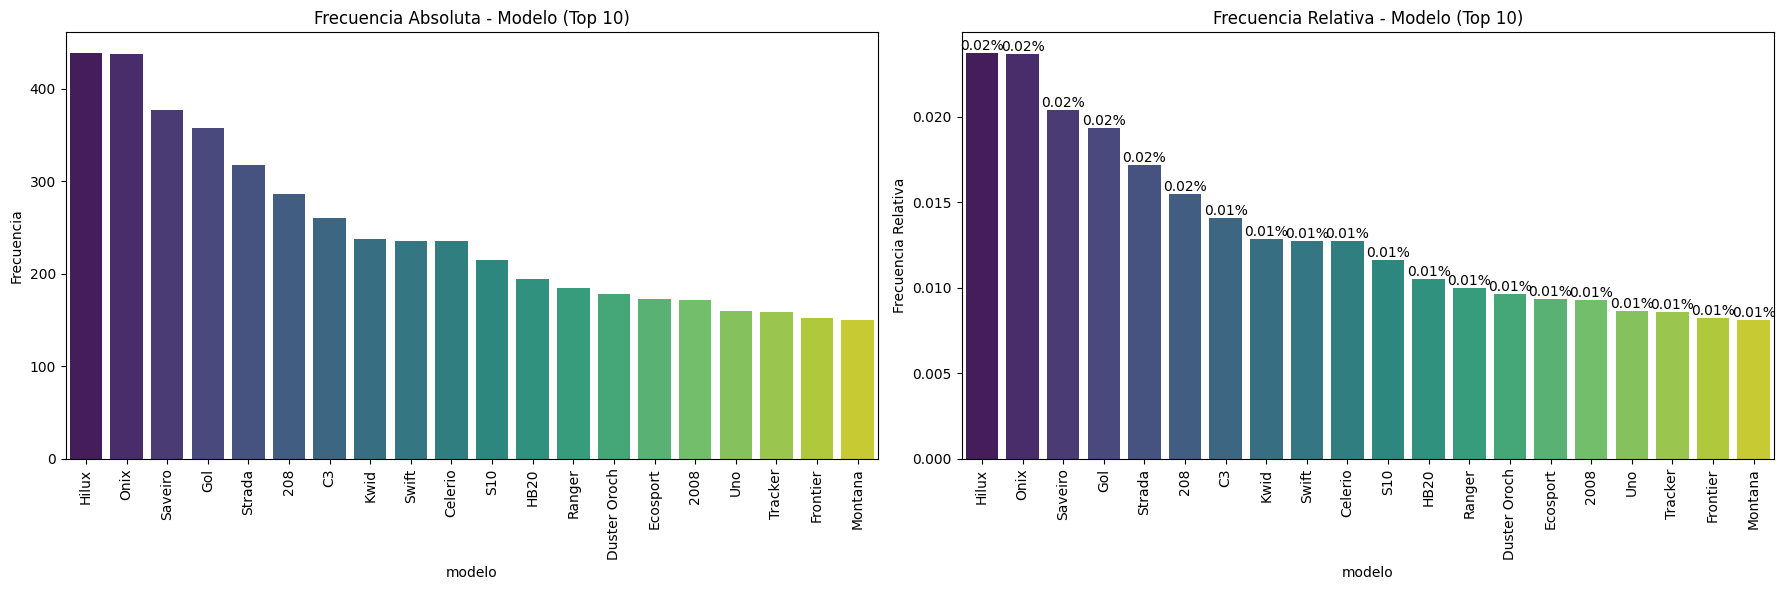

In [263]:
# Frecuencia absoluta y relativa de modelos (Top 10)
top_modelos = df_vehiculos['modelo'].value_counts().nlargest(20)
top_modelos_relativa = df_vehiculos['modelo'].value_counts(normalize=True).nlargest(20)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_modelos.index, y=top_modelos.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Modelo (Top 10)')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

barplot_relativo = sns.barplot(x=top_modelos_relativa.index, y=top_modelos_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Modelo (Top 10)')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')
    
plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/113387578.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_absoluto = sns.barplot(x=top_segmento.index, y=top_segmento.values, ax=axes[0], palette='viridis', legend=False)
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/113387578.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_segmento_relativa.index, y=top_segmento_relativa.values, ax=axes[1], palette='viridis', legend=False)


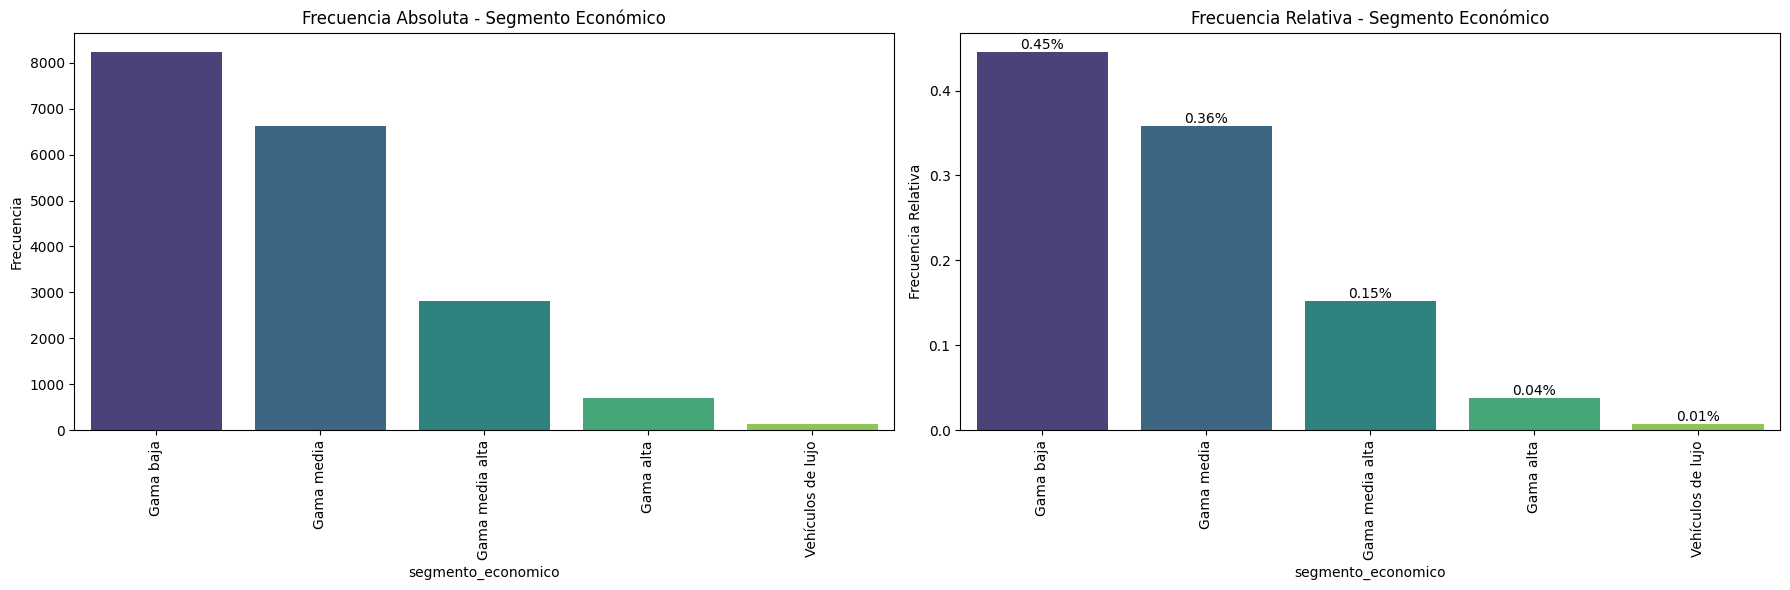

In [264]:
# Frecuencia absoluta y relativa de tipos de combustible
top_segmento = df_vehiculos['segmento_economico'].value_counts().nlargest(10)
top_segmento_relativa = df_vehiculos['segmento_economico'].value_counts(normalize=True).nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Frecuencia absoluta
barplot_absoluto = sns.barplot(x=top_segmento.index, y=top_segmento.values, ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Frecuencia Absoluta - Segmento Económico')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Frecuencia relativa
barplot_relativo = sns.barplot(x=top_segmento_relativa.index, y=top_segmento_relativa.values, ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Frecuencia Relativa - Segmento Económico')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

# Añadir etiquetas de porcentaje
for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/812510460.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_combustible.index, y=top_combustible.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/812510460.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_combustible_relativa.index, y=top_combustible_relativa.values, ax=axes[1], palette='viridis')


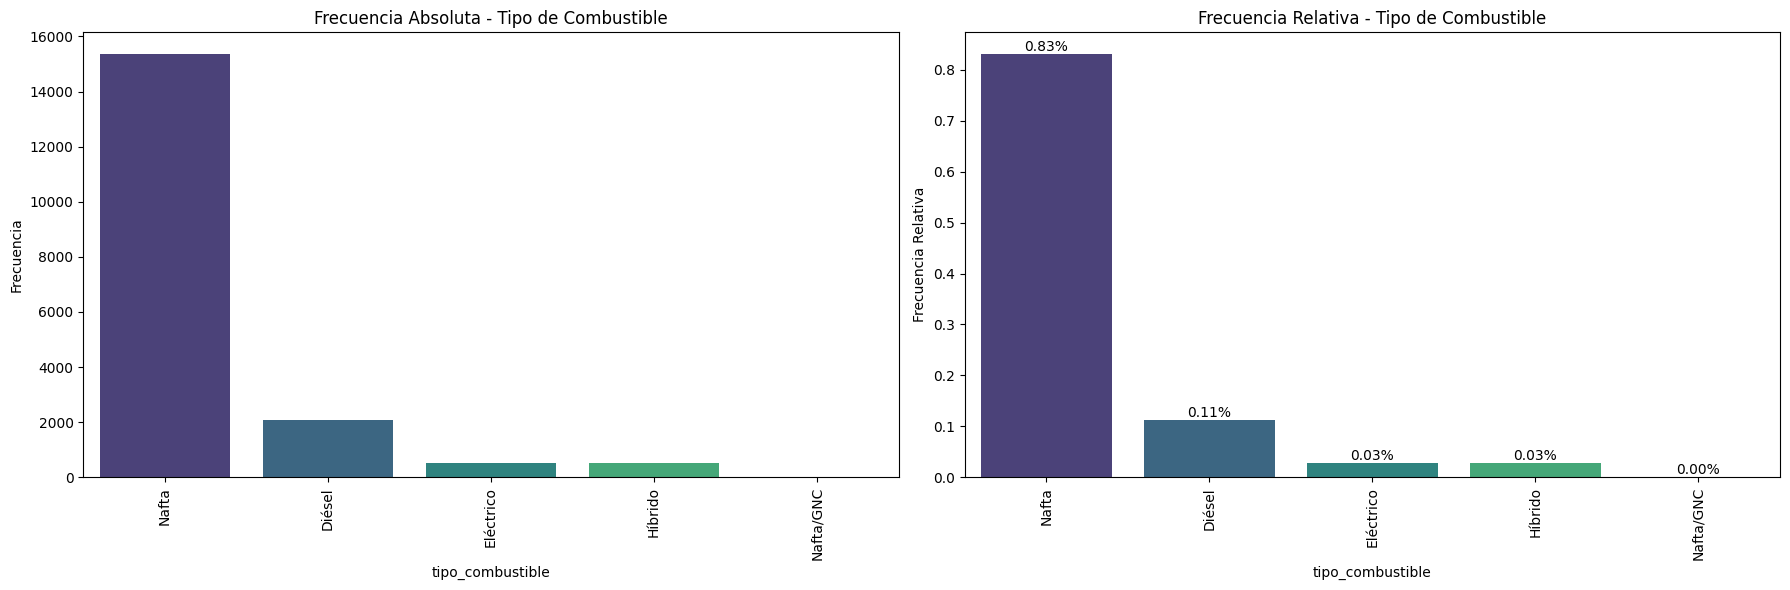

In [265]:
# Frecuencia absoluta y relativa de tipos de combustible
top_combustible = df_vehiculos['tipo_combustible'].value_counts().nlargest(10)  # Muestra los 10 principales tipos
top_combustible_relativa = df_vehiculos['tipo_combustible'].value_counts(normalize=True).nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Frecuencia absoluta
sns.barplot(x=top_combustible.index, y=top_combustible.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Tipo de Combustible')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

# Frecuencia relativa
barplot_relativo = sns.barplot(x=top_combustible_relativa.index, y=top_combustible_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Tipo de Combustible')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')
    
plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/1443181722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_transmision.index, y=top_transmision.values, ax=axes[0], palette='viridis')
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/1443181722.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_relativo = sns.barplot(x=top_transmision_relativa.index, y=top_transmision_relativa.values, ax=axes[1], palette='viridis')


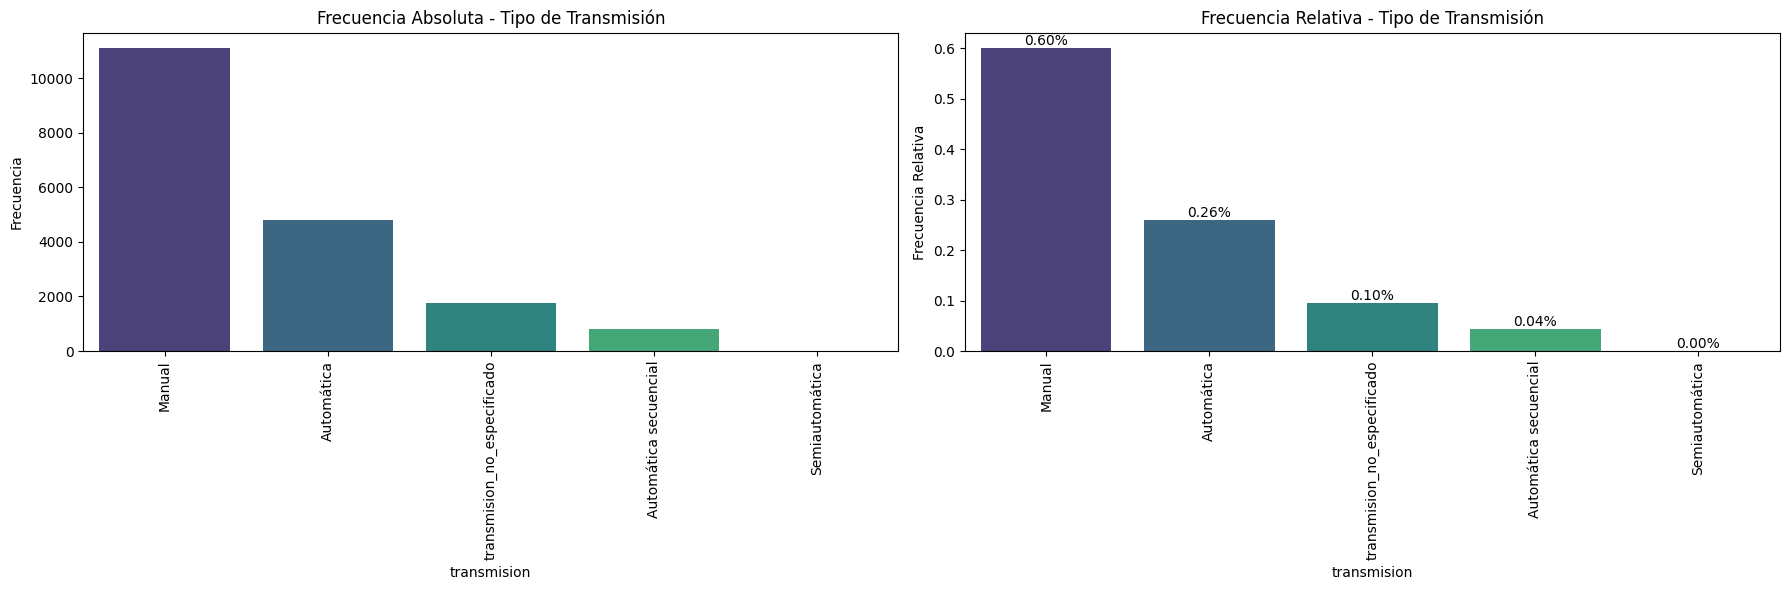

In [266]:
# Frecuencia absoluta y relativa de tipos de transmisión
top_transmision = df_vehiculos['transmision'].value_counts()
top_transmision_relativa = df_vehiculos['transmision'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=top_transmision.index, y=top_transmision.values, ax=axes[0], palette='viridis')
axes[0].set_title('Frecuencia Absoluta - Tipo de Transmisión')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=90)

barplot_relativo = sns.barplot(x=top_transmision_relativa.index, y=top_transmision_relativa.values, ax=axes[1], palette='viridis')
axes[1].set_title('Frecuencia Relativa - Tipo de Transmisión')
axes[1].set_ylabel('Frecuencia Relativa')
axes[1].tick_params(axis='x', rotation=90)

for container in barplot_relativo.containers:
    barplot_relativo.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()

# 3: Análisis de las depreciaciones

In [267]:
df_vehiculos = pd.read_csv('./data/vehiculos_uy_final.csv')

In [268]:
# Filtrar vehículos nuevos y usados del DataFrame original
vehiculos_nuevos = df_vehiculos[df_vehiculos['condicion'] == 'Nuevo']
vehiculos_usados = df_vehiculos[df_vehiculos['condicion'] == 'Usado']

In [269]:
# Calcular el promedio de precios de vehículos nuevos por combinación de marca, modelo y versión
promedio_precios_nuevos = vehiculos_nuevos.groupby(['marca', 'modelo', 'version', 'tipo_combustible'])['precio'].mean().reset_index()
promedio_precios_nuevos['precio'] = promedio_precios_nuevos['precio'].round(0)

- Se utilizará la información de los vehículos nuevos ofrecidos en mercado libre para calcular la depreciación de los usados respecto a estos
- Para comparar los vehículos se mirará marca modelo y versión
- cada fila tendrá ahora un precio del modelo usado y un precio del mismo modelo/versión nuevo
- Solamente se analizarán los casos que cuenten con al menos 4 publicaciones de usados para la versión, y que a su vez cuenten con la versión en condición nuevo 
- Luego de un análisis, se filtran los vehículos con depreciación negativa, ya que corresponden a errores en las publicaciones, ejemplo: errores en la versión, errores en el precio, etc.

In [270]:
# Filtrar vehículos nuevos y usados del DataFrame original
vehiculos_nuevos = df_vehiculos[df_vehiculos['condicion'] == 'Nuevo']
vehiculos_usados = df_vehiculos[df_vehiculos['condicion'] == 'Usado']

# Calcular el promedio de precios de vehículos nuevos por combinación de marca, modelo y versión
promedio_precios_nuevos = vehiculos_nuevos.groupby(['marca', 'modelo', 'version'])['precio'].mean().reset_index()

# Contar la cantidad de vehículos usados por cada combinación de marca, modelo y versión
conteo_usados = vehiculos_usados.groupby(['marca', 'modelo', 'version']).size().reset_index(name='cantidad_usados')

# Filtrar combinaciones con al menos 5 vehículos usados
combinaciones_validas = conteo_usados[conteo_usados['cantidad_usados'] >= 4]

# Filtrar vehículos usados con las combinaciones válidas
vehiculos_usados_filtrados = pd.merge(vehiculos_usados, combinaciones_validas[['marca', 'modelo', 'version']], on=['marca', 'modelo', 'version'], how='inner')

# Añadir el precio promedio de vehículos nuevos a los vehículos usados
vehiculos_usados_filtrados = pd.merge(vehiculos_usados_filtrados, promedio_precios_nuevos, on=['marca', 'modelo', 'version'], how='left', suffixes=('_usado', '_nuevo'))

# Verificar NaN en precio_nuevo
nan_precio_nuevo = vehiculos_usados_filtrados[vehiculos_usados_filtrados['precio_nuevo'].isna()]

# Calcular la depreciación
vehiculos_usados_filtrados['depreciacion'] = (vehiculos_usados_filtrados['precio_nuevo'] - vehiculos_usados_filtrados['precio_usado']) / vehiculos_usados_filtrados['precio_nuevo'] * 100

# Verificar cantidad de depreciaciones negativas
depreciacion_negativa = vehiculos_usados_filtrados[vehiculos_usados_filtrados['depreciacion'] < 0]

# Filtrar vehículos con depreciación negativa
vehiculos_usados_filtrados = vehiculos_usados_filtrados[vehiculos_usados_filtrados['depreciacion'] >= 0]

# Recalcular el conteo de vehículos usados después de filtrar depreciación negativa
conteo_usados_filtrados = vehiculos_usados_filtrados.groupby(['marca', 'modelo', 'version']).size().reset_index(name='cantidad_usados')

# Filtrar nuevamente combinaciones válidas con al menos 5 vehículos usados
combinaciones_validas_finales = conteo_usados_filtrados[conteo_usados_filtrados['cantidad_usados'] >= 4]

# Filtrar vehículos usados con las combinaciones válidas finales
df_vehiculos_depreciacion = pd.merge(vehiculos_usados_filtrados, combinaciones_validas_finales[['marca', 'modelo', 'version']], on=['marca', 'modelo', 'version'], how='inner')


In [271]:
#Se vuelve a aplicar la función ya que se modificó el nombre de la columna
def clasificar_segmento(row):
    if row['precio_nuevo'] > 100000:
        return 'Vehículos de lujo'
    elif row['precio_nuevo'] > 60000:
        return 'Gama alta'
    elif row['precio_nuevo'] > 30000:
        return 'Gama media alta'
    elif row['precio_nuevo'] > 15000:
        return 'Gama media'
    else:
        return 'Gama baja'

# Aplicar la función a cada fila para crear la nueva columna
df_vehiculos_depreciacion['segmento_economico'] = df_vehiculos_depreciacion.apply(clasificar_segmento, axis=1)

In [272]:
# Se unifican los caso Automática secuencial en Automático
df_vehiculos_depreciacion.loc[df_vehiculos_depreciacion['transmision'] == 'Automática secuencial', 'transmision'] = 'Automática'

### A continuación se presenta el cuadro que tipifica las distintas variantes


| Nombre del campo| Descripción              | Tipo de variable  | Importancia Inicial | Notas                 |
|-----------------|--------------------------|-------------------|---------------------|-----------------------|
| id              | ID de la publicación     | Índice Único        | -                   | Identificador único de la publicación    |
| moneda          | Moneda en USD             | Valor único        | -                   | Indica la moneda del precio - Dólares (USD) |
| precio_usado          | Indica el precio del vehículo| Numerica Contínua | 0               | Indicador precio del vehículo al que se ofrece usado |
| marca           | Indica la marca del vehículo | Categórica  | 1              | Es un valor muy importante para el análisis |
| modelo          | Subcategoría dentro de la marca | Categórica| 2         | También es un factor muy relevante para el análisis |
| version         | Subcategoría dentro del modelo | Categórica | 3              | Determina la variante dentro del modelo, en general refiere a los distintos atributos, por ejemplo extras de confort, seguridad, etc.  |
| condicion       | Indica si es nuevo o usado  | Binaria         | 1                 | Es un factor fundamental para filtrar los vehículos usados o nuevos |
| anio_vehiculo   | Indica el año del vehículo | Numerica Discreta | 2                | Esto indica el año de fabricación del vehículo aunque no queda claro si en algunos casos se le asigna según el primer año de uso|
| kilometraje     | Indica el kilometraje del vehículo     | Numerica Contínua     | 2               | Es importante para determinar el desgaste del vehículo  |
| potencia        | Indica la potencia medida en caballos de fuerza (hp) | Numerica Discreta | 3   | Está relaiconado con la versión|
| transmision    | Indica el tipo de transmisión   | Categórica            | 3      | Podría tener relevancia si supiéramos como incide en el comprador |
| control_traccion | Indica la tracción del vehículo | Categórica          | 3      | Podría tener relevancia si supiéramos como incide en el comprador             |
| tipo_combustible | Indica el tipo de combusitble que utiliza el vehículo | Categórica   | 3   | Es importante sobre todo para filtrar a los eléctricos, mercado en crecimiento |
| aire_acondicionado | Indica si el vehículo cuenta con A/C | Binaria     | 3            | Al no ser un atirbuto obligatorio, faltan datos sobre muchos vehículos|
| color     | Indica el color del vehículo | Categórica      | 3            | A priori no tendría influencia en el precio, preferencias subjetivas  |
| tienda_oficial | Indica si se trata de una tienda oficial reconocida por ML | Categórica  | 3   | Se observan automotoras importantes que no tienen este reconocimiento, valor difícil de ponderar  |
| id_seller | El id que tiene el usuario que publica el vehículo   | Índice único para cada usuario   | 3    | Importante para medir publicaciones por usuario, ponderaría más si mi enfoque fuera sobre usuarios. También puede servir para trabajar con otras base de datos. |
| nickname  | Indica el nombre que tiene el usuario en ML | Valor único para cada usuario          |3 | ídem id_seller|
| fecha_baja_publicacion  | Indica la fecha a la cual bajaría la publicación  | Fecha           | -    | https://www.mercadolibre.com.uy/ayuda/costos-de-vehiculo_868  Las publicaicones Oro, Plata y Gratis tienen 30 días de duración, las Oro Preminun pueden ser republicadas por un año sin costo. También pueden ser republicadas las otras con costo |
| tipo_anuncio  | Indica el tipo de anuncio  | Categórica            | -            | Según el tipo de anuncio (Gratis, Plata, Oro y Oro Premiun) tienen distinta visibilidad y otros beneficios |
| enlace_publicacion    | Contiene el link de la publicación   | -            | -                  | CSirve para verificar información o simplemente a modo informativo   |
| cat_kilometraje    | Columna creada, asigna una categoría según cantidad de kilómetros  | Categórica |   1  | Es un gran indicador para categorizar el estado del vehículo   |
| segmento_economico    | Columna creada, asigna una categoría según el segmento económico  | Categórica |   1  | Es una categoría importante para analizar los segmentos por separado |
| precio_nuevo          | Indica el precio del vehículo en estado nuevo| Numerica Contínua | 1              | Indicador precio del vehículo al que se ofrece nuevo |
| depreciacion    | Columna creada, se calcula como la diferencia porcentual entre el precio usado vs nuevo  | Numérica contínua |   1  | Es una categoría importante para analizar la depreciación de los vehículos|

## Análisis sobre las depreciaciones 

In [273]:
df_vehiculos_depreciacion.describe()

precio_usado  anio_vehiculo   kilometraje      puertas     id_seller  \
count   1532.000000    1532.000000  1.532000e+03  1532.000000  1.532000e+03   
mean   19889.624021    2019.590731  8.323609e+04     4.503264  3.623058e+08   
std     9691.896337       2.993176  7.159793e+04     0.798833  4.335461e+08   
min     5000.000000    1998.000000  3.300000e+01     2.000000  9.887700e+04   
25%    13490.000000    2018.000000  4.143500e+04     4.000000  9.011949e+07   
50%    16990.000000    2020.000000  7.400000e+04     5.000000  1.760376e+08   
75%    23422.500000    2022.000000  1.060000e+05     5.000000  4.190482e+08   
max    65990.000000    2024.000000  1.111111e+06     5.000000  1.911492e+09   

       precio_nuevo  depreciacion  
count   1532.000000   1532.000000  
mean   28656.046987     27.461347  
std    15550.503565     15.353555  
min    10400.000000      0.000000  
25%    17990.000000     15.113351  
50%    23840.000000     26.395717  
75%    32867.500000     37.500000  
max    90000.000000     94.444444

In [274]:
variabilidad(df_vehiculos_depreciacion)

std          mean        CV
precio_usado   9.691896e+03  1.988962e+04  0.487284
anio_vehiculo  2.993176e+00  2.019591e+03  0.001482
kilometraje    7.159793e+04  8.323609e+04  0.860179
puertas        7.988331e-01  4.503264e+00  0.177390
id_seller      4.335461e+08  3.623058e+08  1.196630
precio_nuevo   1.555050e+04  2.865605e+04  0.542660
depreciacion   1.535355e+01  2.746135e+01  0.559097

In [275]:
# Análizando la moda en las categóricas
categoricas_vehiculos = [
    'marca',
    'modelo',
    'version',
    'transmision',
    'control_traccion',
    'tipo_combustible',
    'aire_acondicionado',
    'color',
    'tienda_oficial',
    'tipo_anuncio',
    'cat_kilometros',
    'segmento_economico',
]

In [276]:
df_vehiculos_depreciacion[categoricas_vehiculos].mode().T

0
marca                              Suzuki
modelo                            Celerio
version                  1.6 Exclusive At
transmision                        Manual
control_traccion                Delantera
tipo_combustible                    Nafta
aire_acondicionado                     Sí
color               color_no_especificado
tienda_oficial          Tienda no oficial
tipo_anuncio                 gold_premium
cat_kilometros       Moderado kilometraje
segmento_economico             Gama media

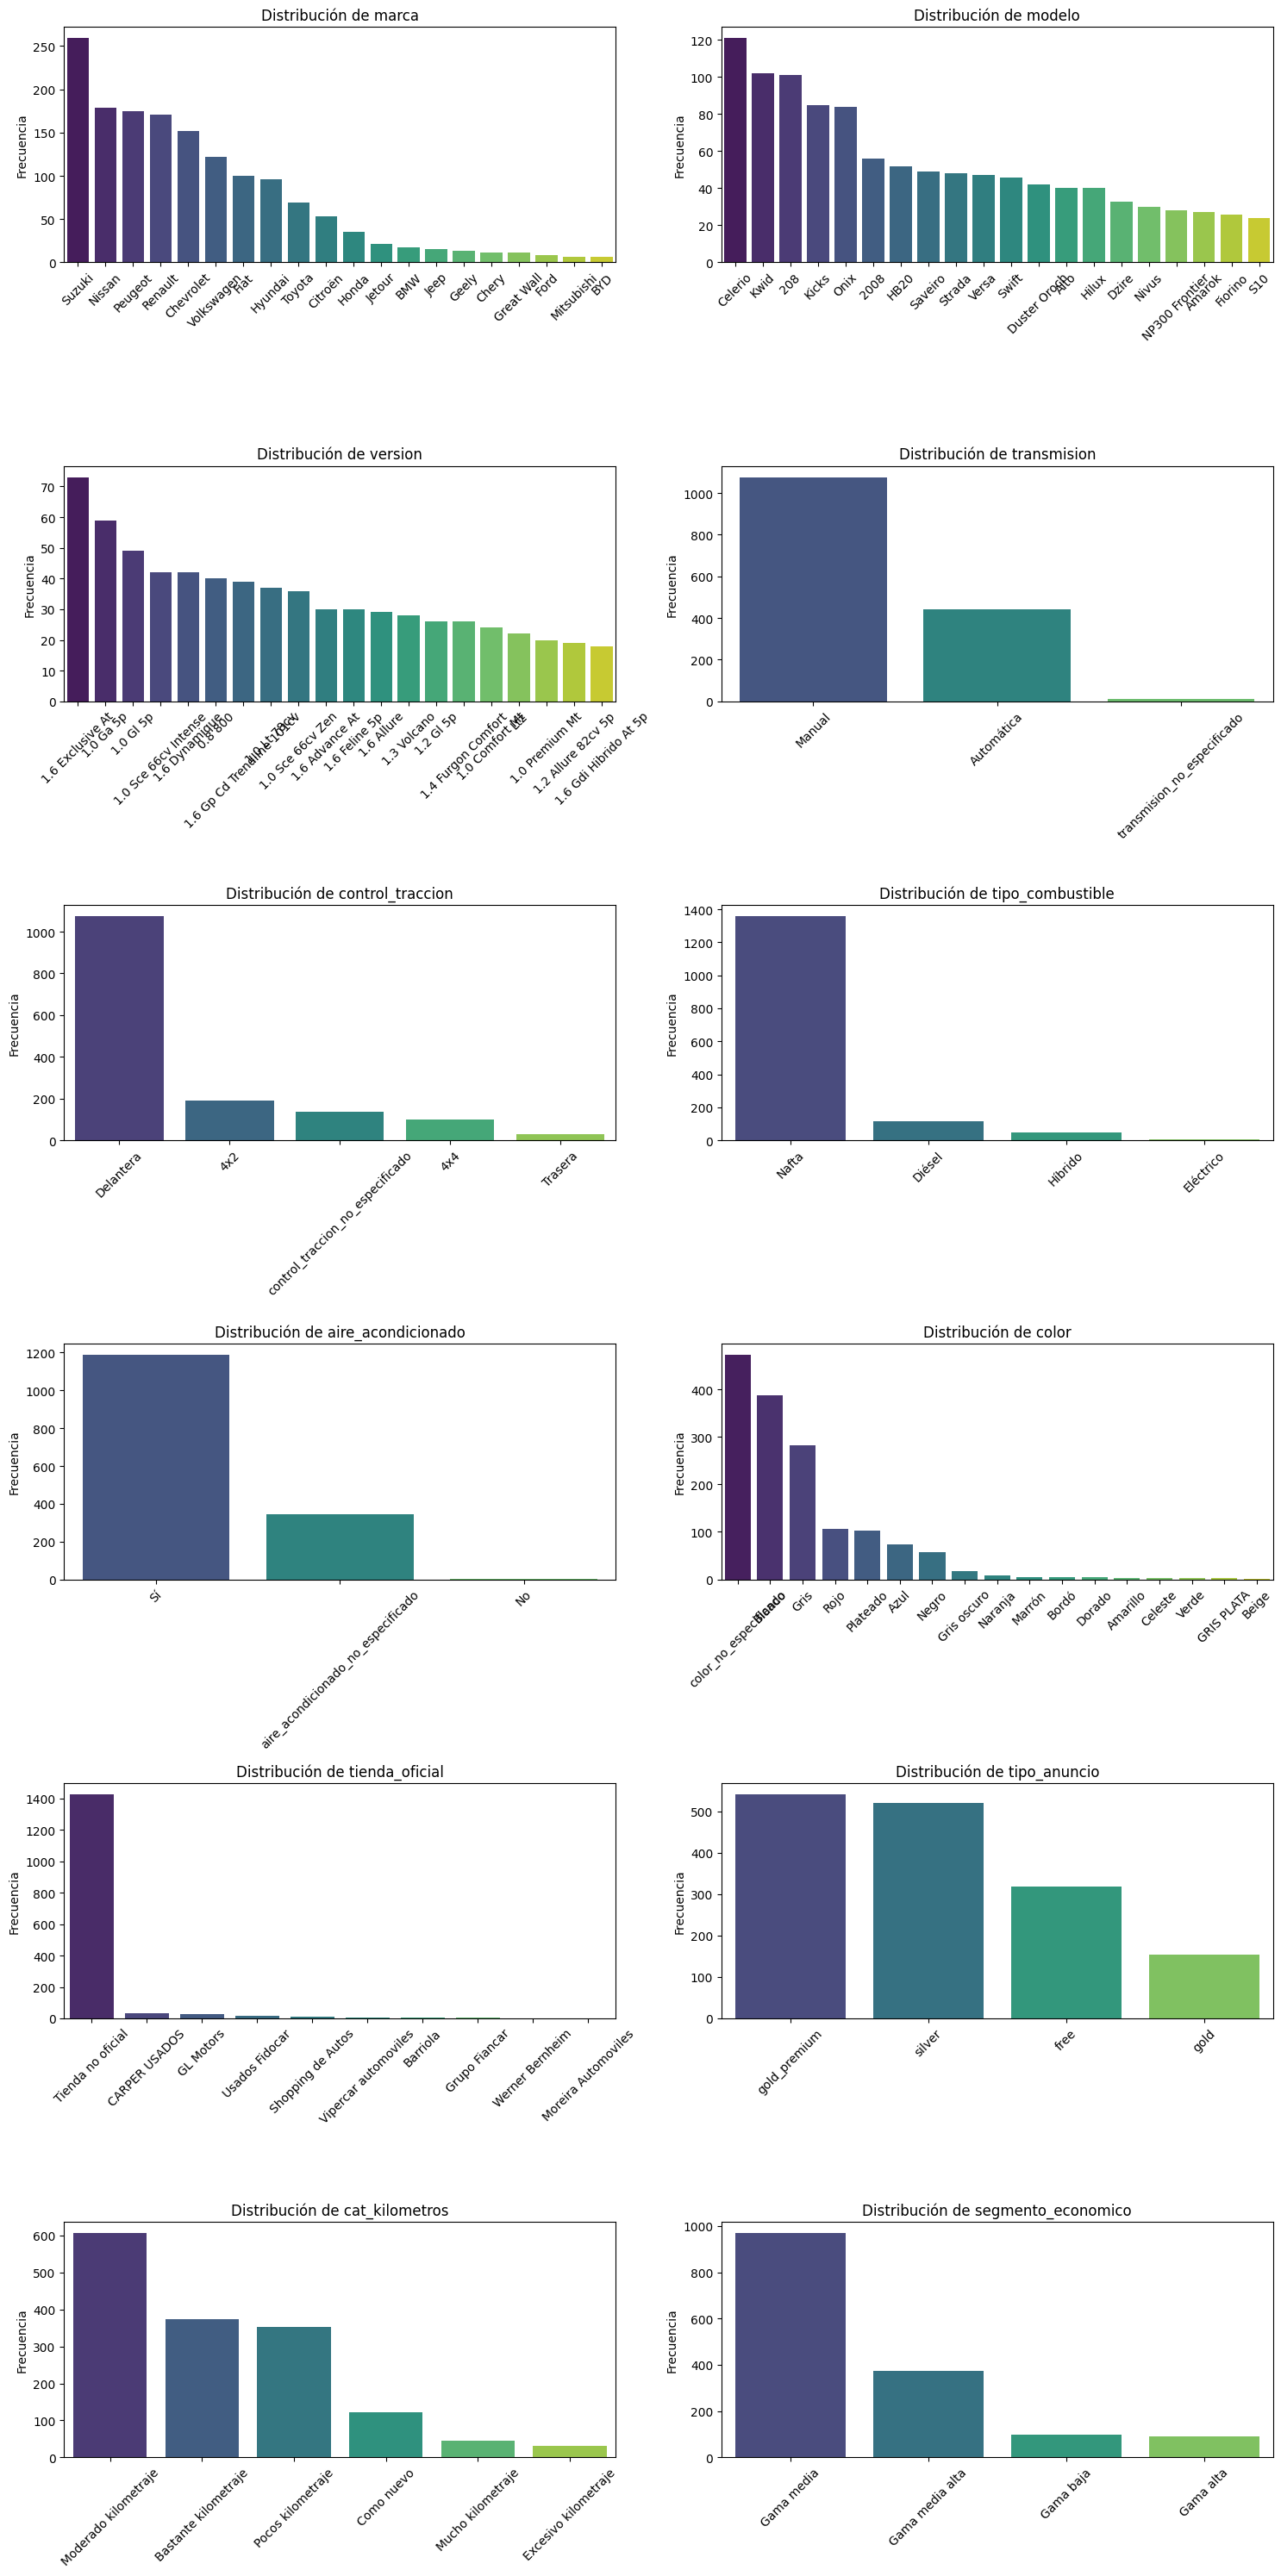

In [277]:
pinta_distribucion_categoricas(df_vehiculos_depreciacion, categoricas_vehiculos)
#Muestro solo los primeros 20 resultados para mejor visualización

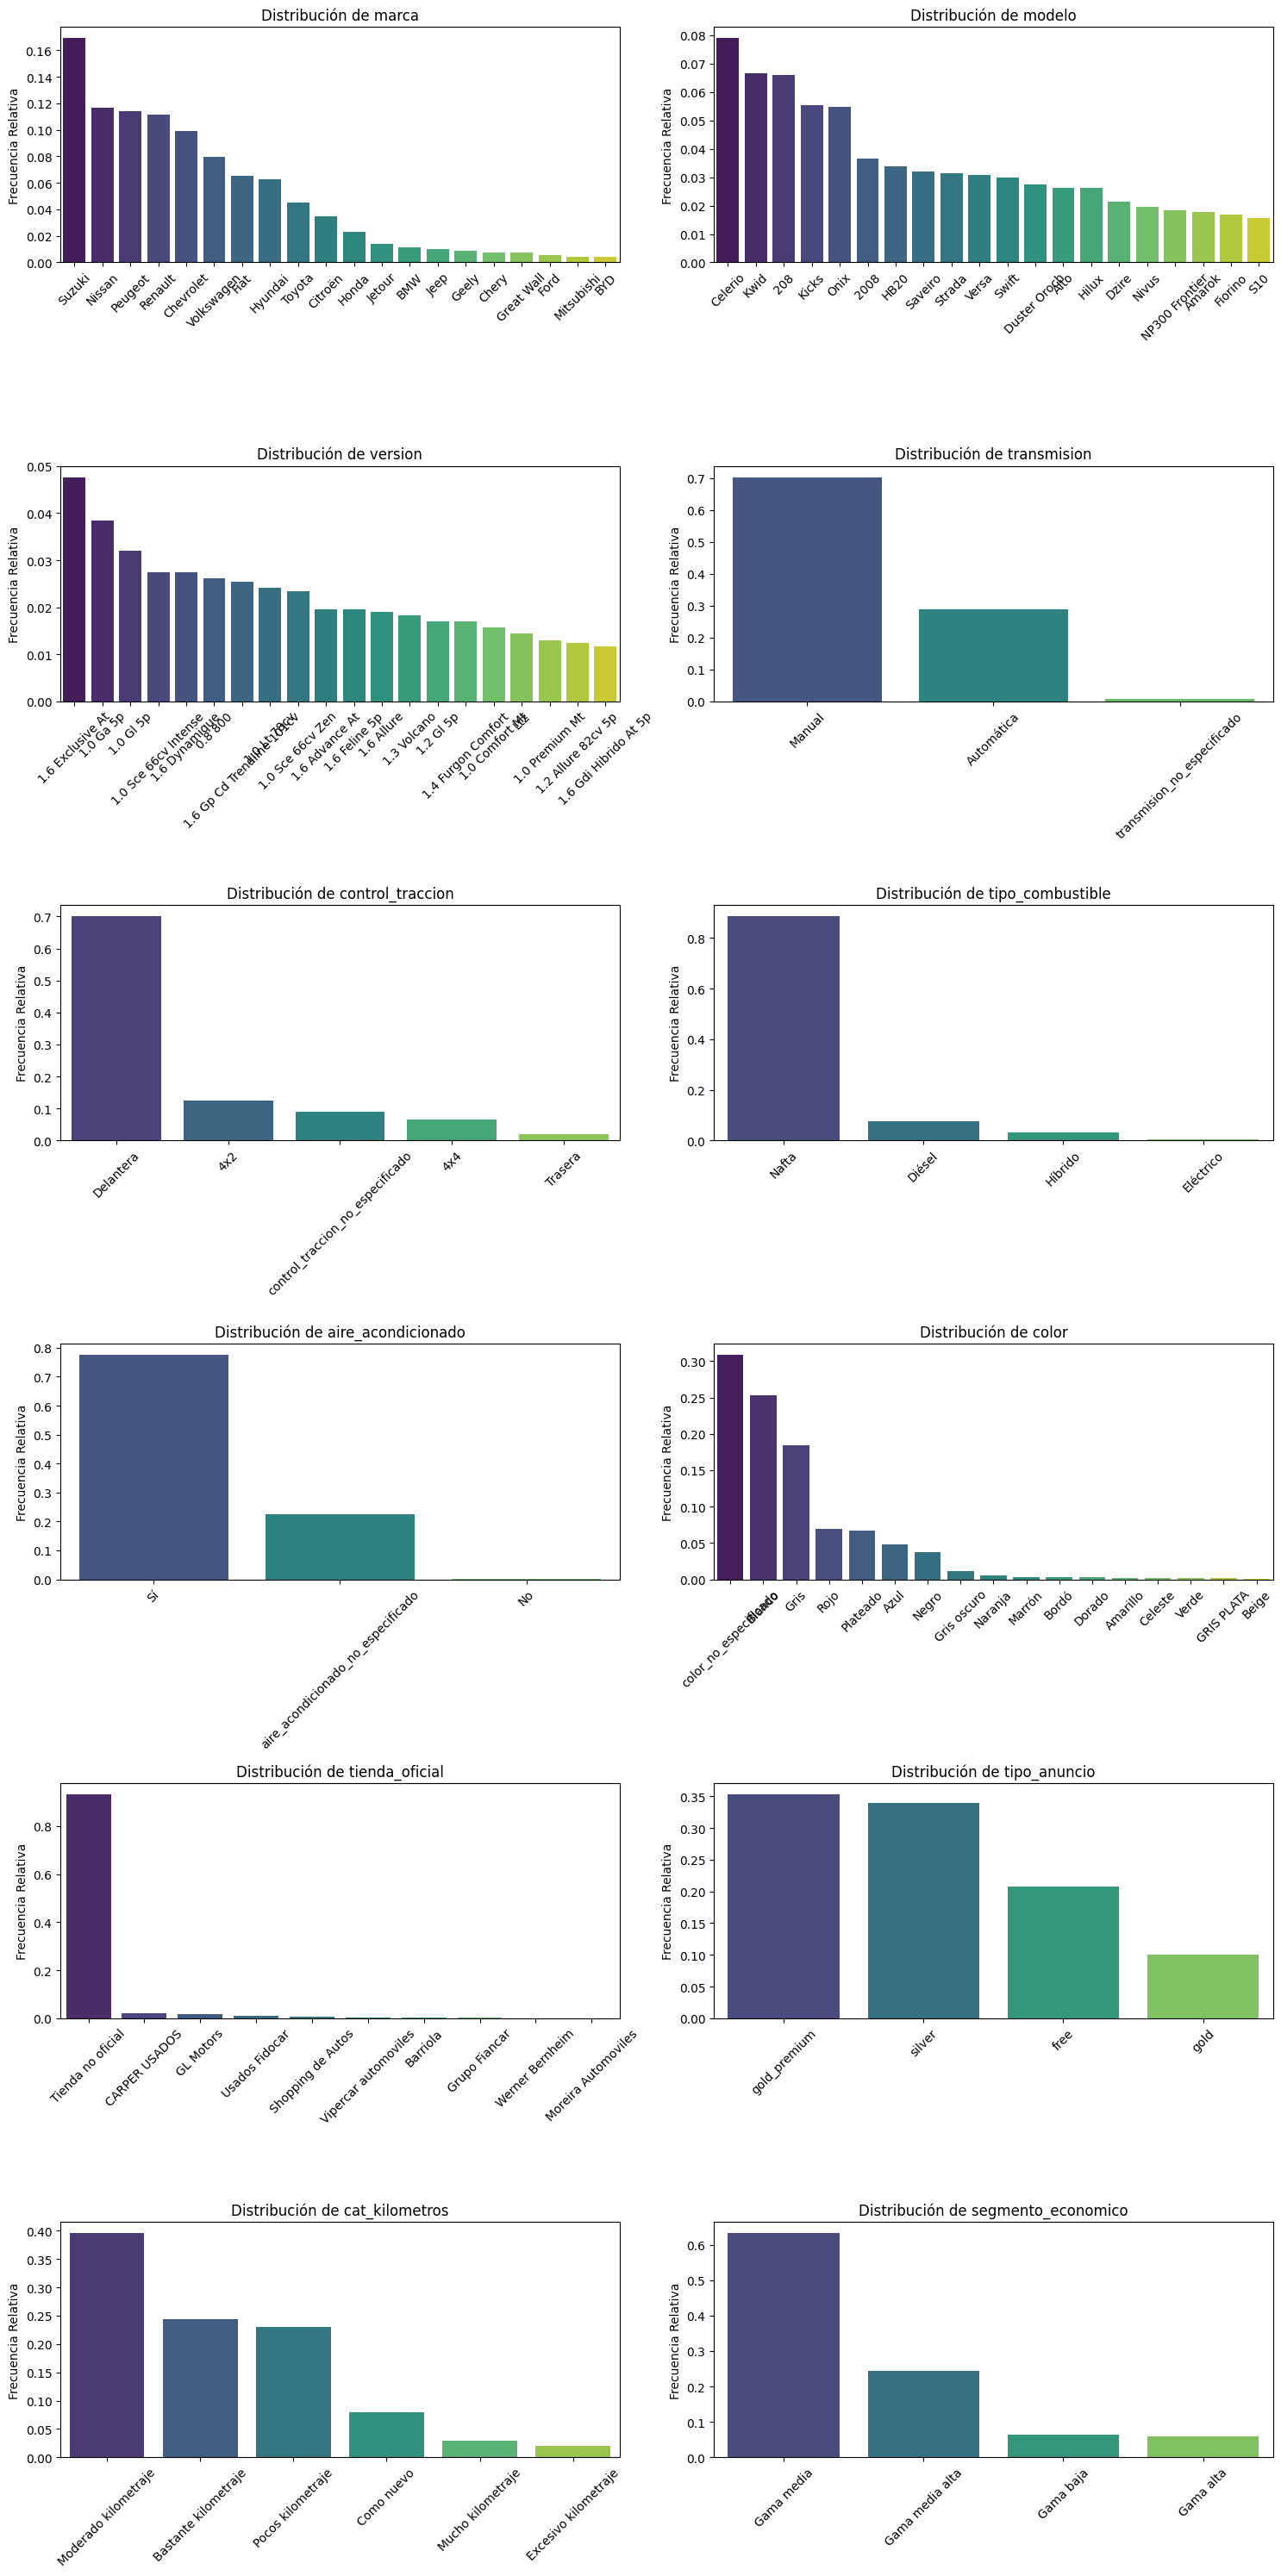

In [278]:
pinta_distribucion_categoricas(df_vehiculos_depreciacion, categoricas_vehiculos, relativa=True)
#Muestro solo los primeros 20 resultados para mejor visualización

## Medidas de posición

In [279]:
# columnas numéricas:
columnas_numericas_vehiculos = [
    "precio_usado",
    "anio_vehiculo",
    "kilometraje",
    "precio_nuevo",
    "depreciacion"
]

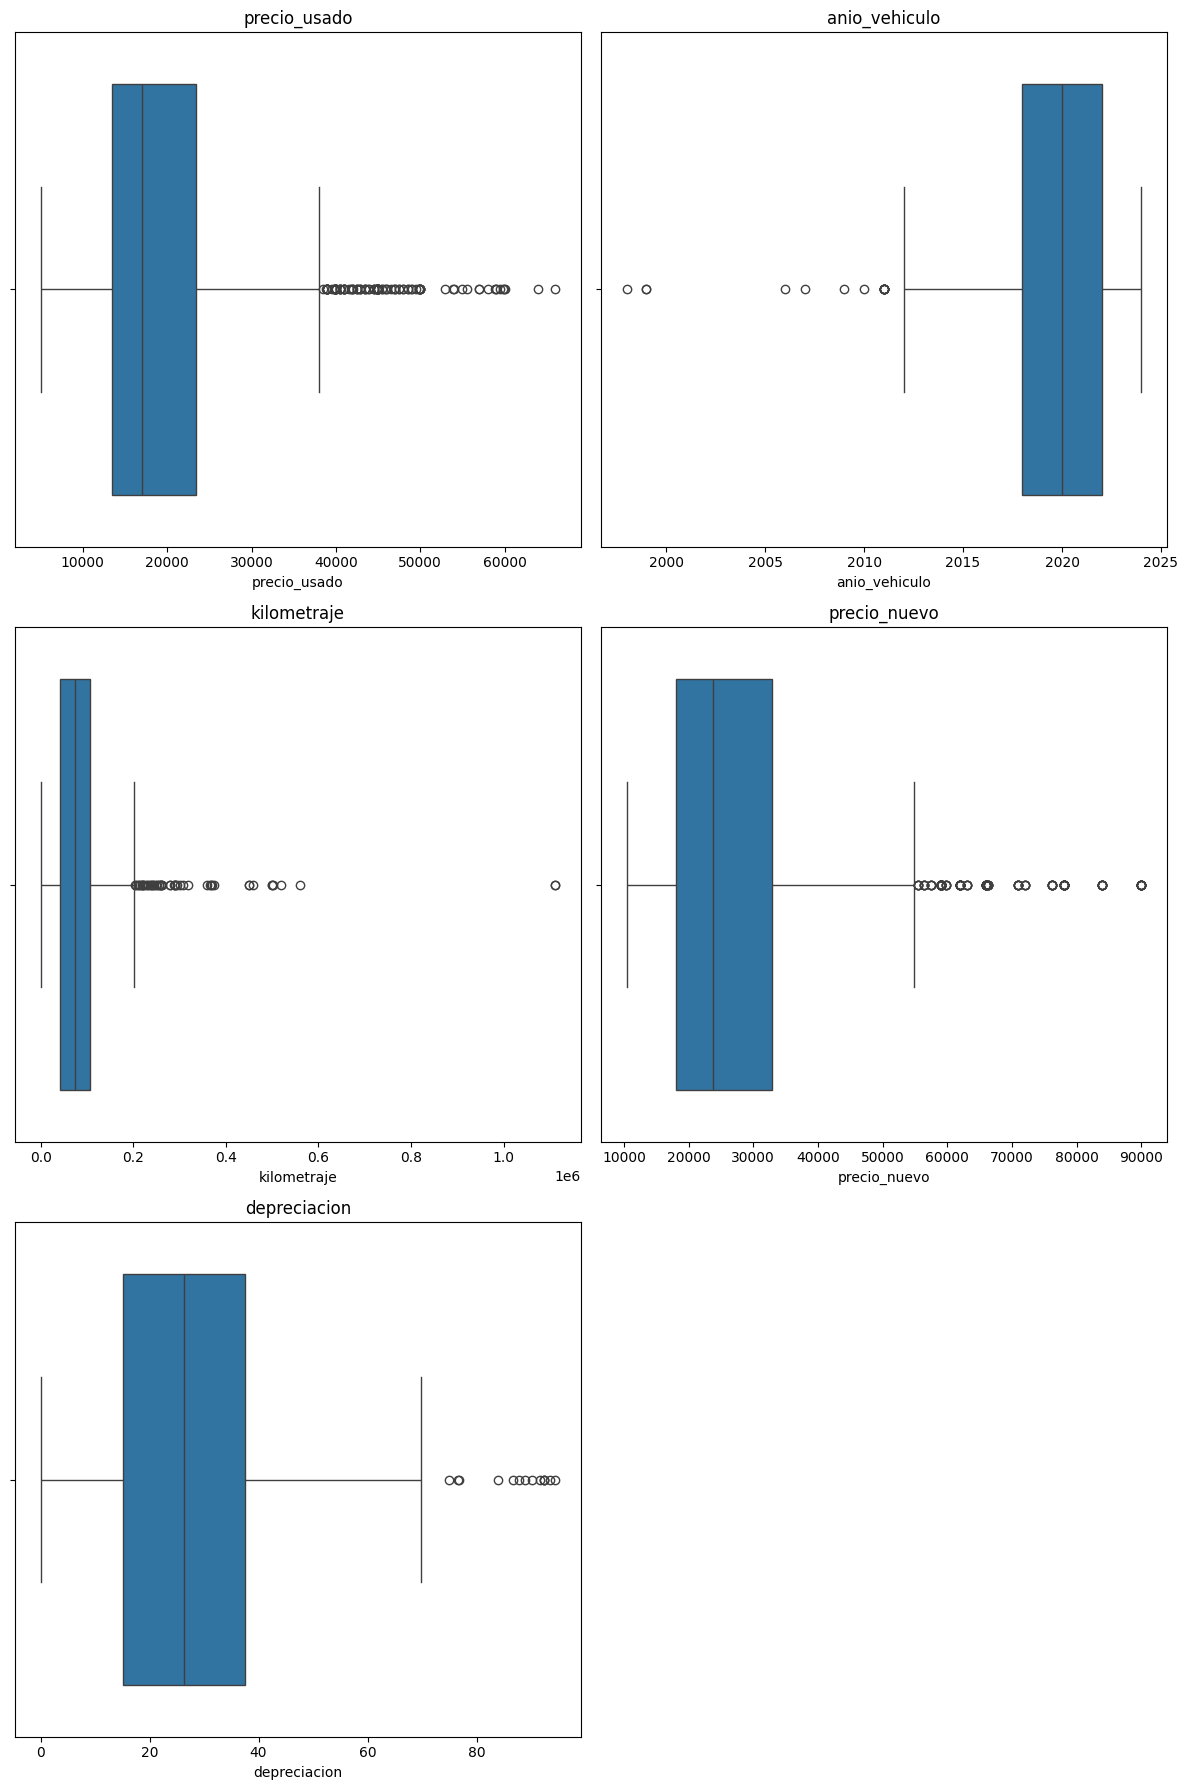

In [280]:
plot_multiple_boxplots(df_vehiculos_depreciacion, columnas_numericas_vehiculos)

In [281]:
# Rango
df_vehiculos_depreciacion.describe().loc["max"] - df_vehiculos_depreciacion.describe().loc["min"]

precio_usado     6.099000e+04
anio_vehiculo    2.600000e+01
kilometraje      1.111078e+06
puertas          3.000000e+00
id_seller        1.911393e+09
precio_nuevo     7.960000e+04
depreciacion     9.444444e+01
dtype: float64

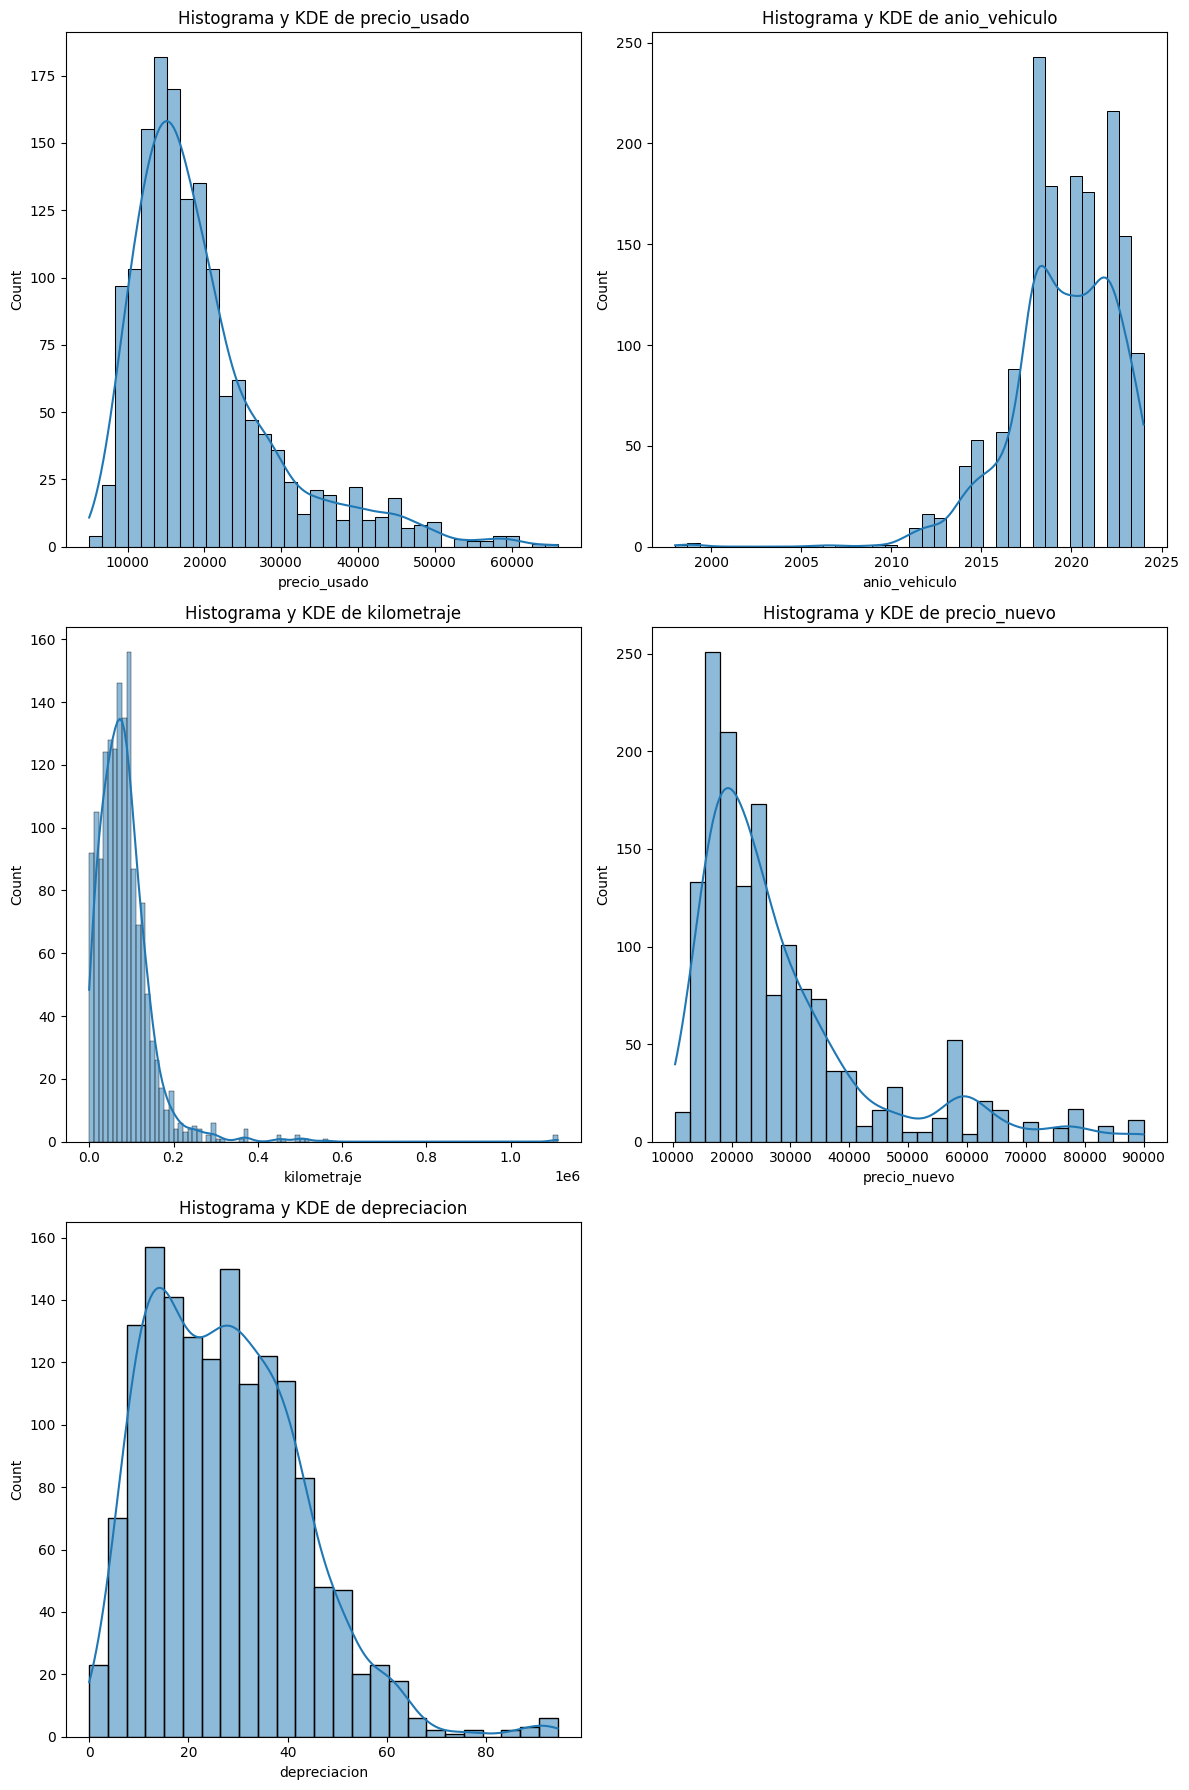

In [282]:
plot_histo_dens(df_vehiculos_depreciacion,columnas_numericas_vehiculos)

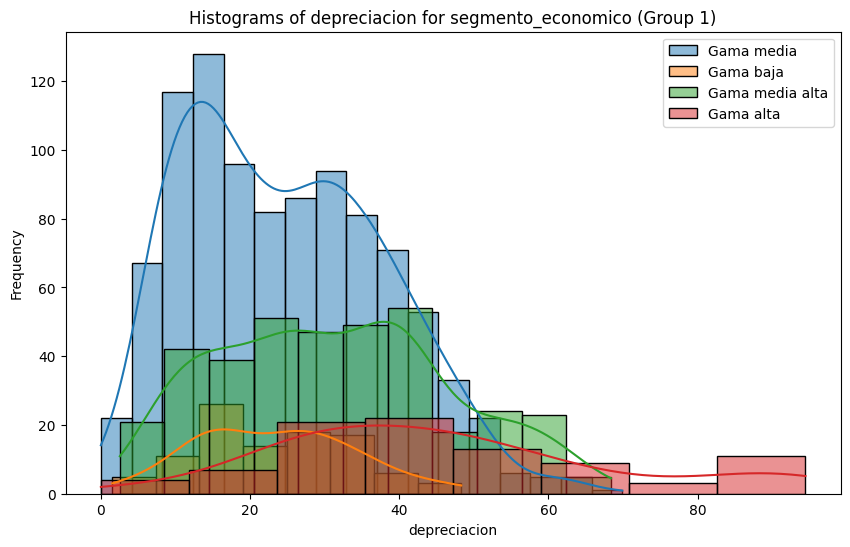

In [283]:
plot_grouped_histograms(df_vehiculos_depreciacion,"segmento_economico", "depreciacion", 4)

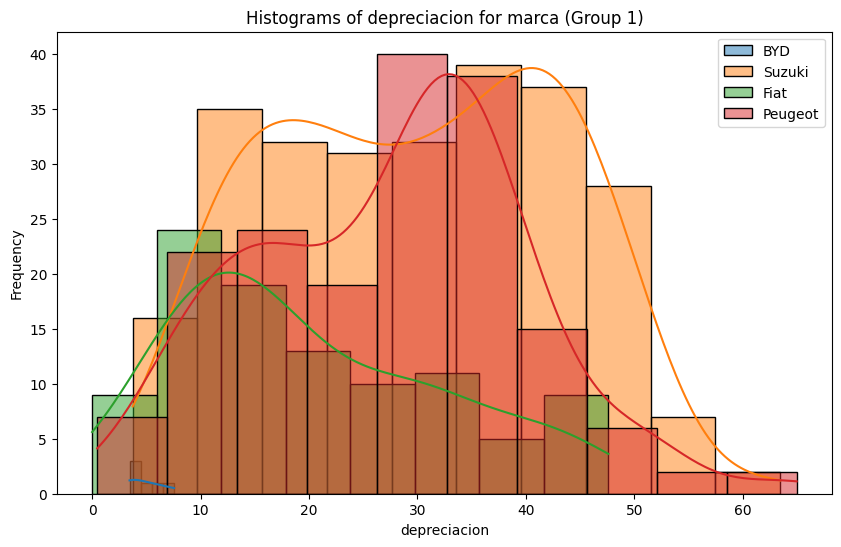

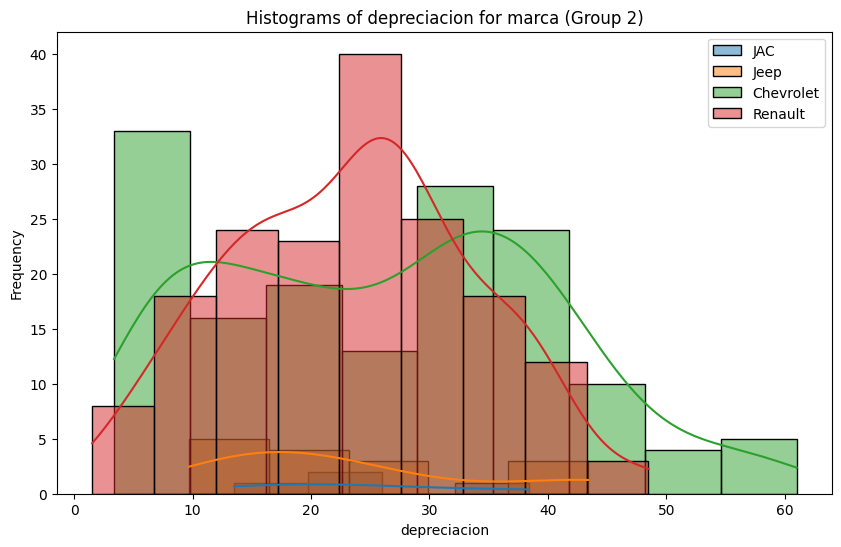

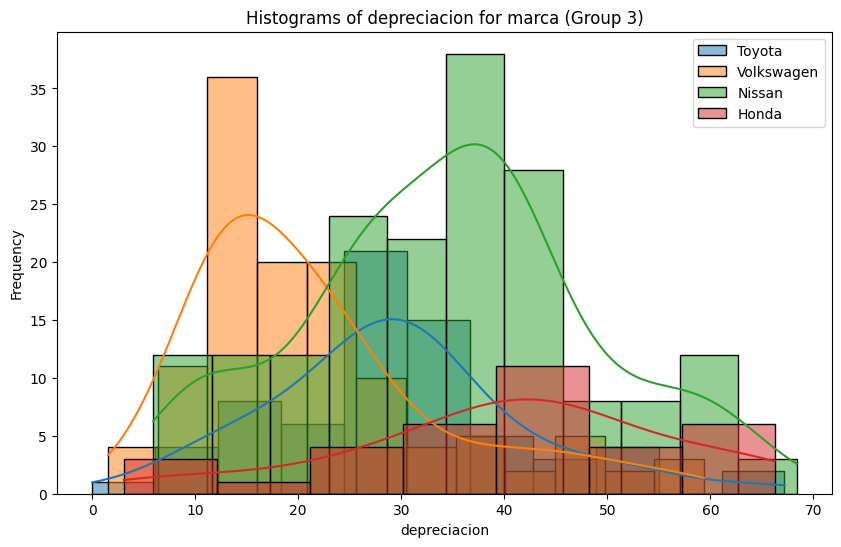

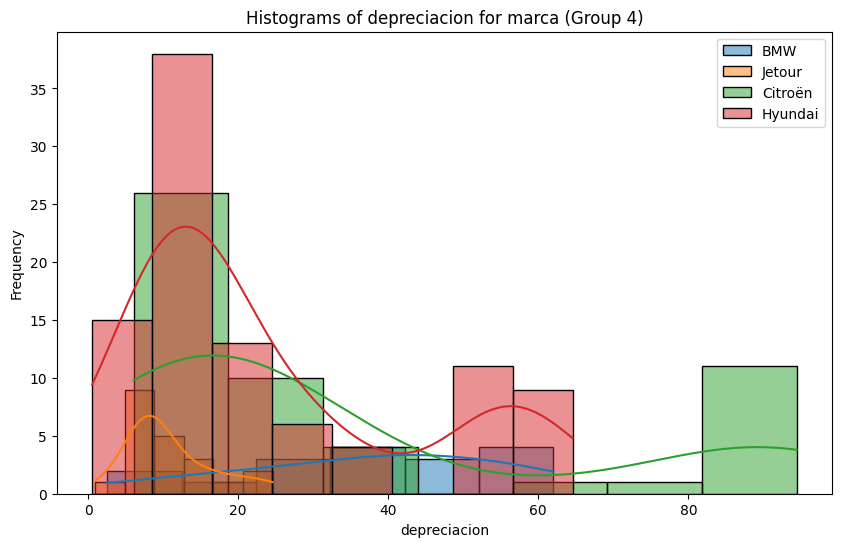

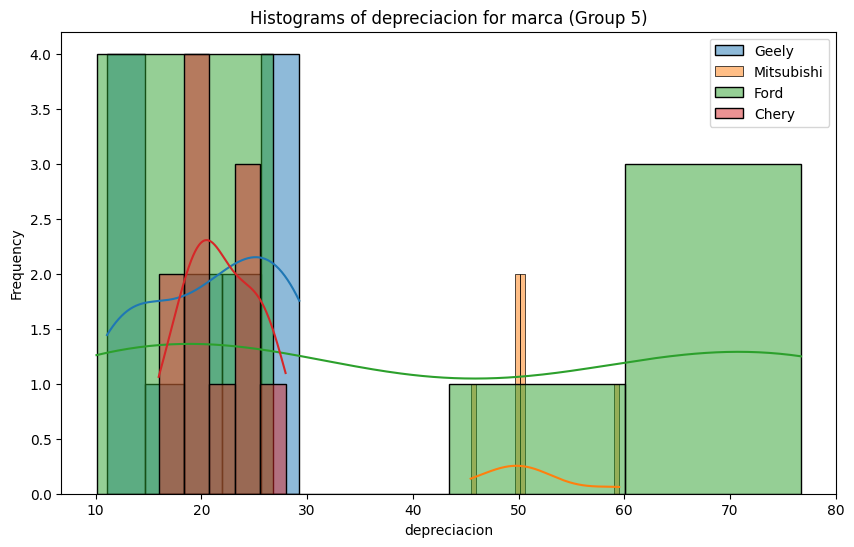

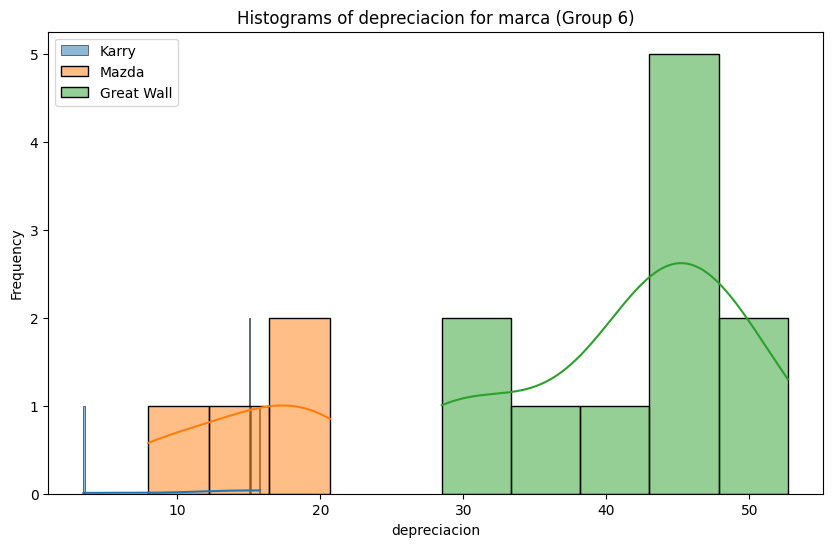

In [284]:
plot_grouped_histograms(df_vehiculos_depreciacion,"marca", "depreciacion", 4)

In [285]:
df_vehiculos_depreciacion[["precio_nuevo","depreciacion"]].corr()

precio_nuevo  depreciacion
precio_nuevo       1.00000       0.37598
depreciacion       0.37598       1.00000

In [286]:
from scipy.stats import pearsonr

pearsonr(df_vehiculos_depreciacion["precio_nuevo"], df_vehiculos_depreciacion["depreciacion"], alternative= "less")

PearsonRResult(statistic=0.3759798263402472, pvalue=1.0)

In [287]:
#df_vehiculos_depreciacion.to_csv('data/vehiculos_uy_depreciacion.csv', index=True) # --> para no modificar lo ya realizado

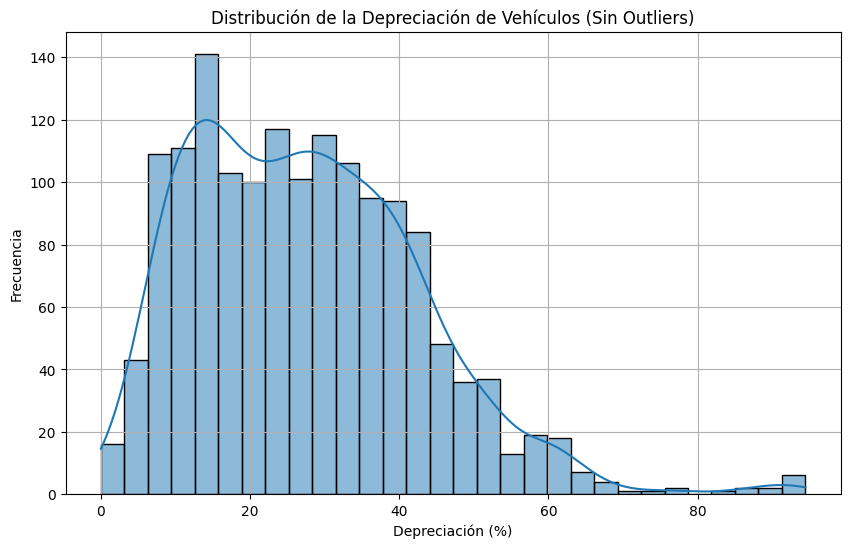

In [288]:
# Filtrando las columnas relevantes para este análisis
relevant_columns = [
    'marca', 'modelo', 'anio_vehiculo', 'precio_usado', 'precio_nuevo', 
    'condicion', 'cat_kilometros', 'segmento_economico', 'depreciacion', 
    'tipo_anuncio', 'fecha_baja_publicacion', 'tipo_combustible', 'kilometraje',
    'transmision'
]

df = df_vehiculos_depreciacion[relevant_columns]

# Gráfica de distribución de la depreciación sin outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['depreciacion'], bins=30, kde=True)
plt.title('Distribución de la Depreciación de Vehículos (Sin Outliers)')
plt.xlabel('Depreciación (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [289]:
df_vehiculos_depreciacion.loc[df_vehiculos_depreciacion['depreciacion'] > 60]

id                                             titulo moneda  \
41    MLU687402696                      Suzuki Celerio 2016 1.0 Ga 5p    USD   
176   MLU685896720                      Suzuki Celerio 2011 1.0 Ga 5p    USD   
245   MLU685727500   Peugeot Partner 1.4 1998 Buen Estado! - Barriola    USD   
486   MLU679566492  Ford Ranger Xlt 2.5 2014 Muy Buen Estado! - So...    USD   
487   MLU681488186                Ford Ranger Xlt 2.8 2006 Impecable!    USD   
490   MLU684036424                                    Ford Ranger Xlt    USD   
500   MLU686419176                                    Bmw 120i Pack M    USD   
512   MLU687477066               Hyundai Ioniq 1.6 Hibrido At 5p 2018    USD   
513   MLU687451134               Hyundai Ioniq 1.6 Hibrido At 5p 2018    USD   
526   MLU678123534                                      Hyundai Ioniq    USD   
527   MLU685904110               Hyundai Ioniq Hybrid Super Full 2018    USD   
546   MLU684738888                    Hyundai Ionic Hynrid At C/64961    USD   
578   MLU686623382           Hyundai Ioniq 2018 1.6 Gdi Hibrido At 5p    USD   
647   MLU641684657       Toyota Hilux Sr 2015 Gris Oscuro Buen Estado    USD   
671   MLU687072612          Toyota Hilux Sr 2.7 2012 Muy Buen Estado!    USD   
795   MLU687192290              Citroën C-elysée 2020 1.6 Feel Hdi 92    USD   
799   MLU683975862  Citroën Berlingo 2018 1.6 Hdi 2pl Dir Vid Bloq...    USD   
801   MLU685714498             Citroen Celysee 1.6 Hdi 100%financiado    USD   
802   MLU679999548  Citroën C-elysée Ex Taxi Hecho A Nuevo // Perm...    USD   
803   MLU679270876  Citroën Celysee Diesel Ex Taxi // Permuto O Fi...    USD   
809   MLU686017710                   Citroën C-elysée 1.6 Feel Hdi 92    USD   
811   MLU682537674  Citroen C-elysee Turbo Diesel Año 2015 Al Dia ...    USD   
817   MLU685499916                   Citroën C-elysée 1.6 Feel Hdi 92    USD   
819   MLU681637834              Citroën C-elysée 2019 1.6 Feel Hdi 92    USD   
821   MLU639875609                        Citroën C-elysée 1.6 Diesel    USD   
823   MLU684985766                          Citroen C Elysee  Ex Taxi    USD   
827   MLU684880612  Citroën Berlingo 2019 1.6 Hdi 2pl Dir Vid Bloq...    USD   
831   MLU687449702              Citroën C-elysée 2015 1.6 Feel Hdi 92    USD   
840   MLU682249528  Peugeot 208 Allure Año 2020 Retira Con U$d 8.9...    USD   
991   MLU639955341  Nissan Sentra Exclusive 1.8 Excelente Estado! ...    USD   
1033  MLU687126298                           Nissan Versa Full Manual    USD   
1035  MLU684958904        Nissan Sentra Exclusive 1.8 2015 Impecable!    USD   
1037  MLU642643953                  Nissan Sentra 2014 1.8 Advance At    USD   
1075  MLU641709657                  Nissan Versa Automatico Fullcars     USD   
1078  MLU684985538                            Nissan Forntier Np300 S    USD   
1101  MLU638779333                   Nissan Versa 2012 1.6 Advance At    USD   
1140  MLU687053298                 Nissan Versa 2019 1.6 Exclusive At    USD   
1155  MLU685691578                  Nissan Sentra 2014 1.8 Advance At    USD   
1379  MLU687422578            Honda Ridgeline 2014 3.5 Rtlt V6 4x4 At    USD   
1388  MLU687316158            Honda Ridgeline 2014 3.5 Rtlt V6 4x4 At    USD   
1392  MLU639319927  Honda Ridgeline 4x4 Automotoratopcar Usd 15000...    USD   
1395  MLU686532592          Honda Ridgline V6 Automatica Amaya Motors    USD   
1397  MLU684191800                 Honda Ridgeline 3.5 Rtlt V6 4x4 At    USD   
1435  MLU686202250                     Chevrolet S10 Turbo Diesel 4*4    USD   

      precio_usado      marca          modelo  \
41          6500.0     Suzuki         Celerio   
176         7000.0     Suzuki         Celerio   
245         5950.0    Peugeot         Partner   
486        16900.0       Ford          Ranger   
487        16750.0       Ford          Ranger   
490        17990.0       Ford          Ranger   
500        31900.0        BMW         Serie 2   
512        22900.0    H

## ¿Cómo se distribuye la depreciación de los vehículos? 


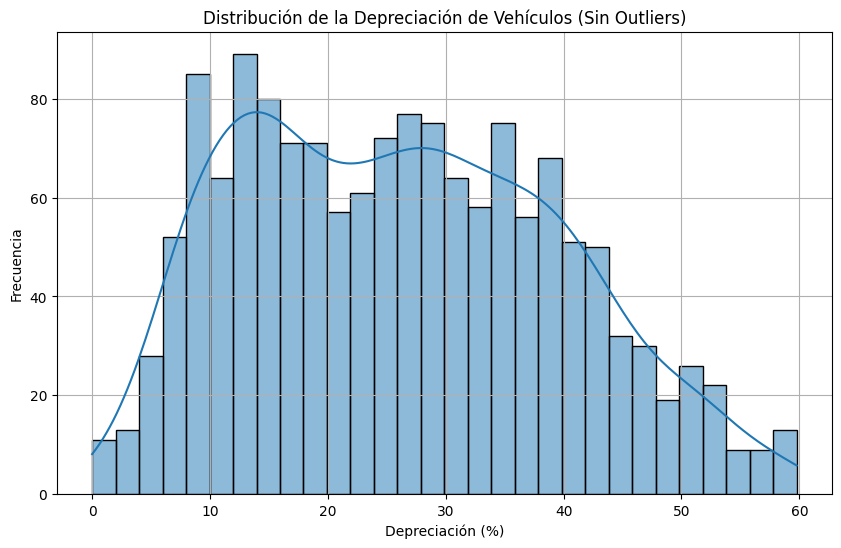

In [290]:
# Del análisis de el listado de publicaciones con depreciación > 60, observo que corresponden a errores en la publicación.
# Tomo la decisión de filtrar esos datos para que no contaminen el análisis

# Filtrando las columnas relevantes para este análisis

df = df_vehiculos_depreciacion[relevant_columns]

# Filtrar los datos para eliminar registros con depreciación mayor a 60%
df_filtered = df[df['depreciacion'] <= 60]

# Gráfica de distribución de la depreciación sin outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['depreciacion'], bins=30, kde=True)
plt.title('Distribución de la Depreciación de Vehículos (Sin Outliers)')
plt.xlabel('Depreciación (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [291]:
df_filtered.depreciacion.describe()

count    1488.000000
mean       26.183737
std        13.471622
min         0.000000
25%        14.891760
50%        25.335570
75%        36.271595
max        59.773829
Name: depreciacion, dtype: float64

## ¿La transmisión del vehículo influye en la depreciación?

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/4009640828.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmision', y='depreciacion', data=df_filtered_trans, palette="viridis")


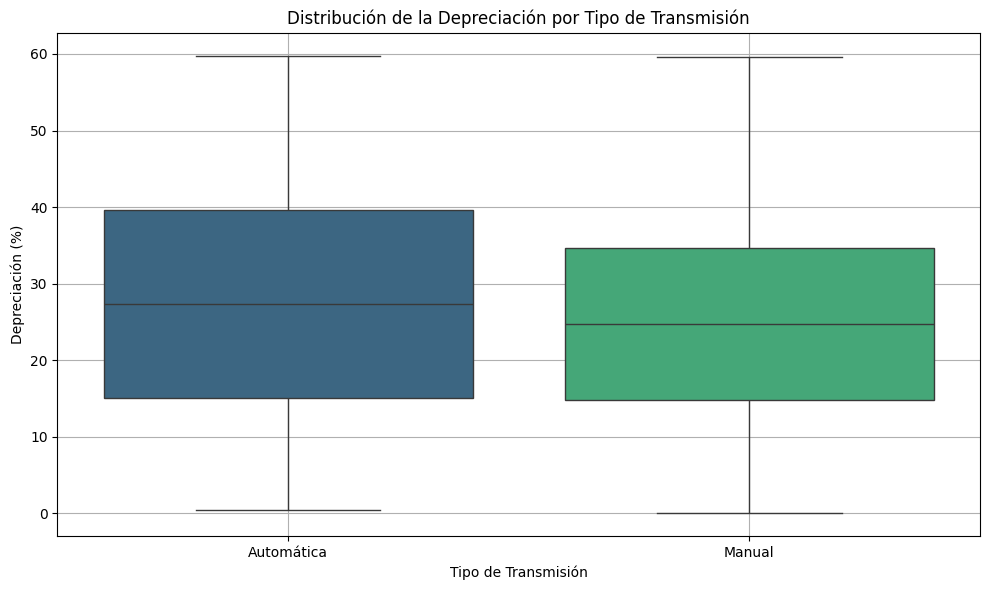

In [292]:
# Filtrar los datos para excluir las transmisiones no especificadas
df_filtered_trans = df_filtered[df_filtered['transmision'] != 'transmision_no_especificado']

# Crear un diagrama de dispersión entre tipo de transmisión y depreciación
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmision', y='depreciacion', data=df_filtered_trans, palette="viridis")
plt.title('Distribución de la Depreciación por Tipo de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Depreciación (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


## ¿La elección de combustible afecta cuánto pierde de valor tu coche? ¿Deberías considerar un cambio a vehículos eléctricos o híbridos?

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/4268271681.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='depreciacion', y='tipo_combustible', data=depreciacion_por_combustible, palette="viridis", ax=axes[0])
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/4268271681.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depreciacion', y='tipo_combustible', data=df_filtered, order=depreciacion_por_combustible['tipo_combustible'], palette="viridis", ax=axes[1])


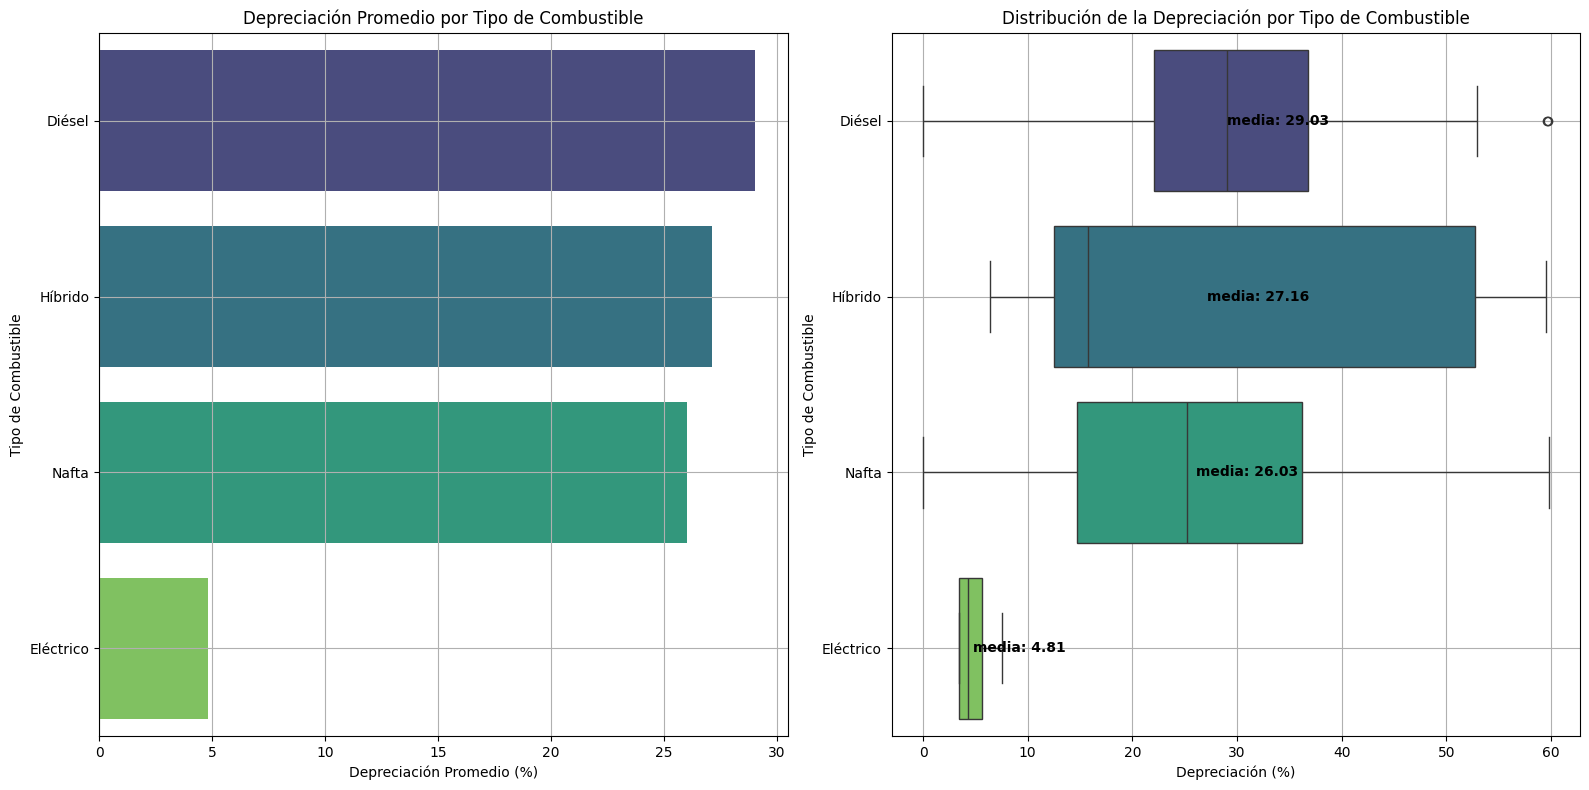

In [293]:
# Calcular la depreciación promedio por tipo de combustible
depreciacion_por_combustible = df_filtered.groupby('tipo_combustible')['depreciacion'].mean().reset_index()
depreciacion_por_combustible = depreciacion_por_combustible.sort_values(by='depreciacion', ascending=False)

# Crear la figura con dos columnas y una fila
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras
sns.barplot(x='depreciacion', y='tipo_combustible', data=depreciacion_por_combustible, palette="viridis", ax=axes[0])
axes[0].set_title('Depreciación Promedio por Tipo de Combustible')
axes[0].set_xlabel('Depreciación Promedio (%)')
axes[0].set_ylabel('Tipo de Combustible')
axes[0].grid(True)

# Gráfico de caja y bigote
sns.boxplot(x='depreciacion', y='tipo_combustible', data=df_filtered, order=depreciacion_por_combustible['tipo_combustible'], palette="viridis", ax=axes[1])
axes[1].set_title('Distribución de la Depreciación por Tipo de Combustible')
axes[1].set_xlabel('Depreciación (%)')
axes[1].set_ylabel('Tipo de Combustible')
axes[1].grid(True)

# Añadir etiquetas de promedio general en el gráfico de caja y bigote
for i, combustible in enumerate(depreciacion_por_combustible['tipo_combustible']):
    media = depreciacion_por_combustible[depreciacion_por_combustible['tipo_combustible'] == combustible]['depreciacion'].values[0]
    axes[1].text(media, i, f'media: {media:.2f}', va='center', ha='left', color='black', fontweight='bold')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

## ¿Cuántos kilómetros son demasiados? ¿El kilometraje realmente afecta el valor de reventa de un vehículo?

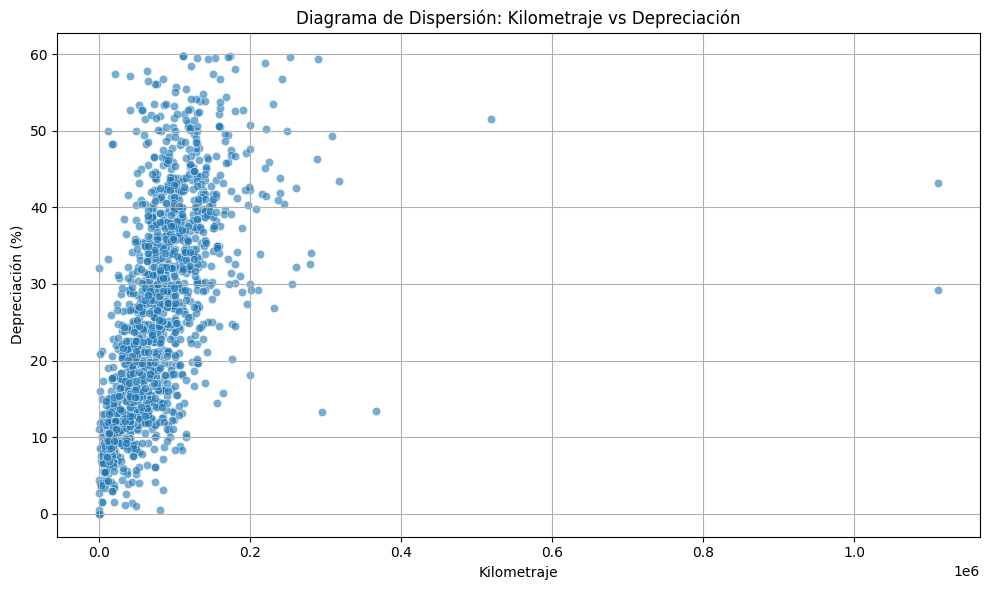

p-value: 1.1615034099622626e-104, R-squared: 0.27221704374569905


In [303]:
# Crear un diagrama de dispersión entre kilometraje y depreciación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometraje', y='depreciacion', data=df_filtered, alpha=0.6)
plt.title('Diagrama de Dispersión: Kilometraje vs Depreciación')
plt.xlabel('Kilometraje')
plt.ylabel('Depreciación (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis estadístico: cálculo del p-valor para la relación entre kilometraje y depreciación
slope, intercept, r_value, p_value, std_err = stats.linregress(df_filtered['kilometraje'], df_filtered['depreciacion'])

# Mostrar los resultados del análisis
print(f"p-value: {p_value}, R-squared: {r_value ** 2}")

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/481996766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cat_kilometros'] = pd.Categorical(


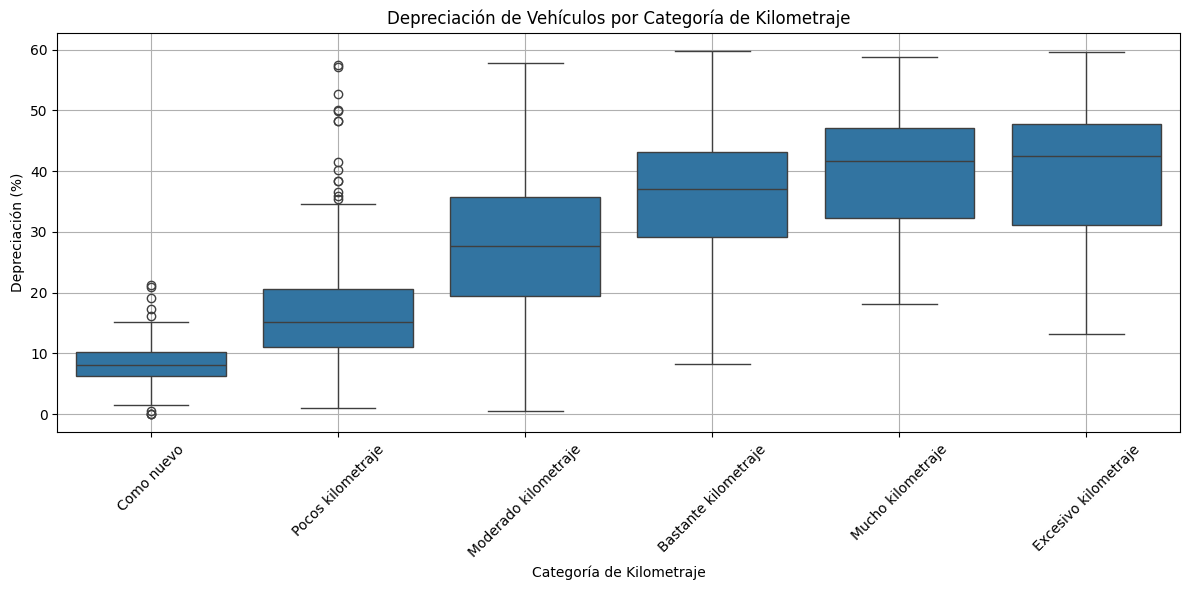

In [295]:
df_filtered['cat_kilometros'] = pd.Categorical(
    df_filtered['cat_kilometros'], 
    categories=[
        'Como nuevo', 'Pocos kilometraje', 'Moderado kilometraje', 
        'Bastante kilometraje', 'Mucho kilometraje', 'Excesivo kilometraje', 
    ],
    ordered=True
)

# Gráfica de depreciación promedio por categoría de kilometraje
plt.figure(figsize=(12, 6))
sns.boxplot(x='cat_kilometros', y='depreciacion', data=df_filtered)
plt.title('Depreciación de Vehículos por Categoría de Kilometraje')
plt.xlabel('Categoría de Kilometraje')
plt.ylabel('Depreciación (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Como nuevo: Los vehículos en esta categoría muestran una depreciación relativamente baja, lo cual es esperado ya que el kilometraje es un factor crucial en la valoración de un vehículo usado.
- Pocos kilometraje: La depreciación aumenta ligeramente en comparación con “Como nuevo”, pero sigue siendo relativamente baja.
- Moderado kilometraje: Hay una mayor variabilidad en la depreciación, pero en promedio, la depreciación sigue siendo moderada.
- Bastante kilometraje: A partir de esta categoría, la depreciación muestra una tendencia clara a aumentar.
- Mucho kilometraje: La depreciación es notablemente más alta, indicando que los vehículos con mucho kilometraje pierden más valor.
- Excesivo kilometraje: Esta categoría tiene la mayor variabilidad y los valores más altos de depreciación, lo que refuerza la importancia del kilometraje en la devaluación del vehículo.

Desde el punto de vista de la correlación: La correlación entre kilometraje y depreciación es de aproximadamente 0.60, lo que indica una relación moderadamente fuerte. Esto sugiere que el kilometraje es un buen indicador de la depreciación del valor del vehículo.

El kilometraje es un factor importante en la depreciación de los vehículos. A medida que aumenta el kilometraje, también lo hace la depreciación, especialmente notable a partir de “Bastante kilometraje”. Los vehículos con “Excesivo kilometraje” presentan la mayor depreciación, lo que puede influir significativamente en la decisión de compra.



## Pero entonces, ¿cuál es la mejor estrategia de compra y venta con el menor impacto en la depreciación?

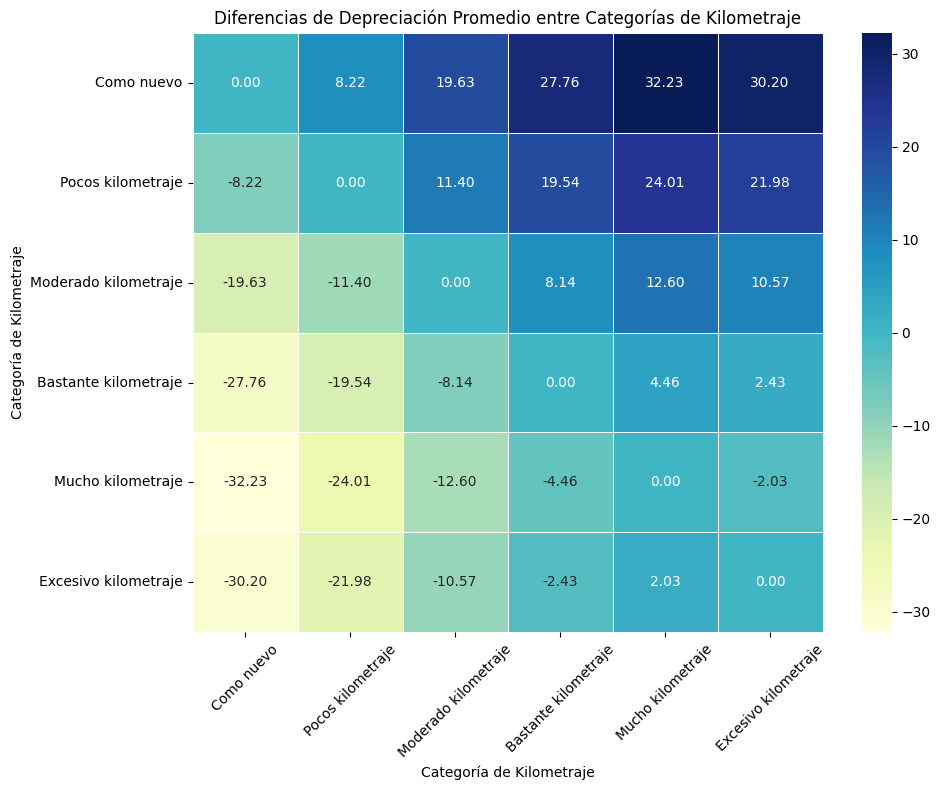

In [296]:
categorias = df_filtered['cat_kilometros'].cat.categories
depreciacion_matrix = pd.DataFrame(index=categorias, columns=categorias)

# Rellenar la matriz con las diferencias promedio de depreciación entre categorías
for i in range(len(categorias)):
    for j in range(len(categorias)):
        if i != j:
            media_i = df_filtered[df_filtered['cat_kilometros'] == categorias[i]]['depreciacion'].mean()
            media_j = df_filtered[df_filtered['cat_kilometros'] == categorias[j]]['depreciacion'].mean()
            depreciacion_matrix.iloc[i, j] = media_j - media_i
        else:
            depreciacion_matrix.iloc[i, j] = 0

depreciacion_matrix

# Crear un mapa de calor para visualizar la depreciación entre categorías de kilometraje
plt.figure(figsize=(10, 8))
sns.heatmap(depreciacion_matrix.astype(float), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Diferencias de Depreciación Promedio entre Categorías de Kilometraje')
plt.xlabel('Categoría de Kilometraje')
plt.ylabel('Categoría de Kilometraje')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## ¿Cuáles son las marcas y modelos que mejor retienen su valor? ¿Hay alguna marca en la que puedas confiar para mantener tu inversión?

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/3279220477.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depreciacion', y='marca', data=df_top_marcas, order=depreciacion_promedio_marca, palette="viridis")


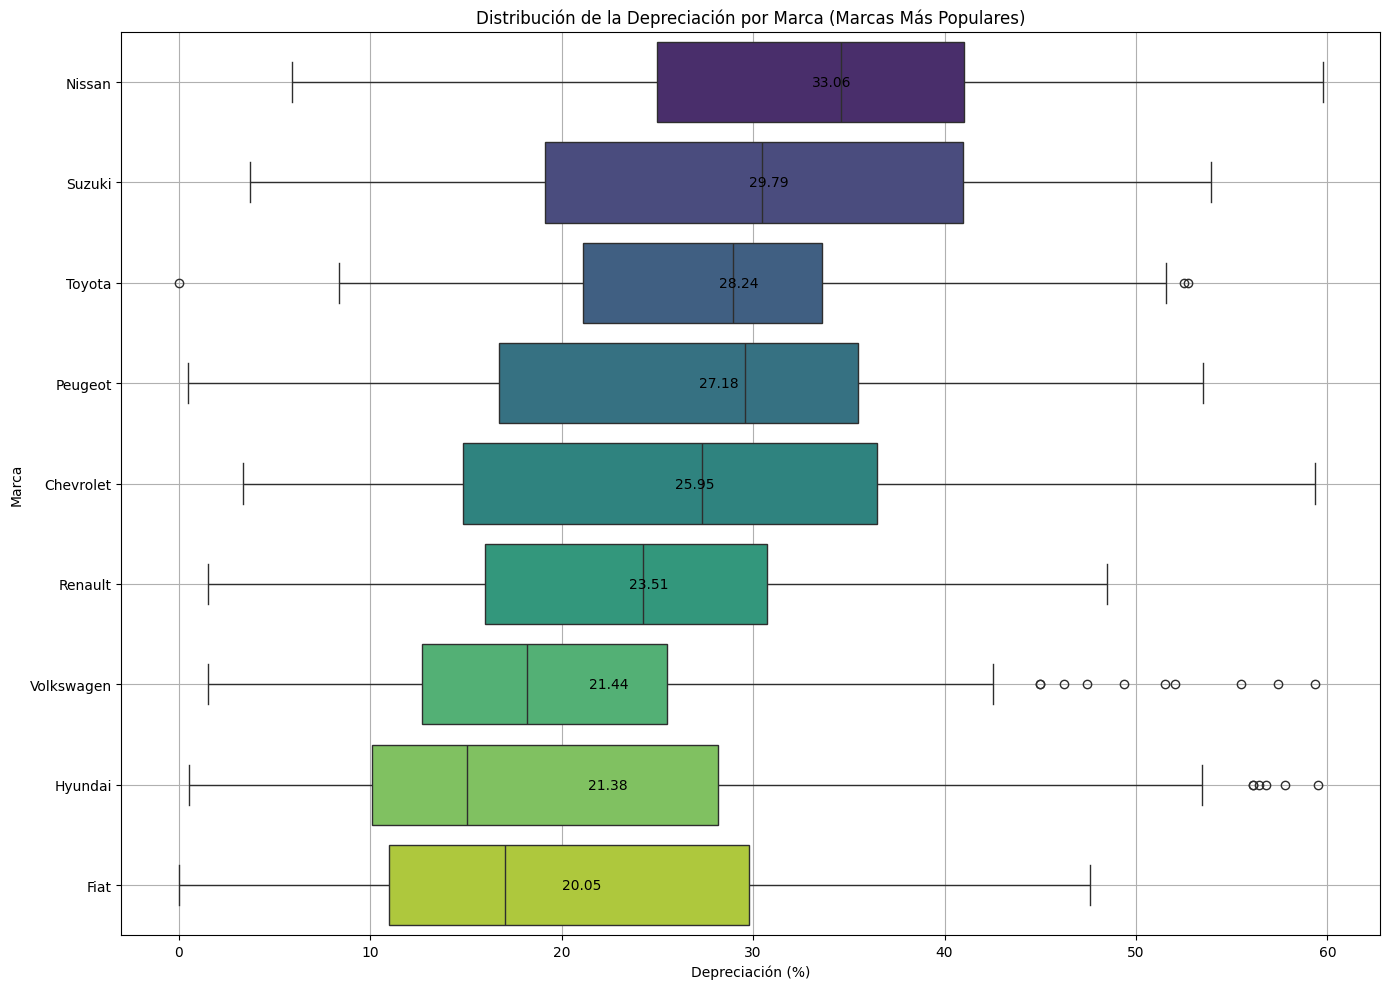

In [297]:
# Identificar las marcas más comunes en el dataset
marca_counts = df_filtered['marca'].value_counts()
top_marcas = marca_counts[marca_counts > marca_counts.mean()].index

# Filtrar el dataframe para incluir solo las marcas más comunes
df_top_marcas = df_filtered[df_filtered['marca'].isin(top_marcas)]

# Calcular la depreciación promedio por marca para ordenar
depreciacion_promedio_marca = df_top_marcas.groupby('marca')['depreciacion'].mean().sort_values(ascending=False).index

# Crear un gráfico de caja y bigote para mostrar la distribución de la depreciación dentro de cada una de las marcas más comunes, ordenadas por depreciación promedio
plt.figure(figsize=(14, 10))
sns.boxplot(x='depreciacion', y='marca', data=df_top_marcas, order=depreciacion_promedio_marca, palette="viridis")

# Calcular y etiquetar la media de cada marca
for i, marca in enumerate(depreciacion_promedio_marca):
    media = df_top_marcas[df_top_marcas['marca'] == marca]['depreciacion'].mean()
    plt.text(media, i, f'{media:.2f}', va='center', ha='left', color='black')

plt.title('Distribución de la Depreciación por Marca (Marcas Más Populares)')
plt.xlabel('Depreciación (%)')
plt.ylabel('Marca')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/91953396.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depreciacion', y='marca', data=df_remaining_marcas, order=depreciacion_promedio_remaining_marca, palette="viridis")


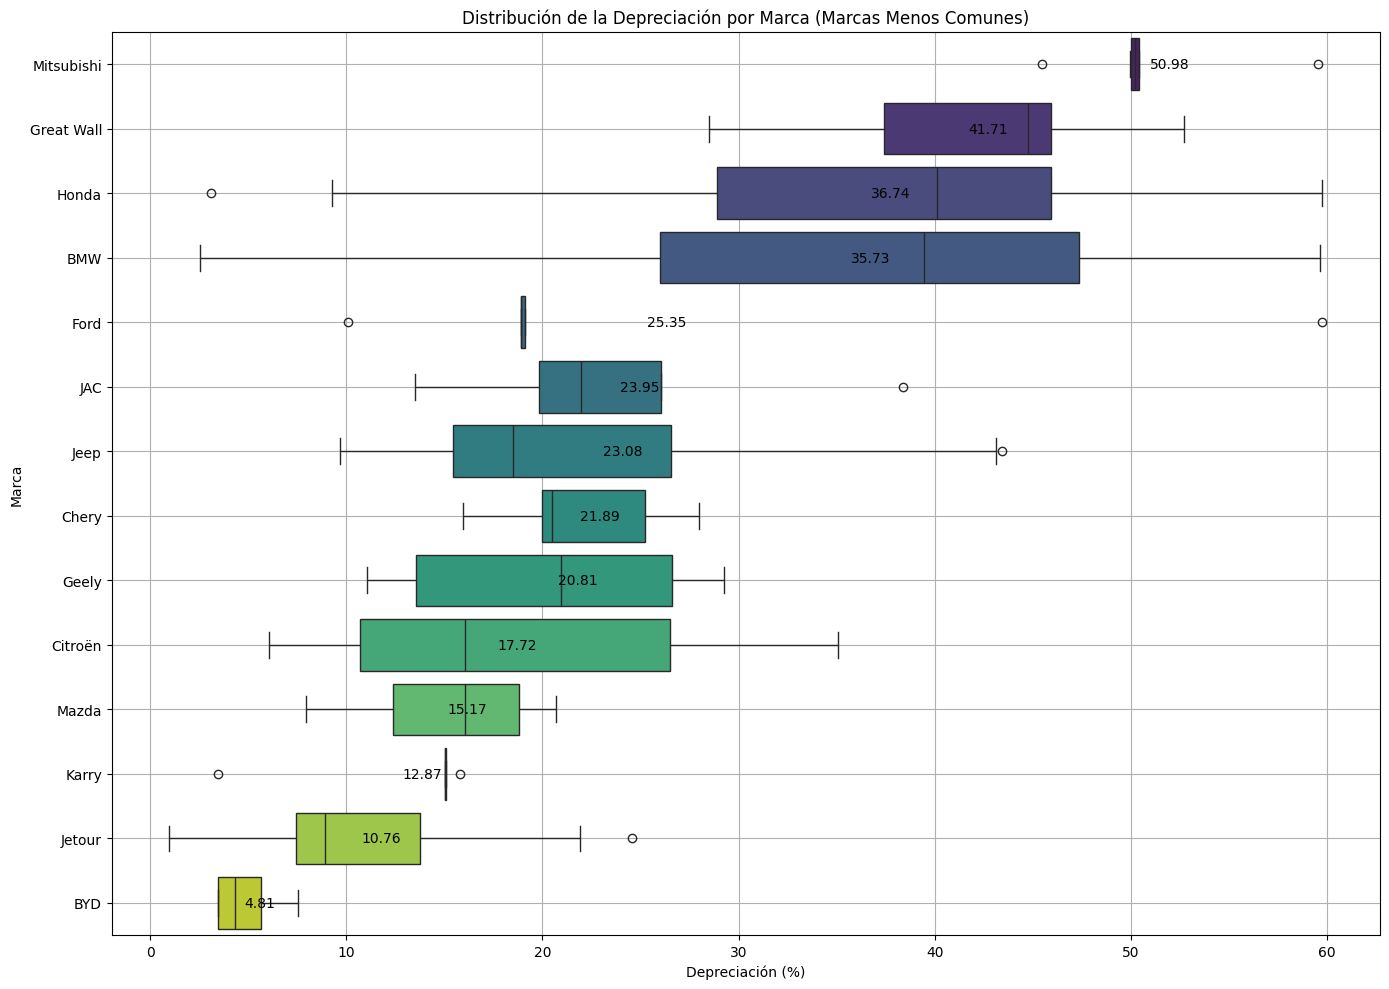

In [298]:
# Identificar las marcas menos comunes en el dataset
marca_counts = df_filtered['marca'].value_counts()
remaining_marcas = marca_counts[marca_counts <= marca_counts.mean()].index

# Filtrar el dataframe para incluir solo las marcas menos comunes
df_remaining_marcas = df_filtered[df_filtered['marca'].isin(remaining_marcas)]

# Calcular la depreciación promedio por marca para ordenar
depreciacion_promedio_remaining_marca = df_remaining_marcas.groupby('marca')['depreciacion'].mean().sort_values(ascending=False).index

# Crear un gráfico de caja y bigote para mostrar la distribución de la depreciación dentro de cada una de las marcas menos comunes, ordenadas por depreciación promedio
plt.figure(figsize=(14, 10))
sns.boxplot(x='depreciacion', y='marca', data=df_remaining_marcas, order=depreciacion_promedio_remaining_marca, palette="viridis")

# Calcular y etiquetar la media de cada marca
for i, marca in enumerate(depreciacion_promedio_remaining_marca):
    media = df_remaining_marcas[df_remaining_marcas['marca'] == marca]['depreciacion'].mean()
    plt.text(media, i, f'{media:.2f}', va='center', ha='left', color='black')

plt.title('Distribución de la Depreciación por Marca (Marcas Menos Comunes)')
plt.xlabel('Depreciación (%)')
plt.ylabel('Marca')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/2634894990.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depreciacion', y='marca', data=df_cat, order=depreciacion_promedio_cat_marca, palette="viridis")
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/2634894990.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depreciacion', y='marca', data=df_cat, order=depreciacion_promedio_cat_marca, palette="viridis")
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/2634894990.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fal

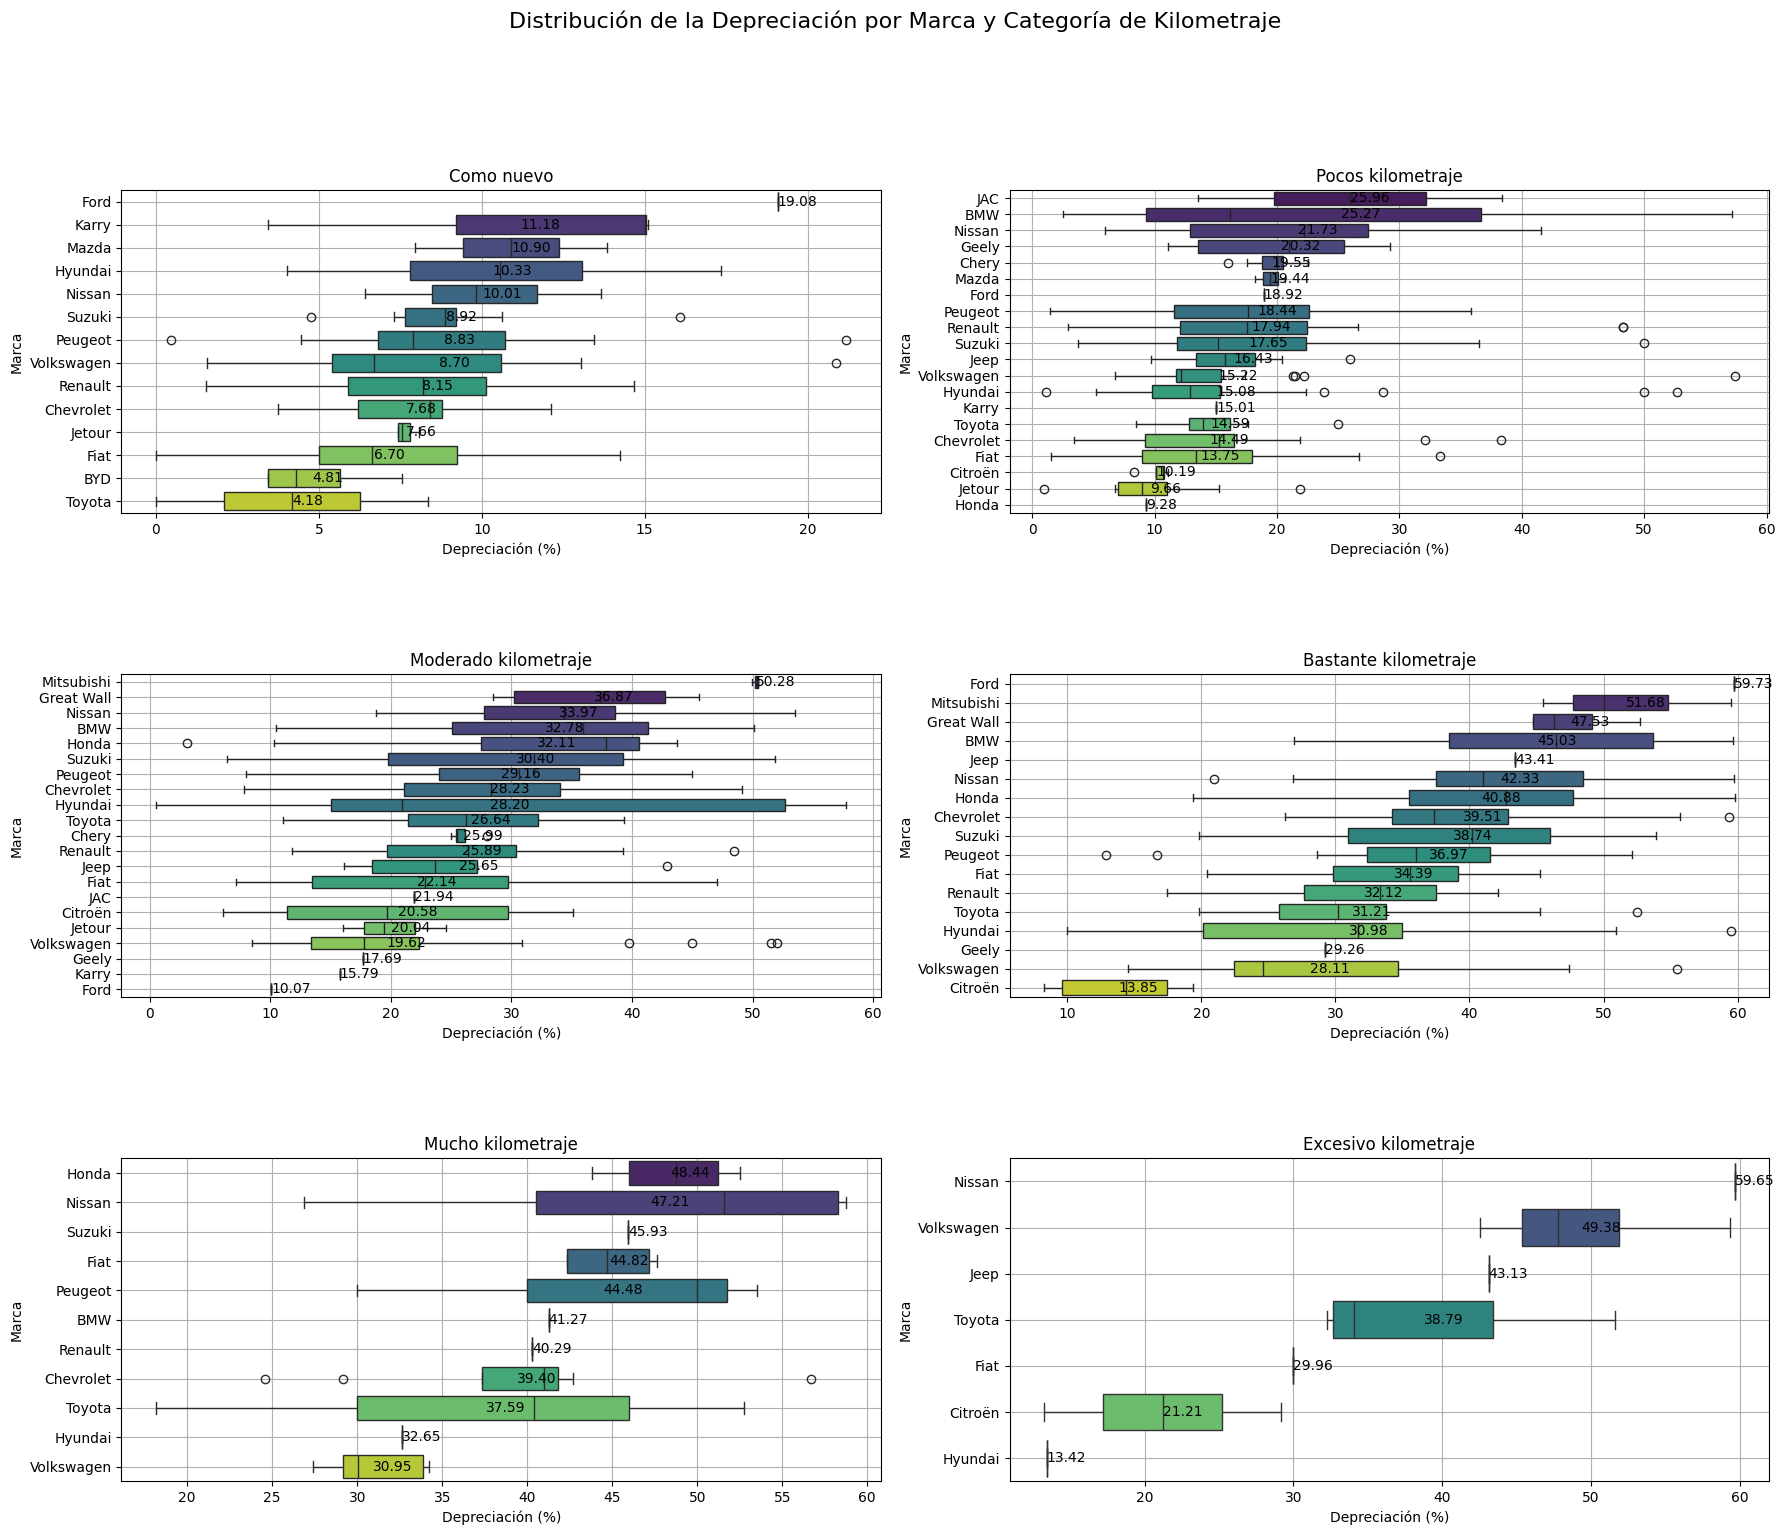

In [299]:

# Análisis de las marcas más comunes con separación por categorías de kilometraje en una misma figura
plt.figure(figsize=(18, 15))

for i, cat in enumerate(df_filtered['cat_kilometros'].cat.categories):
    # Filtrar el dataframe por la categoría de kilometraje actual
    df_cat = df_filtered[df_filtered['cat_kilometros'] == cat]
    
    # Calcular la depreciación promedio por marca dentro de esta categoría
    depreciacion_promedio_cat_marca = df_cat.groupby('marca')['depreciacion'].mean().sort_values(ascending=False).index
    
    # Crear un gráfico de caja y bigote para mostrar la distribución de la depreciación
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='depreciacion', y='marca', data=df_cat, order=depreciacion_promedio_cat_marca, palette="viridis")
    
    # Calcular y etiquetar la media de cada marca
    for j, marca in enumerate(depreciacion_promedio_cat_marca):
        media = df_cat[df_cat['marca'] == marca]['depreciacion'].mean()
        plt.text(media, j, f'{media:.2f}', va='center', ha='left', color='black')

    plt.title(f'{cat}')
    plt.xlabel('Depreciación (%)')
    plt.ylabel('Marca')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Distribución de la Depreciación por Marca y Categoría de Kilometraje', y=1.02, fontsize=16)
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/950862834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cat_kilometros'] = pd.Categorical(
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/950862834.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depreciacion', y='marca', data=df_cat_top, order=depreciacion_promedio_top_marca, palette="viridis", ax=ax)
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/950862834.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

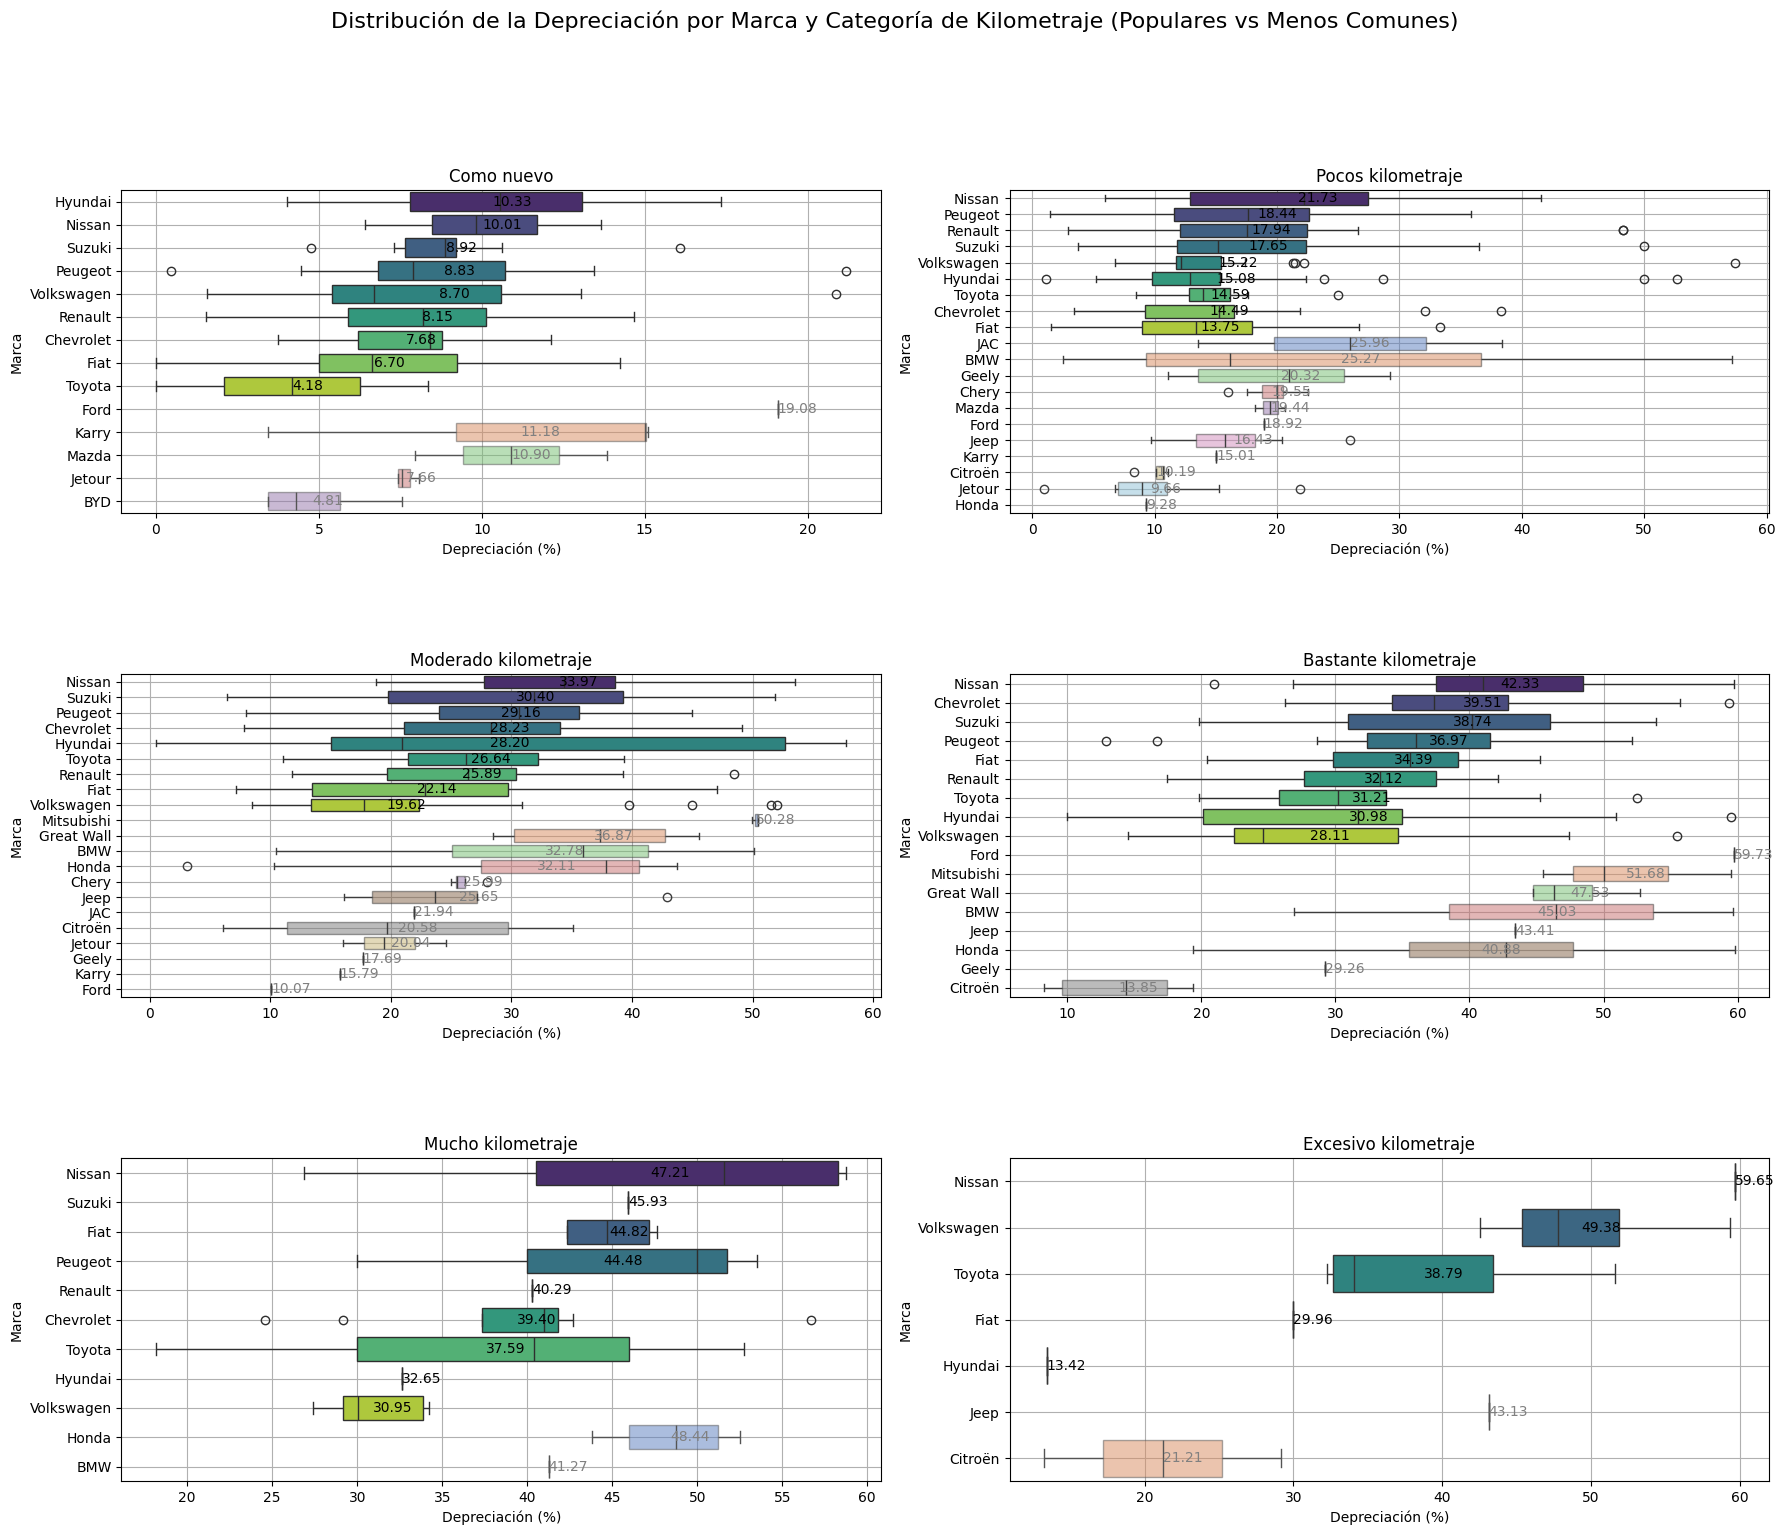

In [300]:

# Asegurar que las categorías de kilometraje están ordenadas
df_filtered['cat_kilometros'] = pd.Categorical(
    df_filtered['cat_kilometros'], 
    categories=[
        'Como nuevo', 'Pocos kilometraje', 'Moderado kilometraje', 
        'Bastante kilometraje', 'Mucho kilometraje', 'Excesivo kilometraje'
    ],
    ordered=True
)

# Separar las marcas populares y menos comunes
marca_counts = df_filtered['marca'].value_counts()
top_marcas = marca_counts[marca_counts > marca_counts.mean()].index
remaining_marcas = marca_counts[marca_counts <= marca_counts.mean()].index

df_top_marcas = df_filtered[df_filtered['marca'].isin(top_marcas)]
df_remaining_marcas = df_filtered[df_filtered['marca'].isin(remaining_marcas)]

# Visualización combinada de marcas populares y menos comunes, separadas por categorías de kilometraje
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

for i, cat in enumerate(df_filtered['cat_kilometros'].cat.categories):
    ax = axes[i // 2, i % 2]
    
    # Filtrar el dataframe por la categoría de kilometraje actual
    df_cat_top = df_top_marcas[df_top_marcas['cat_kilometros'] == cat]
    df_cat_remaining = df_remaining_marcas[df_remaining_marcas['cat_kilometros'] == cat]
    
    # Calcular la depreciación promedio por marca dentro de esta categoría
    depreciacion_promedio_top_marca = df_cat_top.groupby('marca')['depreciacion'].mean().sort_values(ascending=False).index
    depreciacion_promedio_remaining_marca = df_cat_remaining.groupby('marca')['depreciacion'].mean().sort_values(ascending=False).index
    
    # Graficar para marcas populares
    sns.boxplot(x='depreciacion', y='marca', data=df_cat_top, order=depreciacion_promedio_top_marca, palette="viridis", ax=ax)
    for j, marca in enumerate(depreciacion_promedio_top_marca):
        media = df_cat_top[df_cat_top['marca'] == marca]['depreciacion'].mean()
        ax.text(media, j, f'{media:.2f}', va='center', ha='left', color='black')
    
    # Graficar para marcas menos comunes en el mismo eje
    sns.boxplot(x='depreciacion', y='marca', data=df_cat_remaining, order=depreciacion_promedio_remaining_marca, palette="muted", ax=ax, boxprops=dict(alpha=.5))
    for j, marca in enumerate(depreciacion_promedio_remaining_marca):
        media = df_cat_remaining[df_cat_remaining['marca'] == marca]['depreciacion'].mean()
        ax.text(media, j + len(depreciacion_promedio_top_marca), f'{media:.2f}', va='center', ha='left', color='grey')

    ax.set_title(f'{cat}')
    ax.set_xlabel('Depreciación (%)')
    ax.set_ylabel('Marca')
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Distribución de la Depreciación por Marca y Categoría de Kilometraje (Populares vs Menos Comunes)', y=1.02, fontsize=16)
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()

In [301]:
# Calcular el promedio de depreciación para cada marca en todas las categorías de kilometraje
average_depreciation_by_brand = df_filtered.groupby('marca')['depreciacion'].mean().sort_values(ascending=False)

# Mostrar las marcas con mayor depreciación promedio
print(average_depreciation_by_brand)

marca
Mitsubishi    50.978475
Great Wall    41.714348
Honda         36.742775
BMW           35.729545
Nissan        33.062942
Suzuki        29.793917
Toyota        28.240535
Peugeot       27.175686
Chevrolet     25.948586
Ford          25.346716
JAC           23.953344
Renault       23.507598
Jeep          23.082291
Chery         21.888217
Volkswagen    21.441959
Hyundai       21.378850
Geely         20.806823
Fiat          20.046395
Citroën       17.720546
Mazda         15.168220
Karry         12.866789
Jetour        10.763723
BYD            4.812004
Name: depreciacion, dtype: float64


/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/695768471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cat_kilometros'] = pd.Categorical(
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/695768471.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depreciacion_promedio_completa = df_filtered_completo.groupby(['marca', 'cat_kilometros'])['depreciacion'].mean().reset_index()


cat_kilometros  Como nuevo  Pocos kilometraje  Moderado kilometraje  \
marca                                                                 
BMW                      0                  3                     7   
BYD                      6                  0                     0   
Chery                    0                  7                     4   
Chevrolet               21                 33                    49   
Citroën                  0                  4                    23   
Fiat                    12                 38                    29   
Ford                     1                  2                     1   
Geely                    0                 11                     1   
Great Wall               0                  0                     6   
Honda                    0                  1                    14   
Hyundai                 12                 32                    33   
JAC                      0                  2                     2   
Jeep  

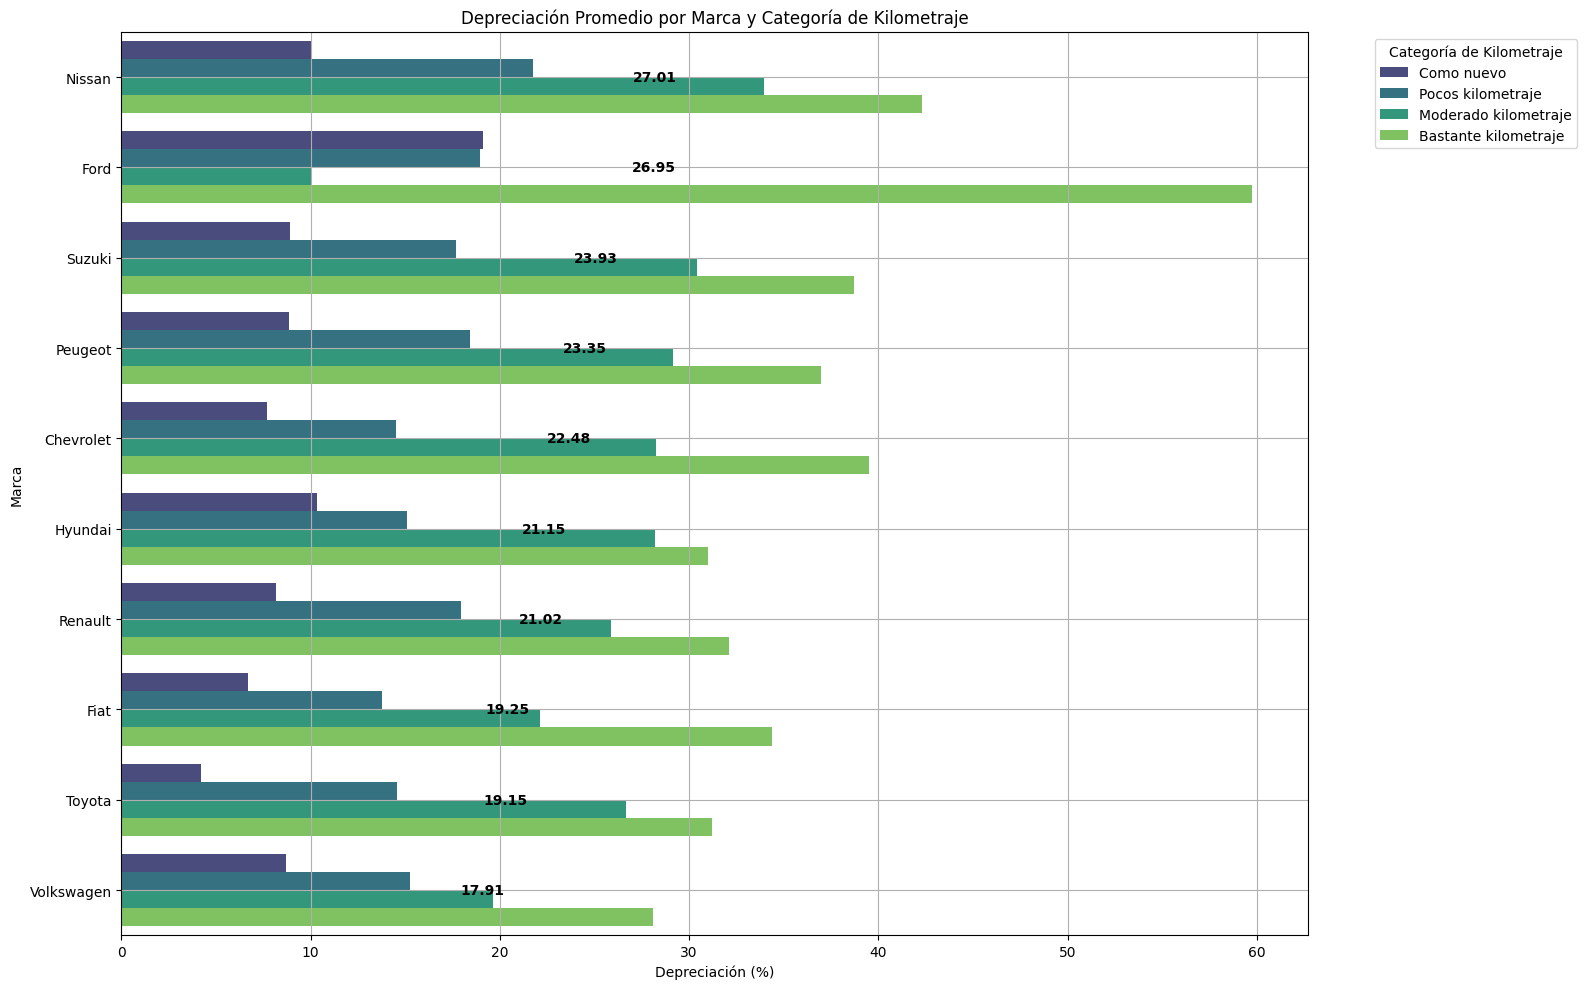

In [337]:
#Se realiza un análisis solamente con las que están presentes en las primeras cuatro categorías de kilometraje

# Asegurar que las categorías de kilometraje estén correctamente categorizadas
df_filtered['cat_kilometros'] = pd.Categorical(
    df_filtered['cat_kilometros'], 
    categories=['Como nuevo', 'Pocos kilometraje', 'Moderado kilometraje', 'Bastante kilometraje'],
    ordered=True
)

# Crear una tabla de contingencia para verificar la presencia de marcas en todas las categorías
crosstab = pd.crosstab(df_filtered['marca'], df_filtered['cat_kilometros'])
print(crosstab)

# Filtrar marcas que tienen registros en todas las categorías de kilometraje
marcas_completas = crosstab[(crosstab > 0).all(axis=1)].index

# Filtrar el DataFrame para incluir solo esas marcas
df_filtered_completo = df_filtered[df_filtered['marca'].isin(marcas_completas)]

# Calcular el promedio de depreciación por marca para cada segmento de kilometraje
depreciacion_promedio_completa = df_filtered_completo.groupby(['marca', 'cat_kilometros'])['depreciacion'].mean().reset_index()

# Calcular el promedio general de depreciación para ordenar las marcas
promedio_global = depreciacion_promedio_completa.groupby('marca')['depreciacion'].mean().sort_values(ascending=False)
depreciacion_promedio_completa['marca'] = pd.Categorical(depreciacion_promedio_completa['marca'], categories=promedio_global.index, ordered=True)

# Crear un gráfico de barras agrupadas para las marcas presentes en todos los segmentos seleccionados
plt.figure(figsize=(16, 10))
sns.barplot(x='depreciacion', y='marca', hue='cat_kilometros', data=depreciacion_promedio_completa, palette="viridis", dodge=True)

# Etiquetas de promedio general para cada marca
for i, marca in enumerate(promedio_global.index):
    media = promedio_global[marca]
    plt.text(media, i, f'{media:.2f}', va='center', ha='left', color='black', fontweight='bold')

plt.title('Depreciación Promedio por Marca y Categoría de Kilometraje')
plt.xlabel('Depreciación (%)')
plt.ylabel('Marca')
plt.legend(title='Categoría de Kilometraje', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## ¿Es más costoso comprar un vehículo de alta gama en términos de depreciación? ¿Qué segmento económico ofrece el mejor valor a largo plazo?

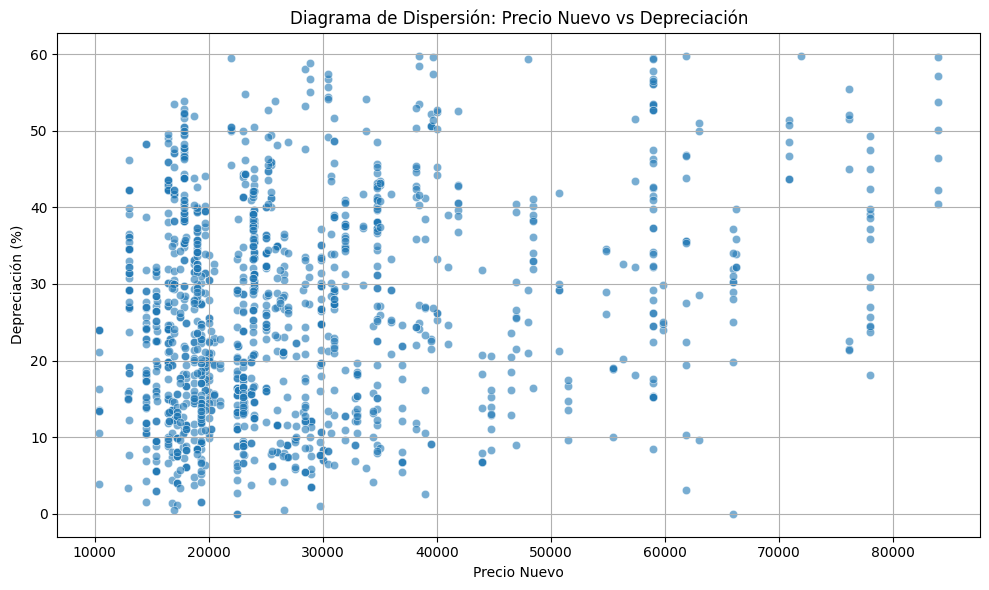

p-value: 2.0620077583049222e-21, R-squared: 0.05896737433918408


In [340]:
# Crear un diagrama de dispersión entre precio_nuevo y depreciación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precio_nuevo', y='depreciacion', data=df_filtered, alpha=0.6)
plt.title('Diagrama de Dispersión: Precio Nuevo vs Depreciación')
plt.xlabel('Precio Nuevo')
plt.ylabel('Depreciación (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Análisis estadístico: cálculo del p-valor para la relación entre precio_nuevo y depreciación
slope, intercept, r_value, p_value, std_err = stats.linregress(df_filtered['precio_nuevo'], df_filtered['depreciacion'])

# Mostrar los resultados del análisis
print(f"p-value: {p_value}, R-squared: {r_value ** 2}")

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/3431013517.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='depreciacion', y='segmento_economico', data=depreciacion_por_segmento, palette="viridis", ax=axes[0])
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/3431013517.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='depreciacion', y='segmento_economico', data=df_filtered, order=depreciacion_por_segmento['segmento_economico'], palette="viridis", ax=axes[1])


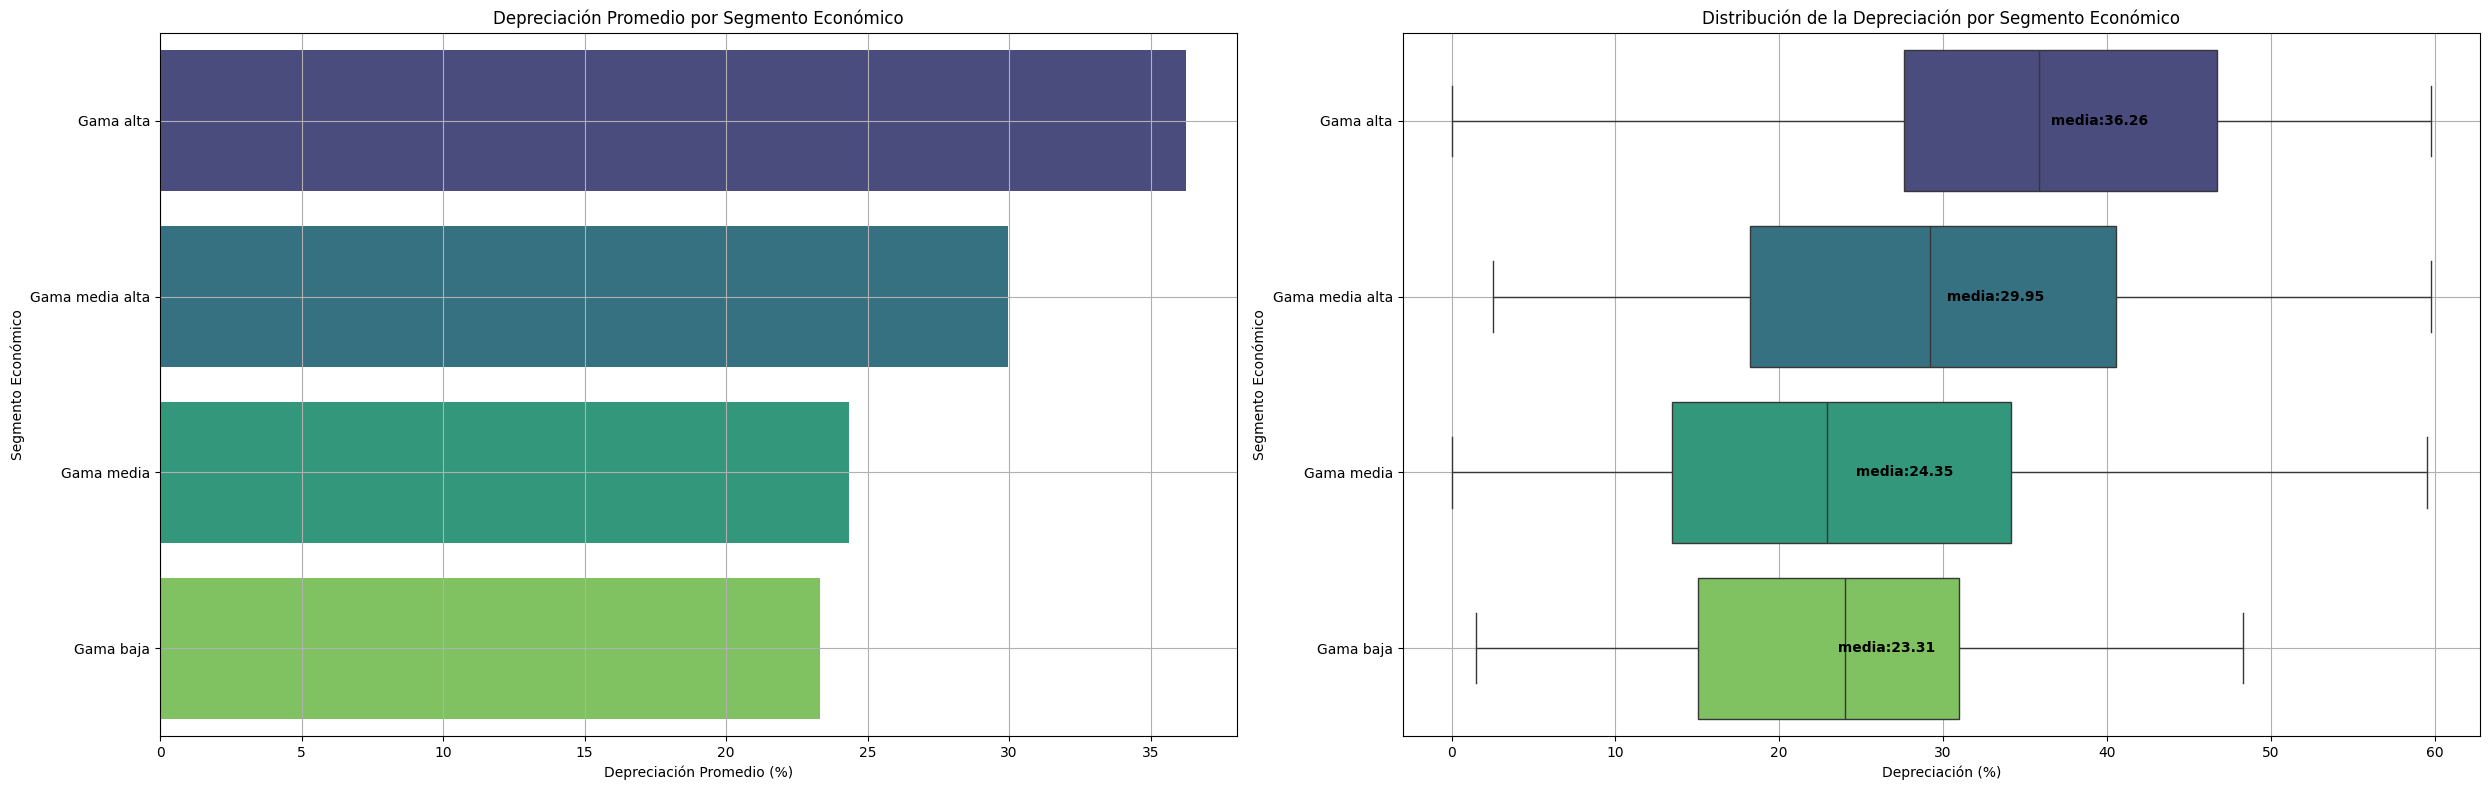

In [338]:
# Calcular la depreciación promedio por segmento económico
depreciacion_por_segmento = df_filtered.groupby('segmento_economico')['depreciacion'].mean().reset_index()
depreciacion_por_segmento = depreciacion_por_segmento.sort_values(by='depreciacion', ascending=False)

# Crear la figura con dos columnas y una fila
fig, axes = plt.subplots(1, 2, figsize=(25, 8))

# Gráfico de barras
sns.barplot(x='depreciacion', y='segmento_economico', data=depreciacion_por_segmento, palette="viridis", ax=axes[0])
axes[0].set_title('Depreciación Promedio por Segmento Económico')
axes[0].set_xlabel('Depreciación Promedio (%)')
axes[0].set_ylabel('Segmento Económico')
axes[0].grid(True)

# Gráfico de caja y bigote
sns.boxplot(x='depreciacion', y='segmento_economico', data=df_filtered, order=depreciacion_por_segmento['segmento_economico'], palette="viridis", ax=axes[1])
axes[1].set_title('Distribución de la Depreciación por Segmento Económico')
axes[1].set_xlabel('Depreciación (%)')
axes[1].set_ylabel('Segmento Económico')
axes[1].grid(True)

for i, segmento in enumerate(depreciacion_por_segmento['segmento_economico']):
    media = depreciacion_por_segmento[depreciacion_por_segmento['segmento_economico'] == segmento]['depreciacion'].values[0]
    axes[1].text(media, i, f' media:{media:.2f}', va='center', ha='left', color='black', fontweight='bold')


# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/2874752336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelos_populares['cat_kilometros'] = pd.Categorical(
/var/folders/bb/gj2sfjbd5kz8g_zkvm58s_hm0000gn/T/ipykernel_66643/2874752336.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  depreciacion_promedio_modelo = df_modelos_populares.groupby(['modelo', 'cat_kilometros'])['depreciacion'].mean().reset_index()


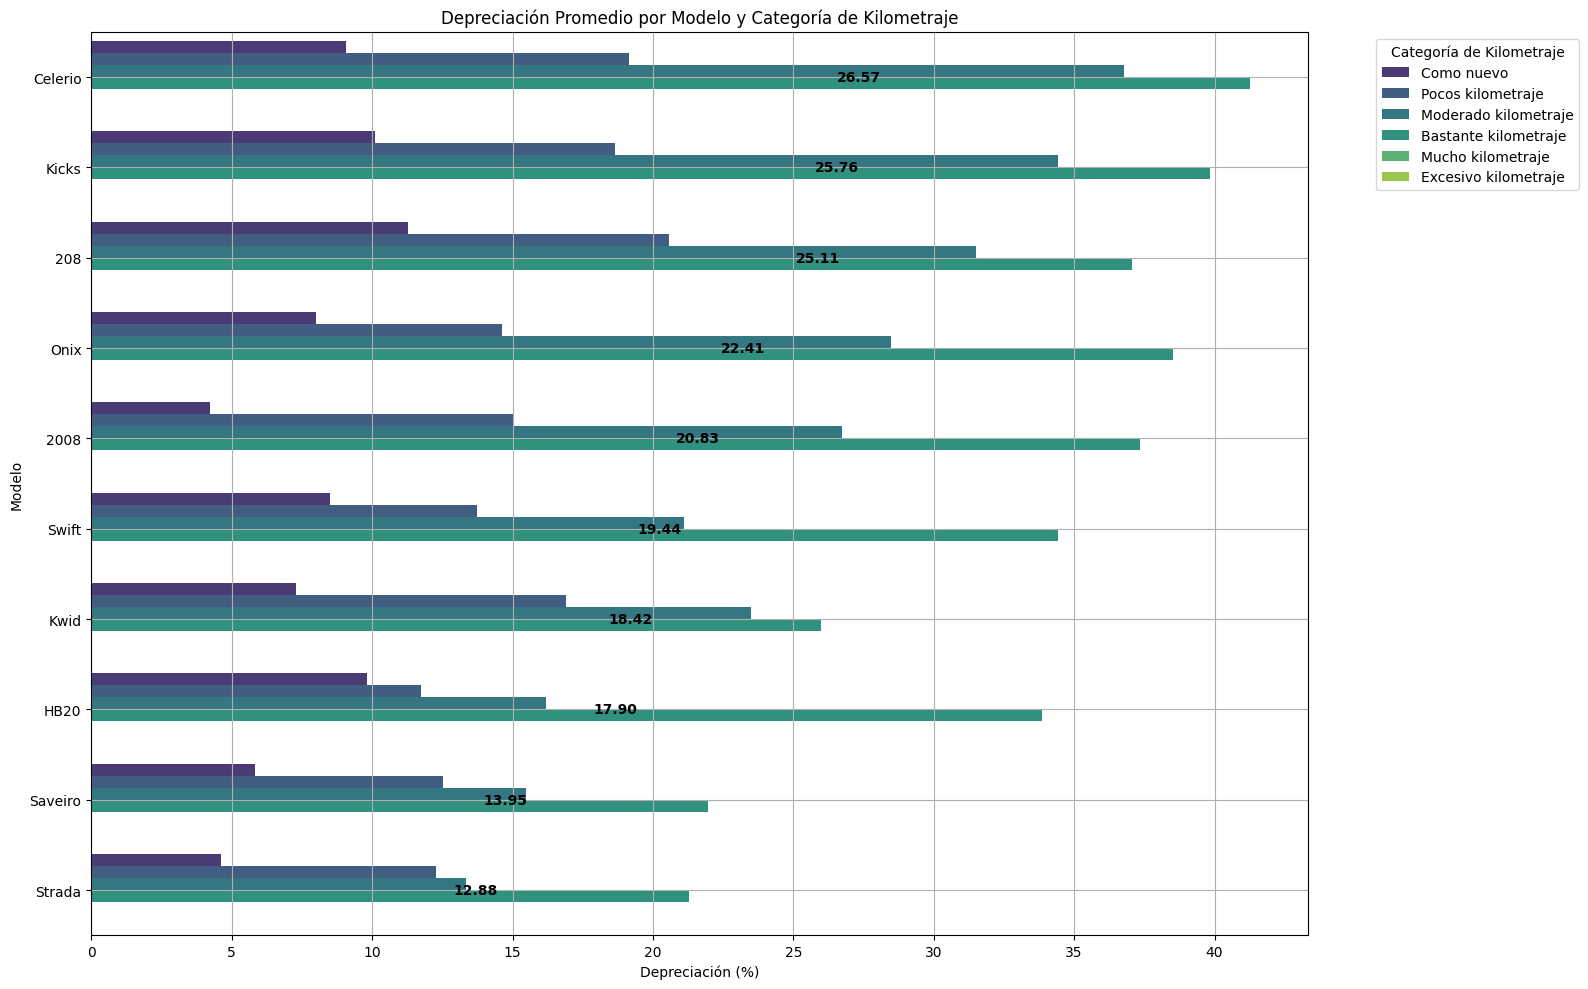

In [341]:
# Análisis para los modelos más populares

# Seleccionar los modelos más populares
modelos_populares = df_filtered['modelo'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo estos modelos
df_modelos_populares = df_filtered[df_filtered['modelo'].isin(modelos_populares)]

# Asegurar que las categorías de kilometraje están ordenadas
df_modelos_populares['cat_kilometros'] = pd.Categorical(
    df_modelos_populares['cat_kilometros'], 
    categories=[
        'Como nuevo', 'Pocos kilometraje', 'Moderado kilometraje', 
        'Bastante kilometraje', 'Mucho kilometraje', 'Excesivo kilometraje'
    ],
    ordered=True
)

# Calcular la depreciación promedio por modelo y categoría de kilometraje
depreciacion_promedio_modelo = df_modelos_populares.groupby(['modelo', 'cat_kilometros'])['depreciacion'].mean().reset_index()

# Calcular el promedio general de depreciación para ordenar los modelos
promedio_global_modelo = depreciacion_promedio_modelo.groupby('modelo')['depreciacion'].mean().sort_values(ascending=False)
depreciacion_promedio_modelo['modelo'] = pd.Categorical(depreciacion_promedio_modelo['modelo'], categories=promedio_global_modelo.index, ordered=True)

# Crear un gráfico de barras agrupadas para los modelos más populares por categoría de kilometraje
plt.figure(figsize=(16, 10))
sns.barplot(x='depreciacion', y='modelo', hue='cat_kilometros', data=depreciacion_promedio_modelo, palette="viridis", dodge=True)

# Etiquetas de promedio general para cada modelo
for i, modelo in enumerate(promedio_global_modelo.index):
    media = promedio_global_modelo[modelo]
    plt.text(media, i, f'{media:.2f}', va='center', ha='left', color='black', fontweight='bold')

plt.title('Depreciación Promedio por Modelo y Categoría de Kilometraje')
plt.xlabel('Depreciación (%)')
plt.ylabel('Modelo')
plt.legend(title='Categoría de Kilometraje', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()